# Predictive Modeling for Insurance Claim Probability

### Bharath Reddy Bollu
#### bollubharathreddy2@gmail.com

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
from scipy.stats import pearsonr
from scipy.stats import f_oneway,chi2_contingency
from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score, StratifiedKFold,cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score,classification_report,roc_curve, auc,precision_recall_curve,average_precision_score



from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/Assignment Datasets/Data.csv")
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} features")
data.head(3)

The dataset has 58592 rows and 44 features


policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   

   population_density  make segment model fuel_type  ... is_brake_assist  \
0                4990     1       A    M1       CNG  ...              No   
1               27003     1       A    M1       CNG  ...              No   
2                4076     1       A    M1       CNG  ...              No   

  is_power_door_locks is_central_locking  is_power_steering  \
0                  No                 No                Yes   
1                  No                 No                Yes   
2                  No                 No                Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   
2                               No                            No     No   

  is_speed_alert ncap_rating is_claim  
0            Yes           0        0  
1            Yes           0        0  
2            Yes           0        0  

[3 rows x 44 columns]

In [4]:
data.describe().T

count          mean           std          min  \
policy_tenure        58592.0      0.611246      0.414156     0.002735   
age_of_car           58592.0      0.069424      0.056721     0.000000   
age_of_policyholder  58592.0      0.469420      0.122886     0.288462   
population_density   58592.0  18826.858667  17660.174792   290.000000   
make                 58592.0      1.763722      1.136988     1.000000   
airbags              58592.0      3.137066      1.832641     1.000000   
displacement         58592.0   1162.355851    266.304786   796.000000   
cylinder             58592.0      3.626963      0.483616     3.000000   
gear_box             58592.0      5.245443      0.430353     5.000000   
turning_radius       58592.0      4.852893      0.228061     4.500000   
length               58592.0   3850.476891    311.457119  3445.000000   
width                58592.0   1672.233667    112.089135  1475.000000   
height               58592.0   1553.335370     79.622270  1475.000000   
gross_weight         58592.0   1385.276813    212.423085  1051.000000   
ncap_rating          58592.0      1.759950      1.389576     0.000000   
is_claim             58592.0      0.063968      0.244698     0.000000   

                             25%          50%           75%           max  
policy_tenure           0.210250     0.573792      1.039104      1.396641  
age_of_car              0.020000     0.060000      0.110000      1.000000  
age_of_policyholder     0.365385     0.451923      0.548077      1.000000  
population_density   6112.000000  8794.000000  27003.000000  73430.000000  
make                    1.000000     1.000000      3.000000      5.000000  
airbags                 2.000000     2.000000      6.000000      6.000000  
displacement          796.000000  1197.000000   1493.000000   1498.000000  
cylinder                3.000000     4.000000      4.000000      4.000000  
gear_box                5.000000     5.000000      5.000000      6.000000  
turning_radius          4.600000     4.800000      5.000000      5.200000  
length               3445.000000  3845.000000   3995.000000   4300.000000  
width                1515.000000  1735.000000   1755.000000   1811.000000  
height               1475.000000  1530.000000   1635.000000   1825.000000  
gross_weight         1185.000000  1335.000000   1510.000000   1720.000000  
ncap_rating             0.000000     2.000000      3.000000      5.000000  
is_claim                0.000000     0.000000      0.000000      1.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [6]:
def duplicates(data):

  if data.duplicated().sum() >0:
    print(f"The dataset has {data.duplicated().sum()} duplicate records")
  else:
    print("The dataset has no duplicate records")

duplicates(data)



The dataset has no duplicate records


In [7]:
def missing_values(data):

  for col in data.columns:
    if data[col].isna().sum() >0:
      print(f"The {col} has {data[col].isna().sum()} missing records")
    else:
      print(f"The {col} has no missing records")

missing_values(data)

The policy_id has no missing records
The policy_tenure has no missing records
The age_of_car has no missing records
The age_of_policyholder has no missing records
The area_cluster has no missing records
The population_density has no missing records
The make has no missing records
The segment has no missing records
The model has no missing records
The fuel_type has no missing records
The max_torque has no missing records
The max_power has no missing records
The engine_type has no missing records
The airbags has no missing records
The is_esc has no missing records
The is_adjustable_steering has no missing records
The is_tpms has no missing records
The is_parking_sensors has no missing records
The is_parking_camera has no missing records
The rear_brakes_type has no missing records
The displacement has no missing records
The cylinder has no missing records
The transmission_type has no missing records
The gear_box has no missing records
The steering_type has no missing records
The turning_r

In [8]:
for col in data.columns:
    print(f"{col} ------> {data[col].nunique()}","-------->",data[col].dtype)

policy_id ------> 58592 --------> object
policy_tenure ------> 58592 --------> float64
age_of_car ------> 49 --------> float64
age_of_policyholder ------> 75 --------> float64
area_cluster ------> 22 --------> object
population_density ------> 22 --------> int64
make ------> 5 --------> int64
segment ------> 6 --------> object
model ------> 11 --------> object
fuel_type ------> 3 --------> object
max_torque ------> 9 --------> object
max_power ------> 9 --------> object
engine_type ------> 11 --------> object
airbags ------> 3 --------> int64
is_esc ------> 2 --------> object
is_adjustable_steering ------> 2 --------> object
is_tpms ------> 2 --------> object
is_parking_sensors ------> 2 --------> object
is_parking_camera ------> 2 --------> object
rear_brakes_type ------> 2 --------> object
displacement ------> 9 --------> int64
cylinder ------> 2 --------> int64
transmission_type ------> 2 --------> object
gear_box ------> 2 --------> int64
steering_type ------> 3 --------> object
tu

In [9]:
data["is_claim"].value_counts()

is_claim
0    54844
1     3748
Name: count, dtype: int64

 Heuristic: If a feature has fewer than or equal to a certain threshold of unique values (e.g., 10-20), it can often be considered categorical.

In [10]:
threshould = 11

categorical_features = [ col for col in data.columns if data[col].nunique()<=threshould ]
numerical_features = [col for col in data.columns if data[col].nunique() > threshould]

print(categorical_features)
print("The Number of categorical features are ",len(categorical_features))
print()
print(numerical_features)
print("The Number of numerical features are ",len(numerical_features))
# Removing 'policy_id', field from numerical_features
numerical_features.remove('policy_id')

print()
print(numerical_features)
print("The Number of numerical features are ",len(numerical_features))

['make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim']
The Number of categorical features are  38

['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density']
The Number of numerical features are  6

['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density']
The Number of numerical features are  5


### Univariate Analysis

#### Categorical features

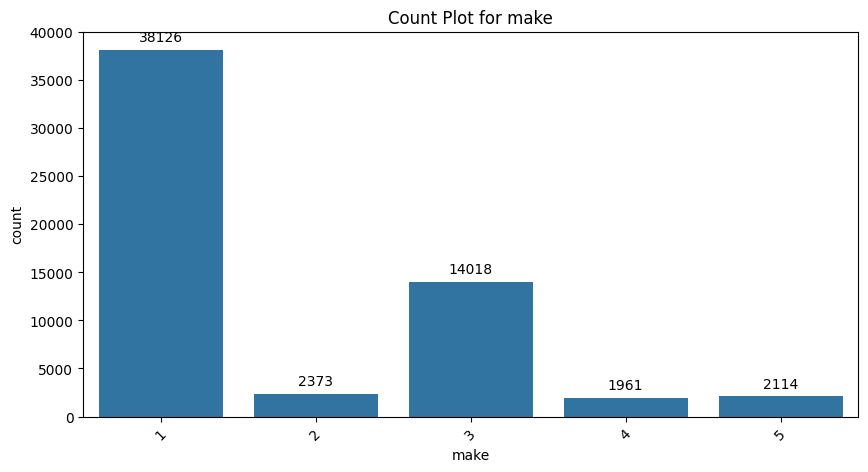

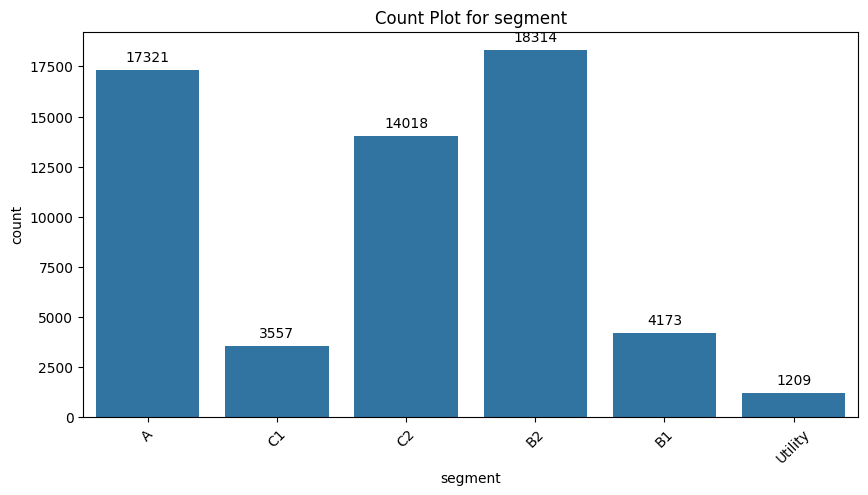

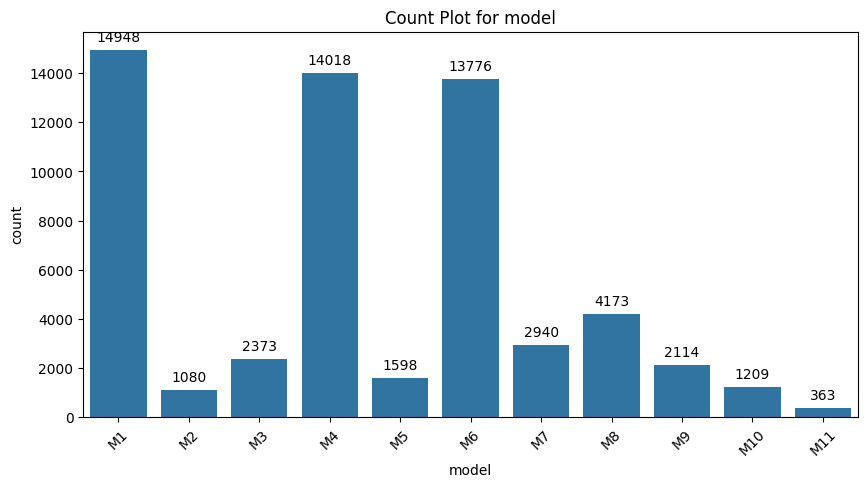

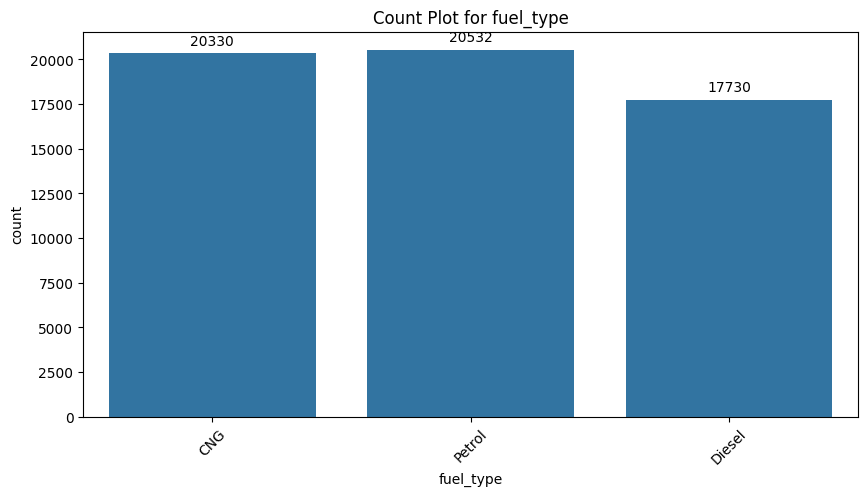

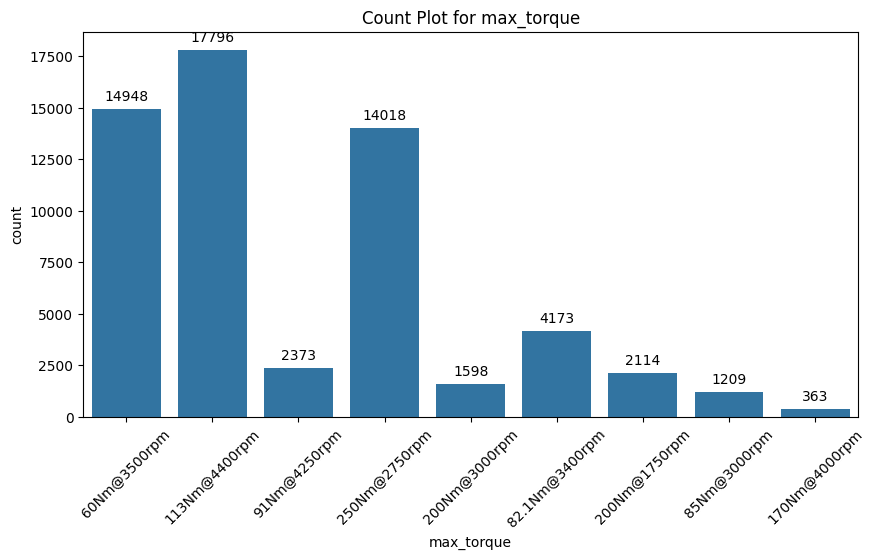

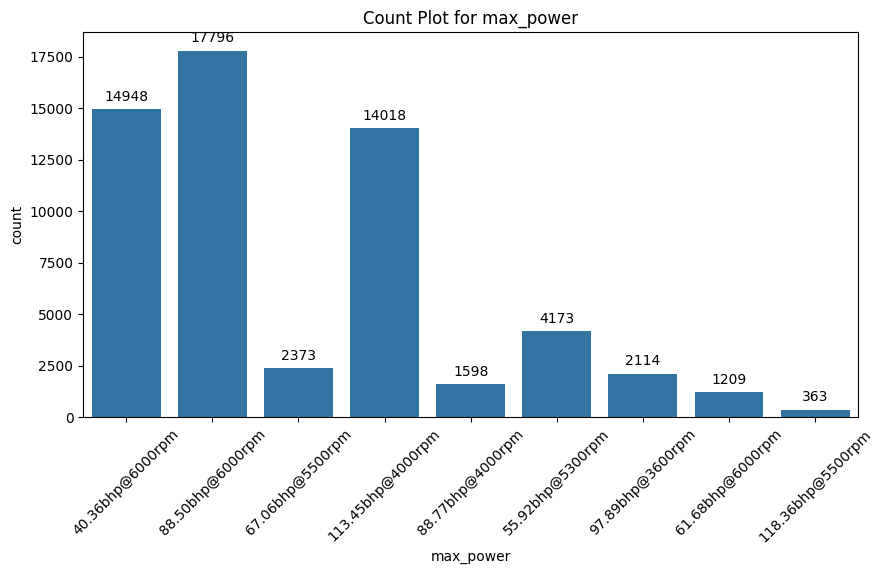

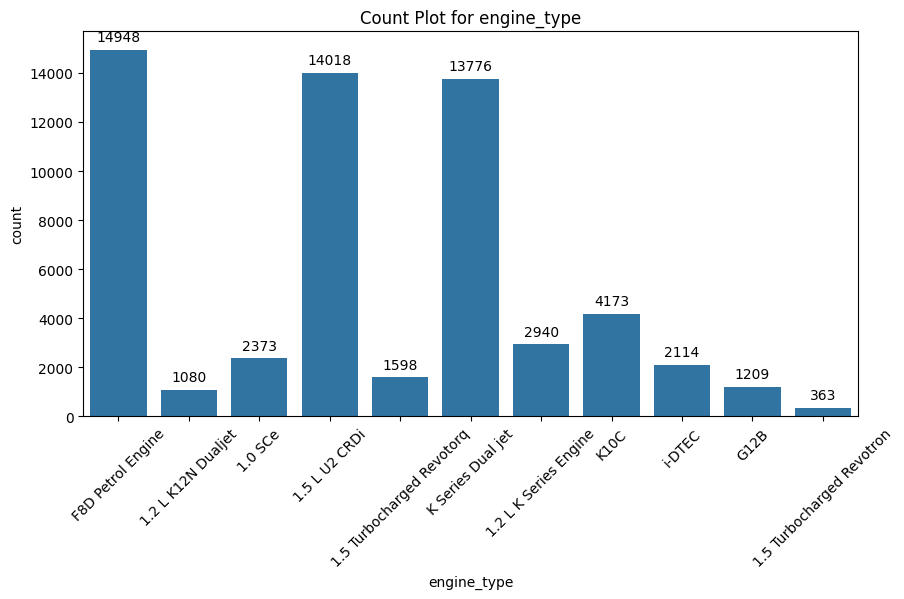

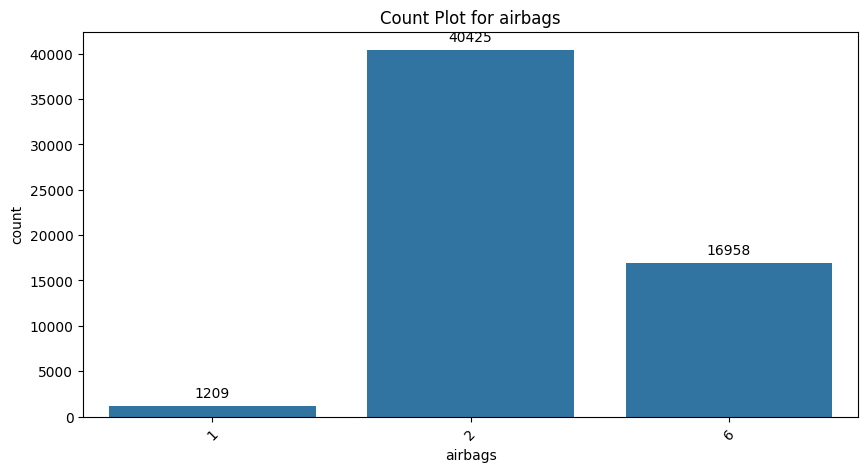

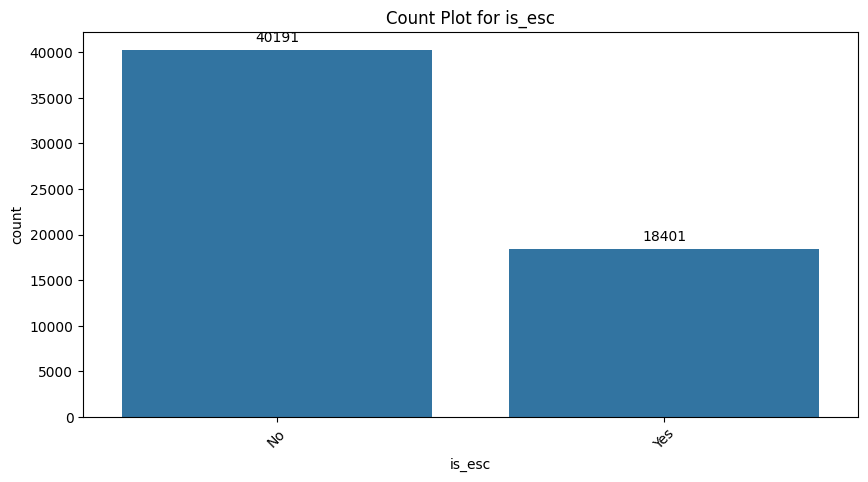

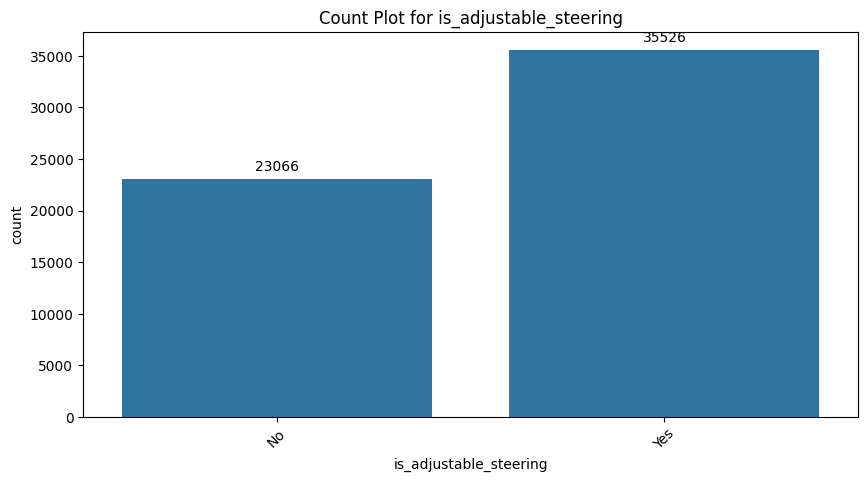

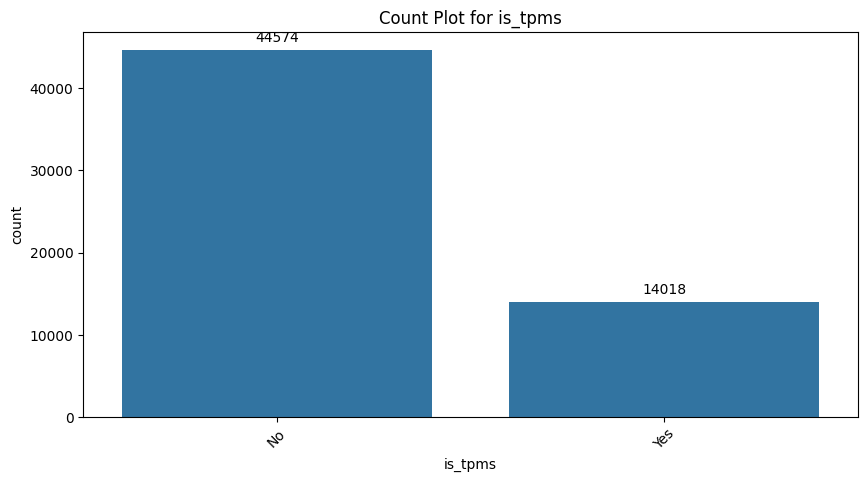

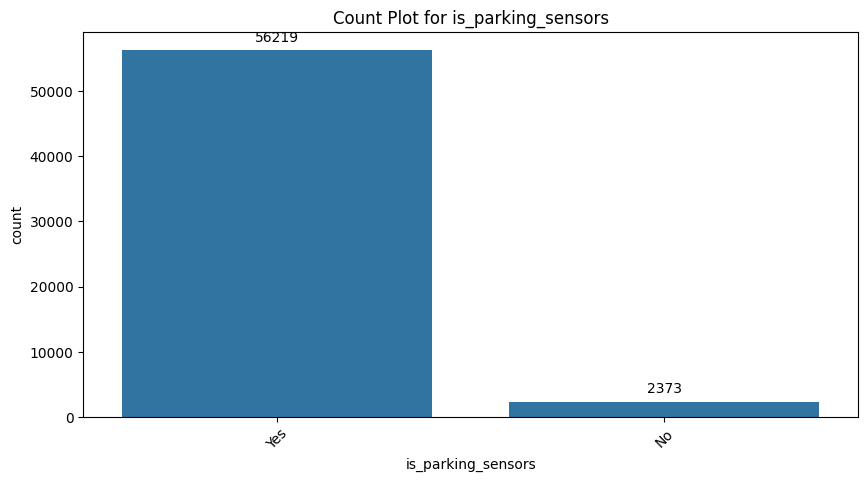

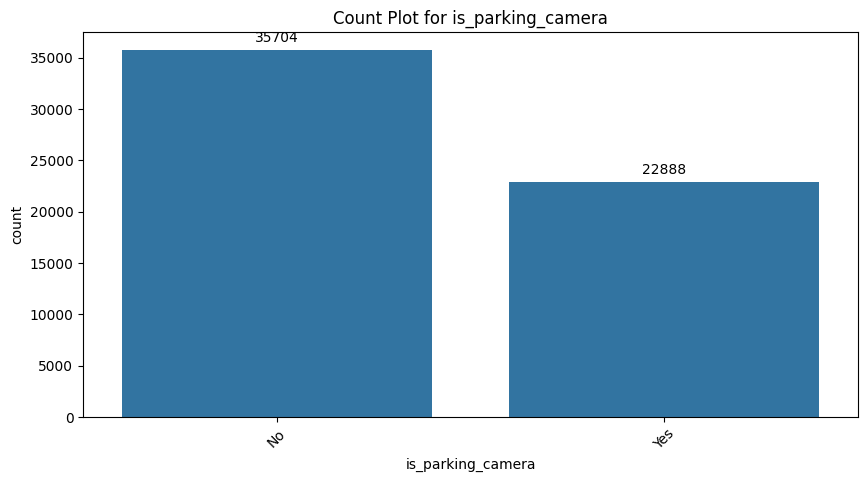

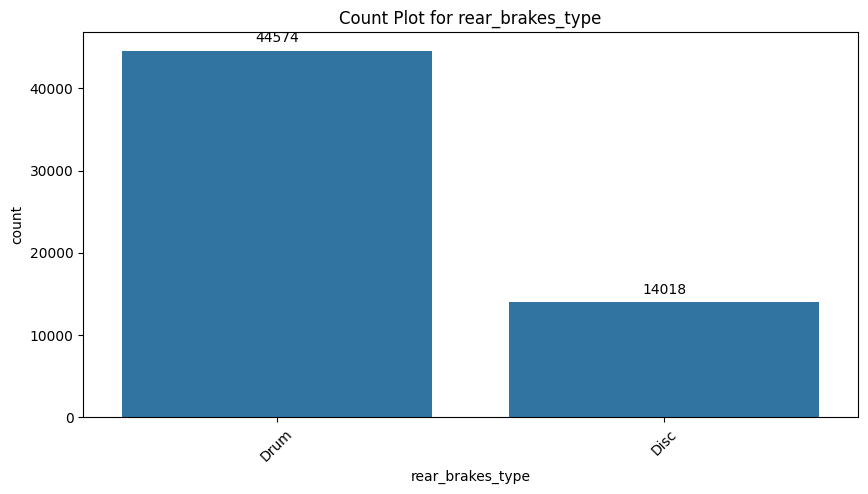

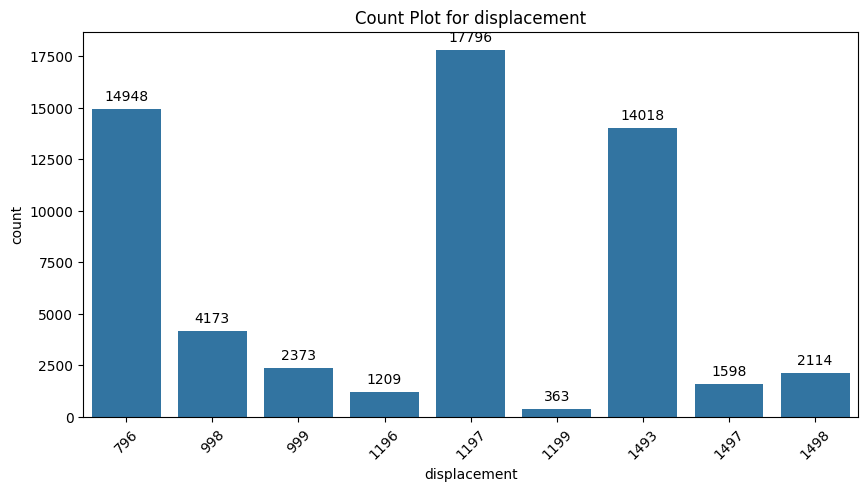

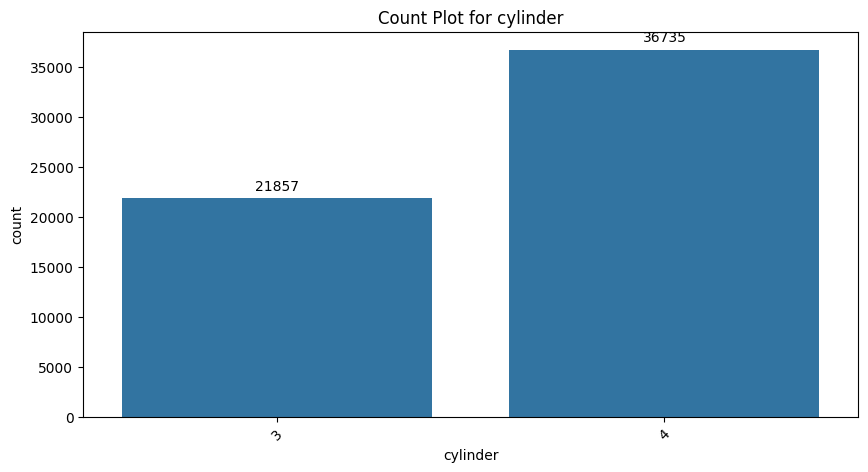

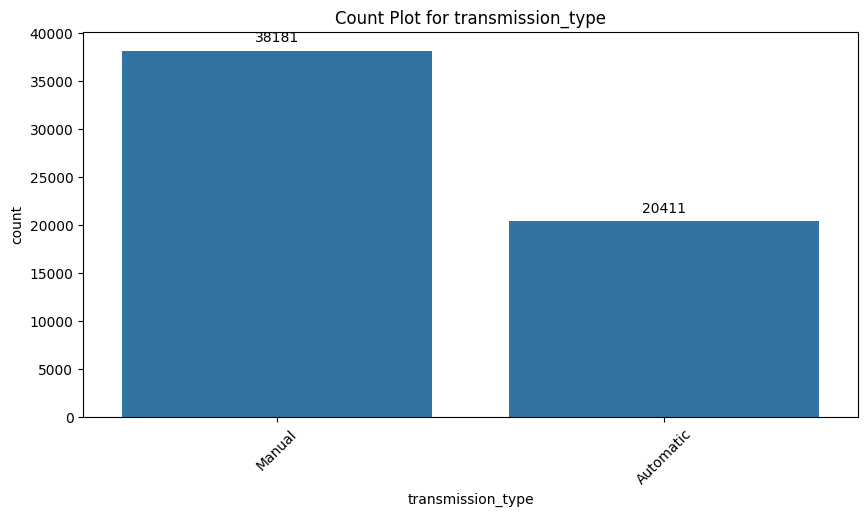

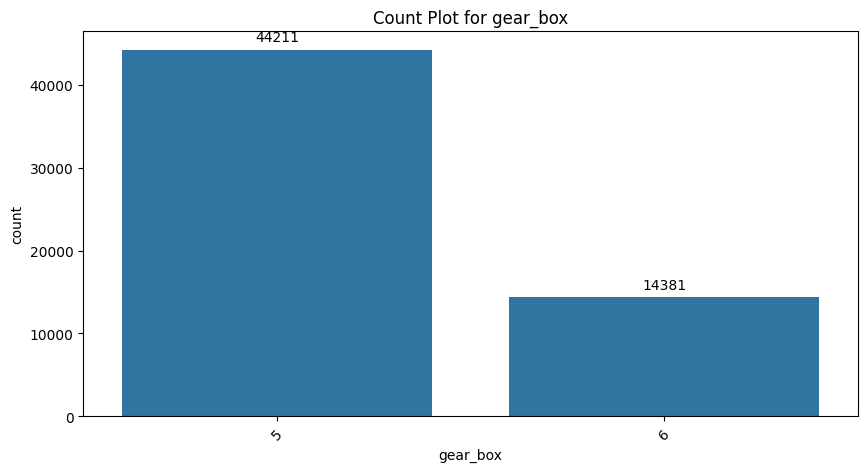

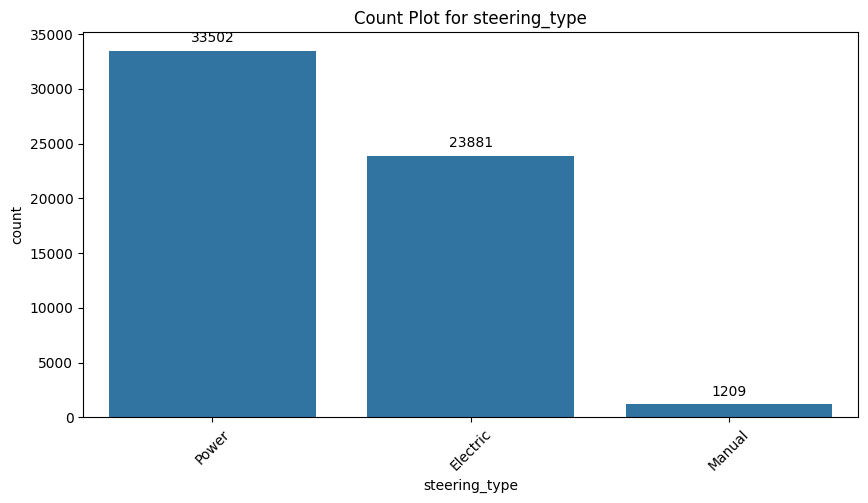

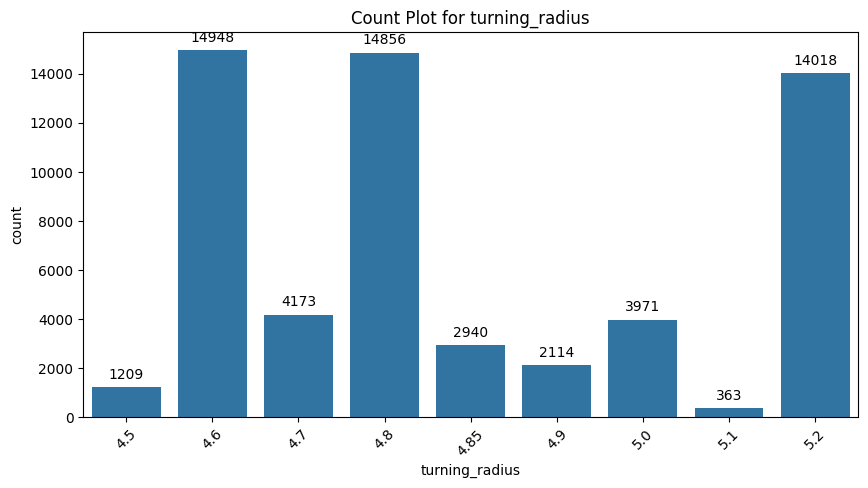

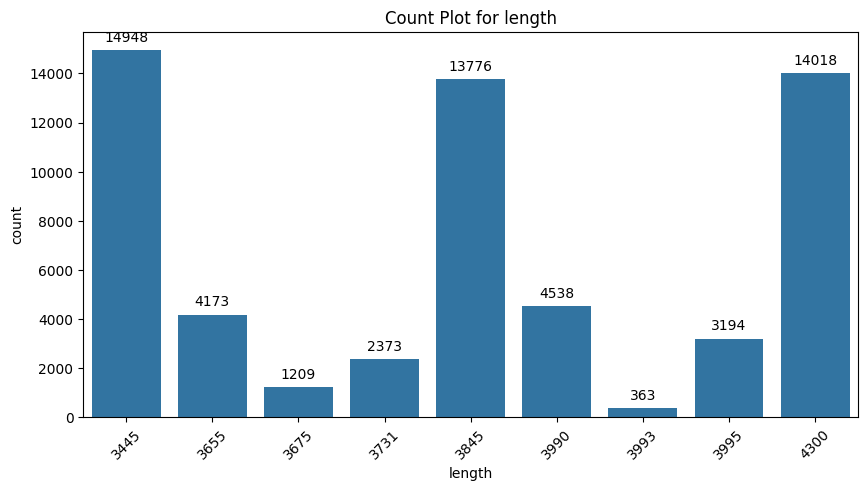

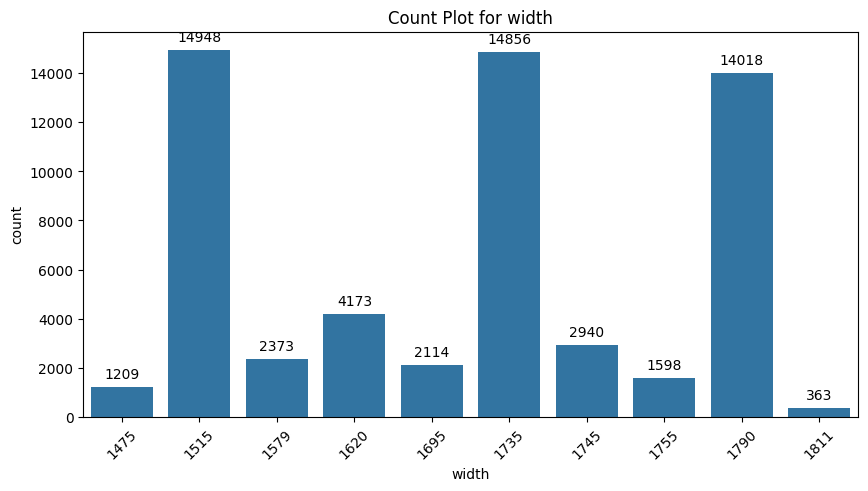

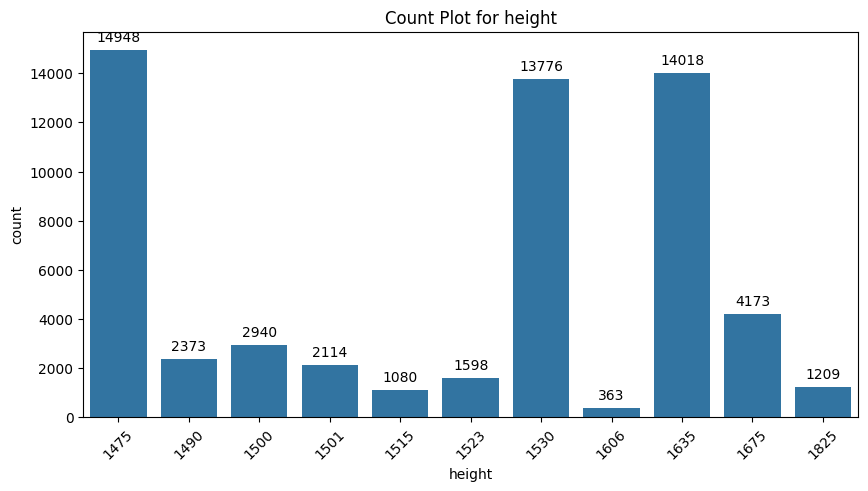

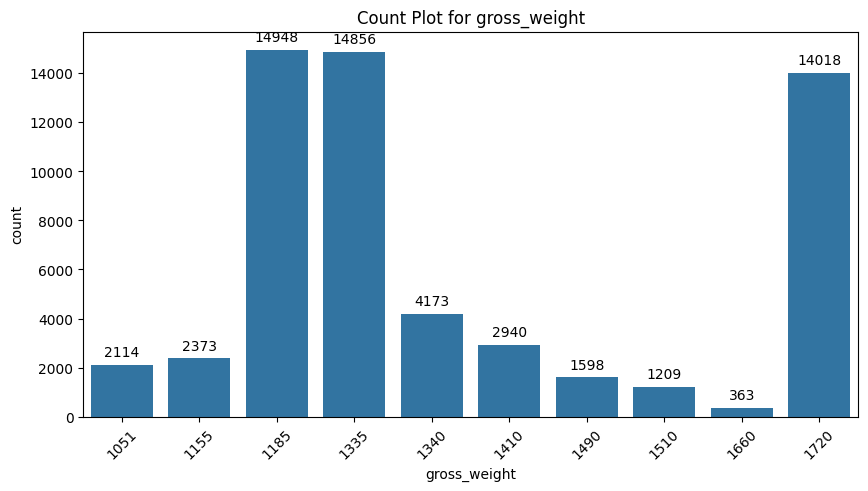

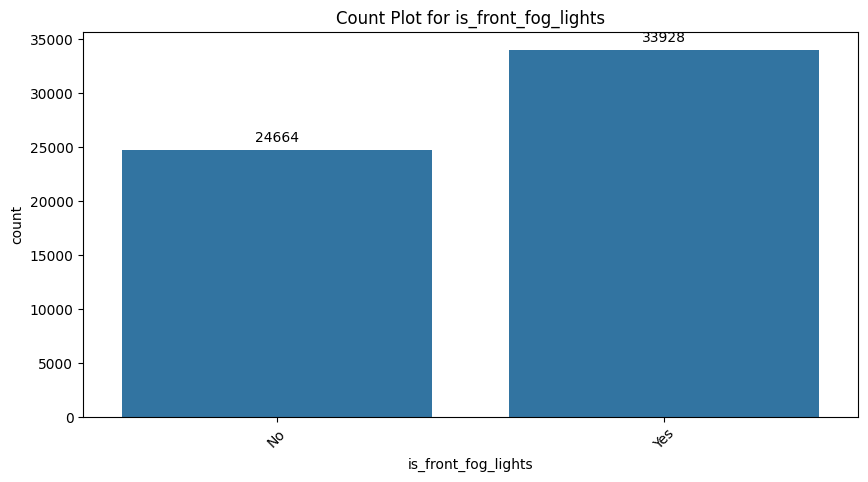

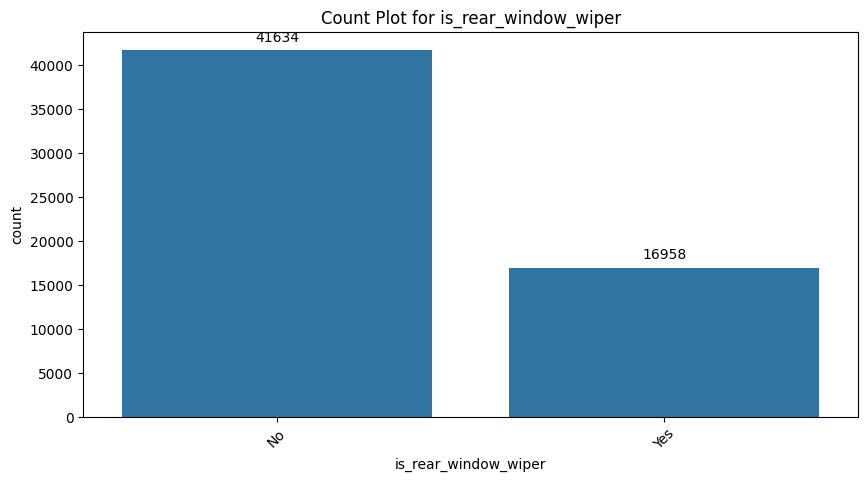

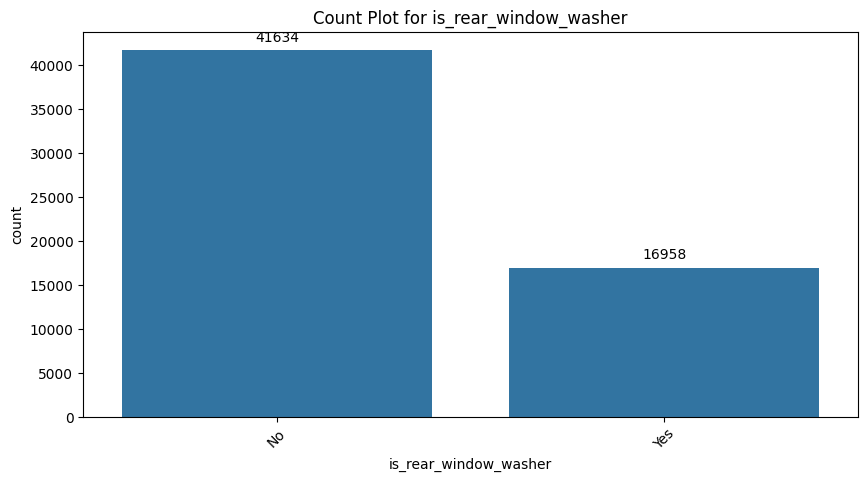

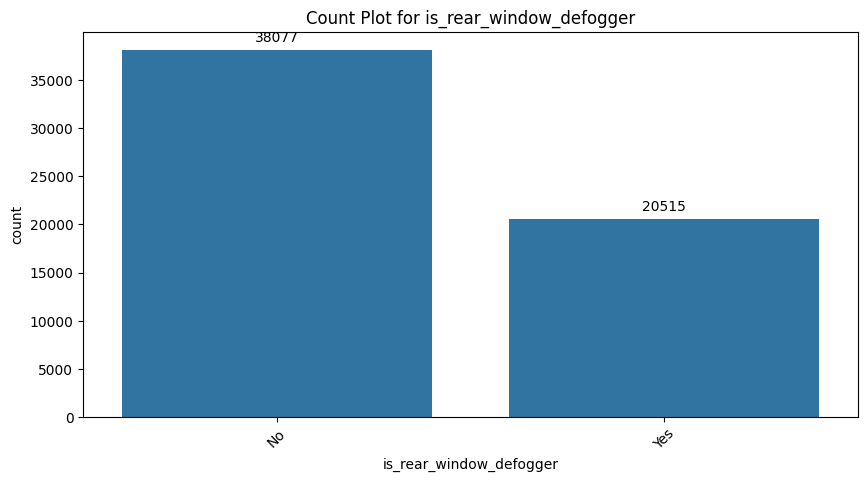

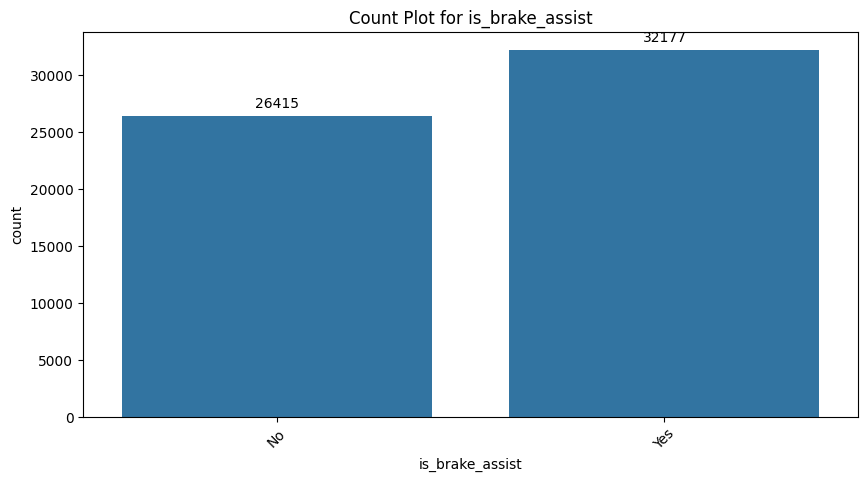

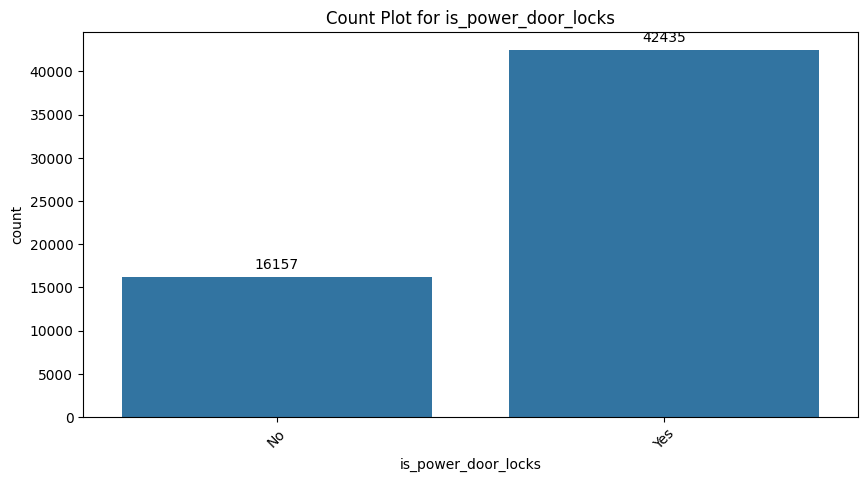

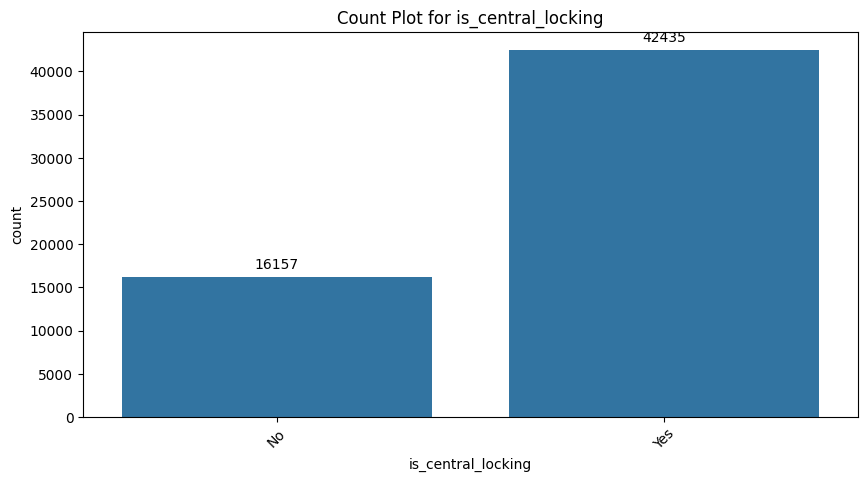

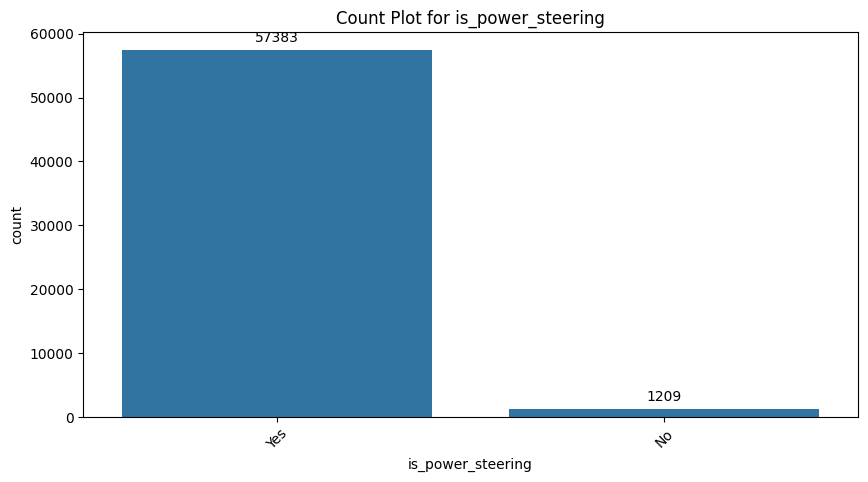

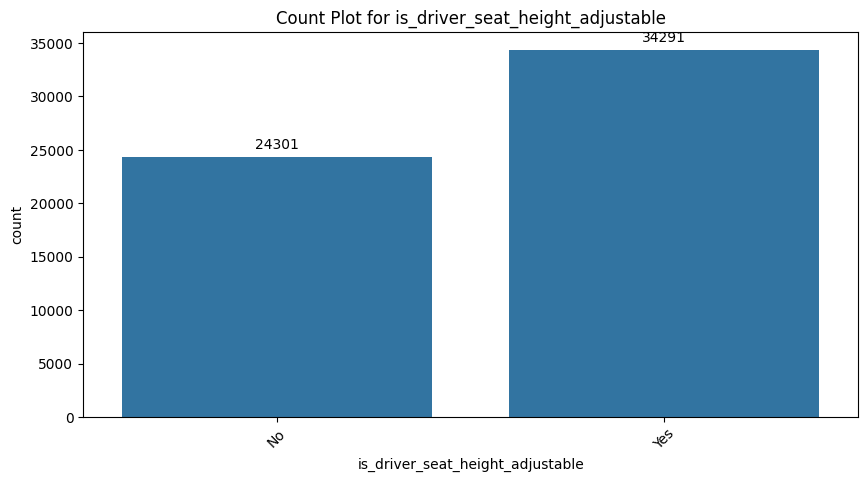

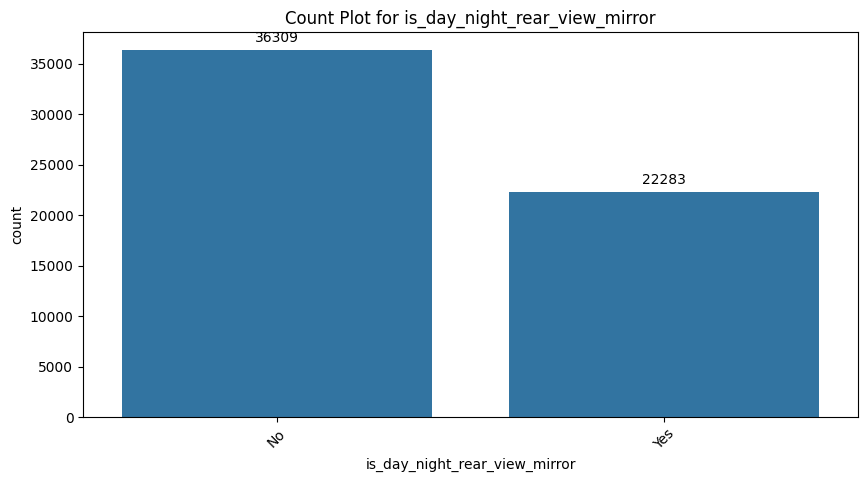

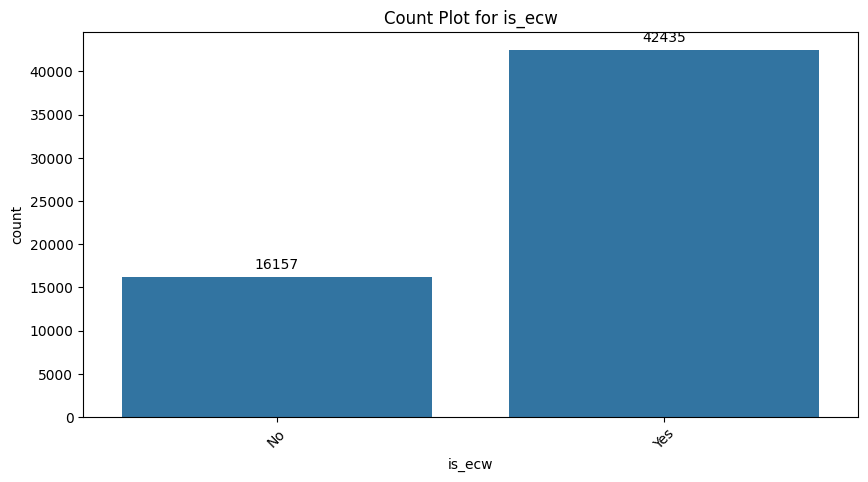

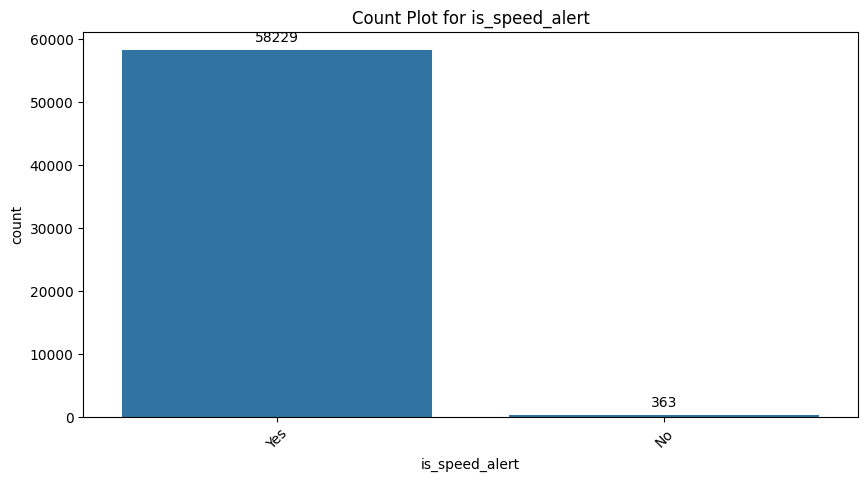

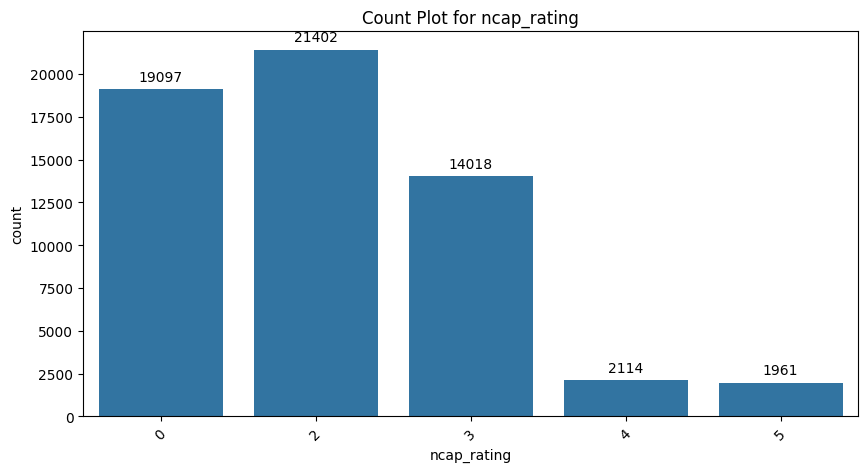

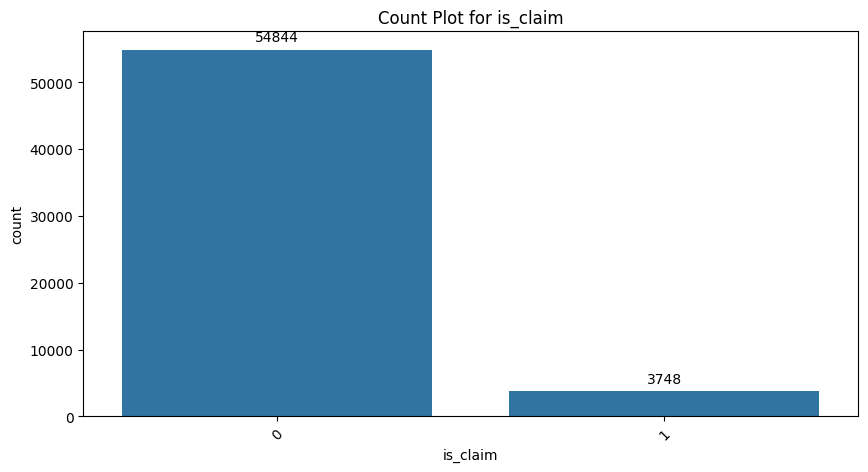

In [11]:
for col in categorical_features:
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=col, data=data)
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')


    plt.show()



#### Numerical features

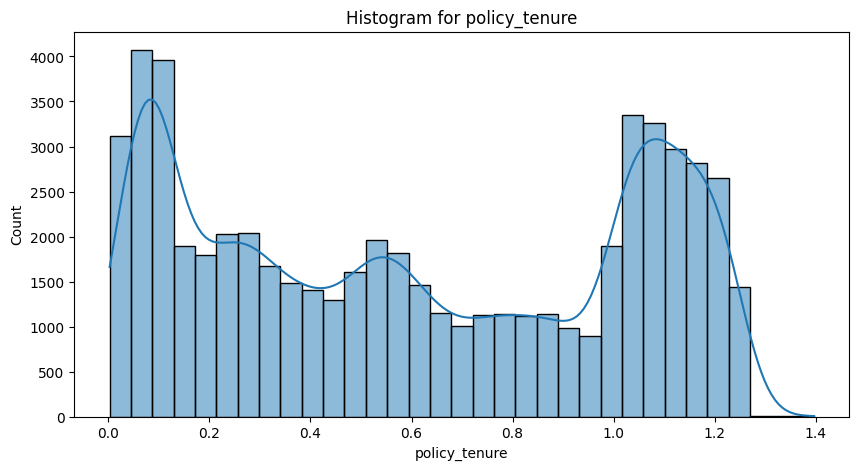

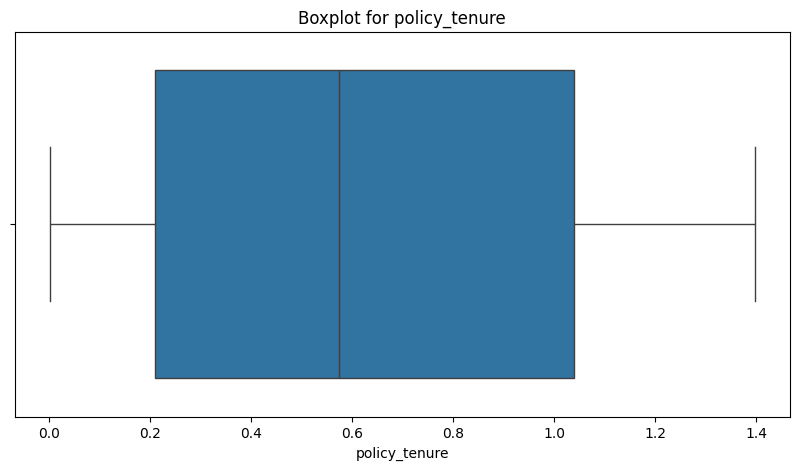

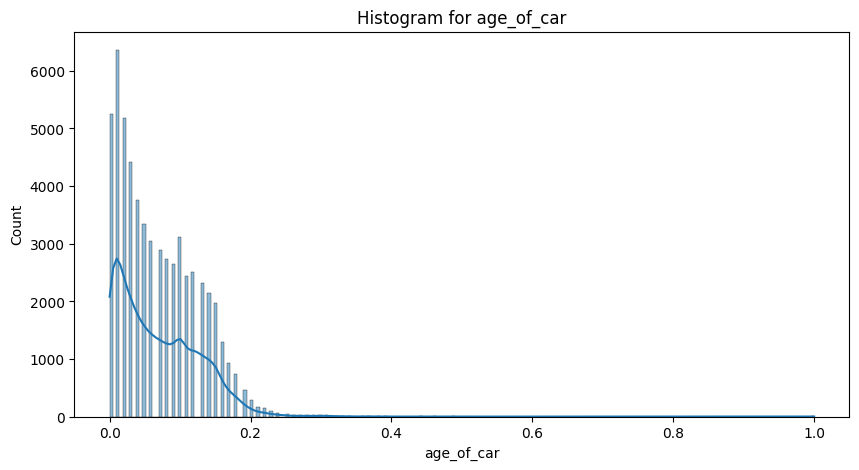

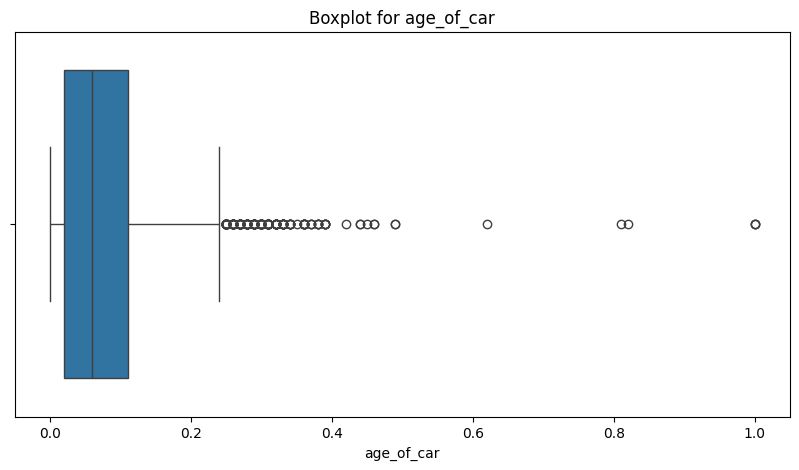

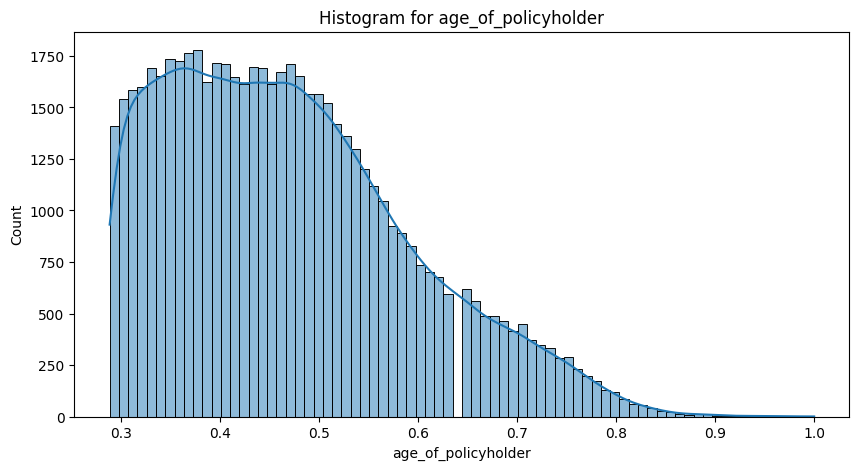

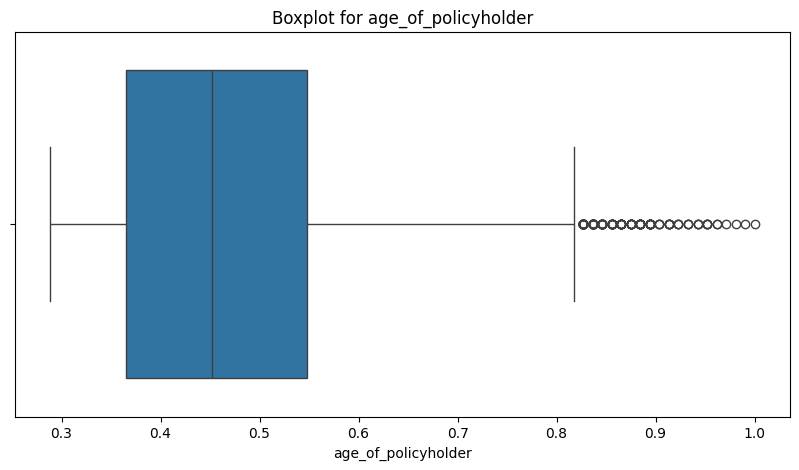

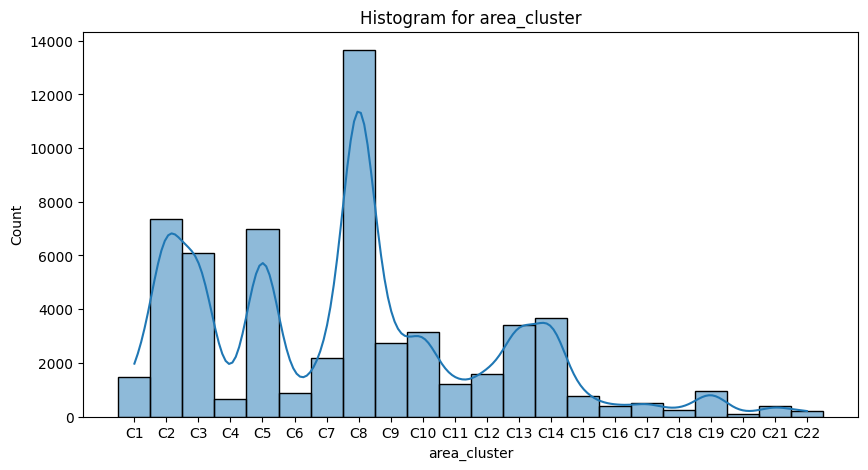

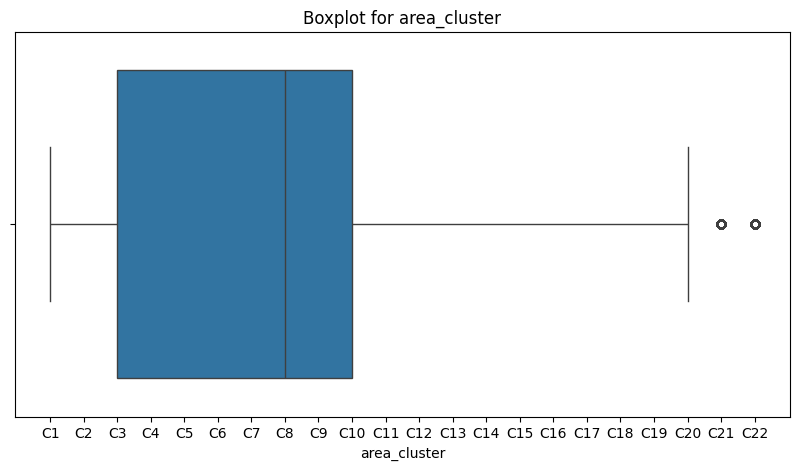

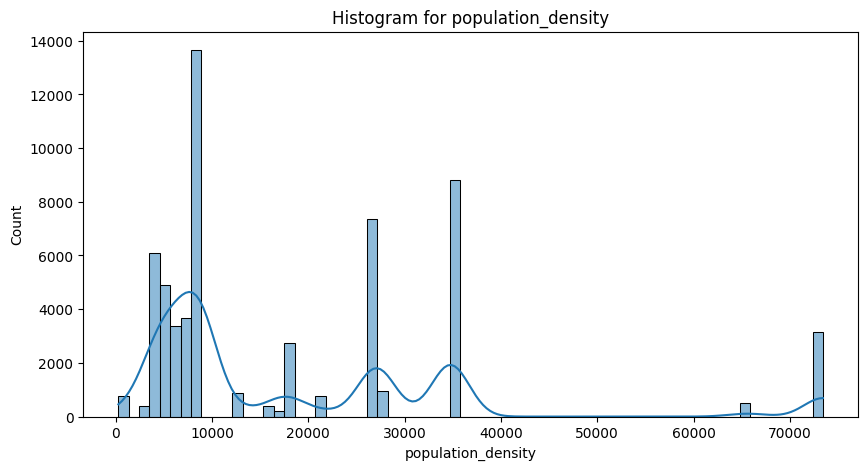

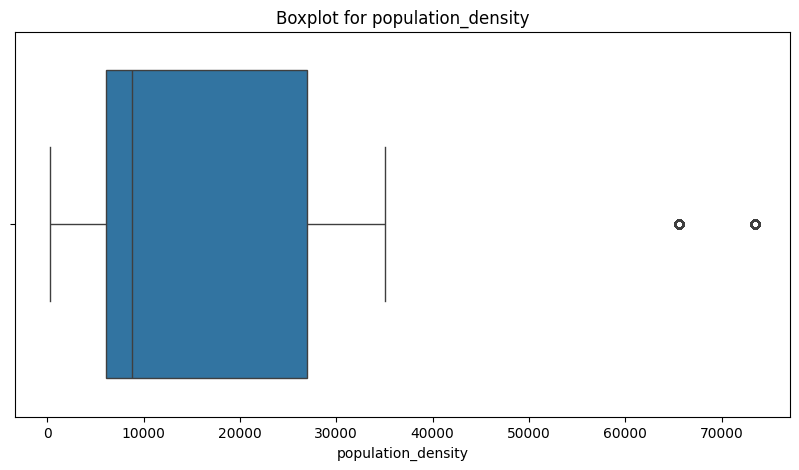

In [12]:
for col in numerical_features:
  plt.figure(figsize=(10,5))
  sns.histplot(x=col,data=data,kde=True)
  plt.title(f"Histogram for {col}")
  plt.show()

  plt.figure(figsize=(10,5))
  sns.boxplot(x=col,data=data)
  plt.title(f"Boxplot for {col}")
  plt.show()


### Bivariate Analysis

#### Categorical features with respect to target variable

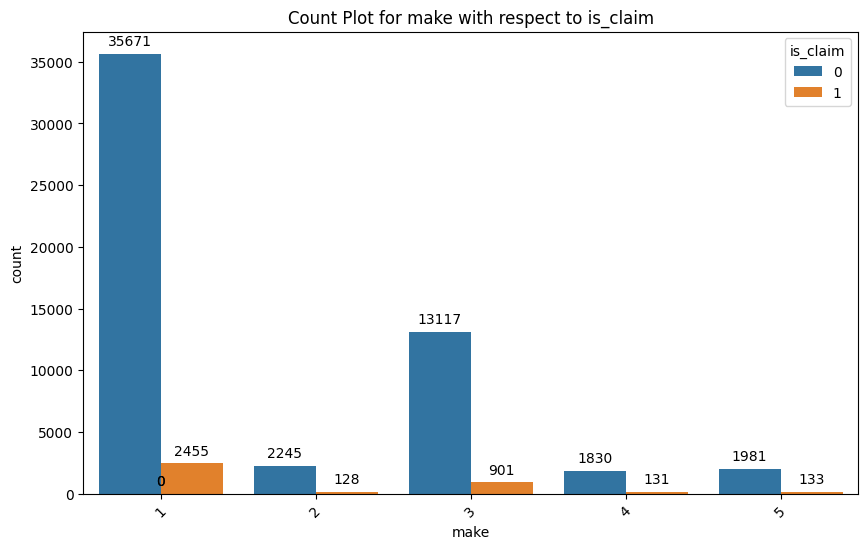

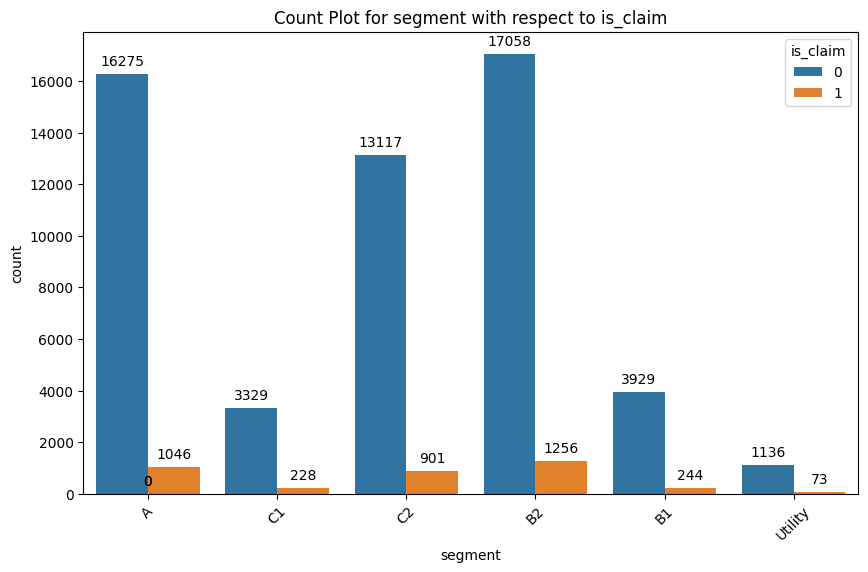

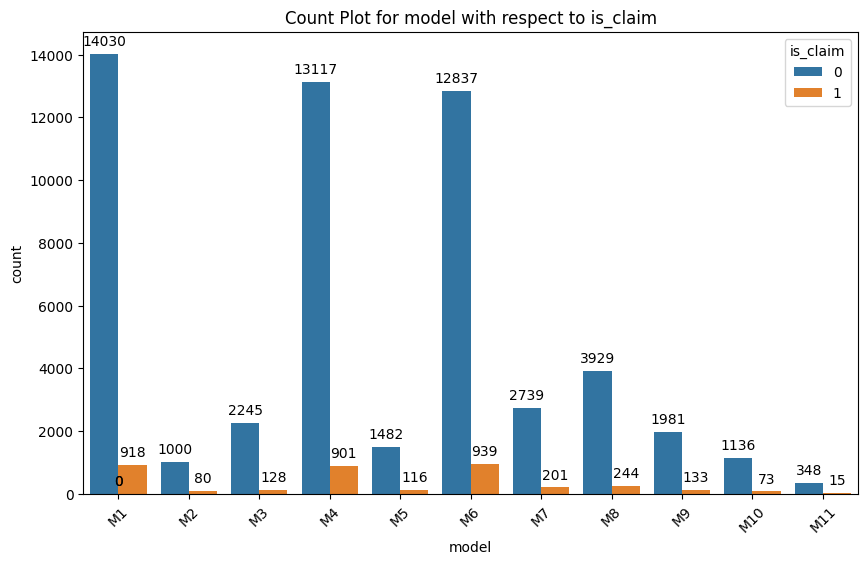

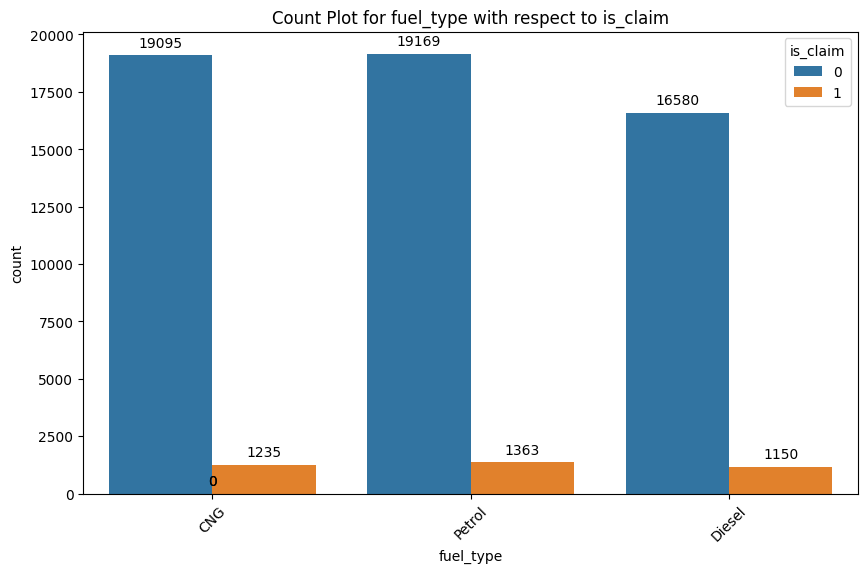

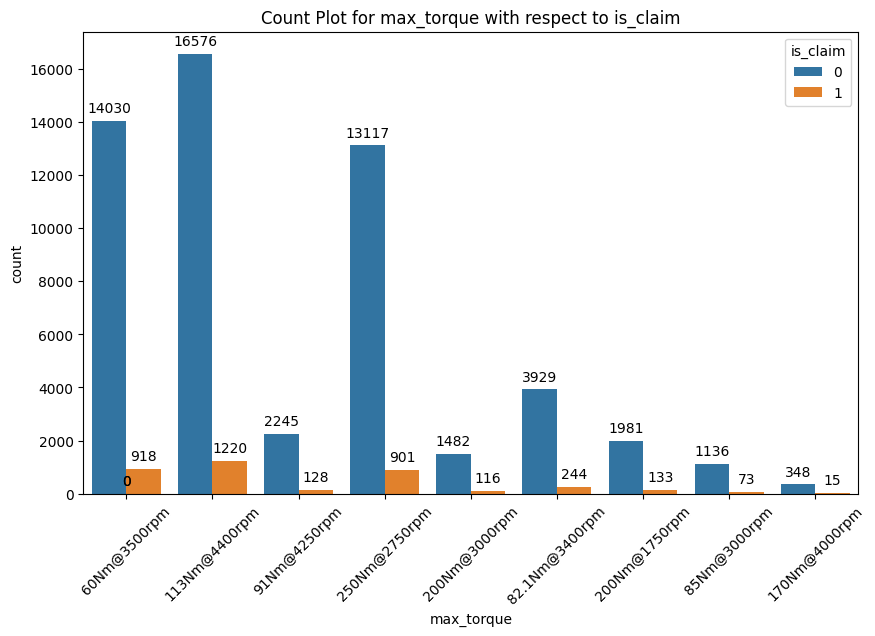

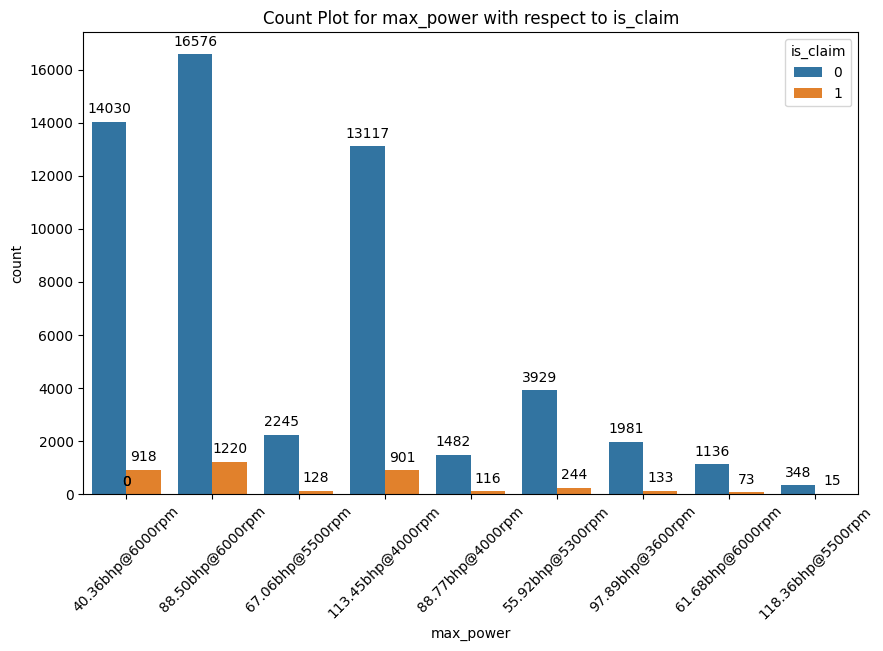

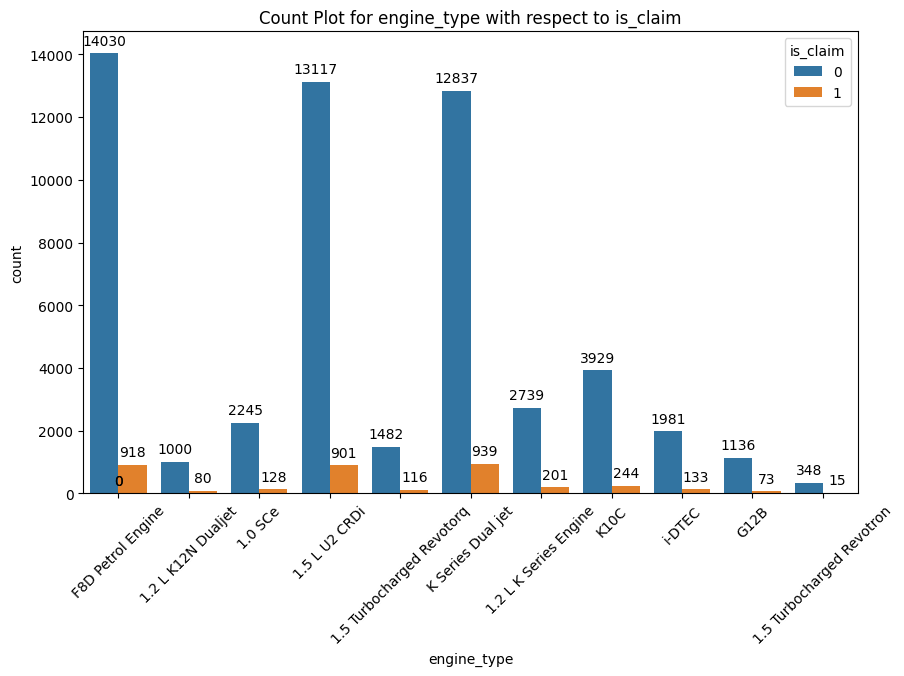

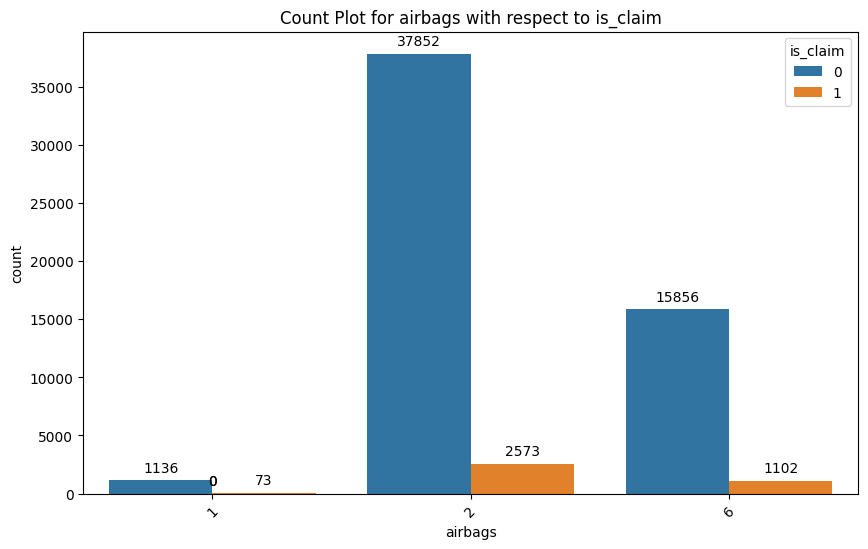

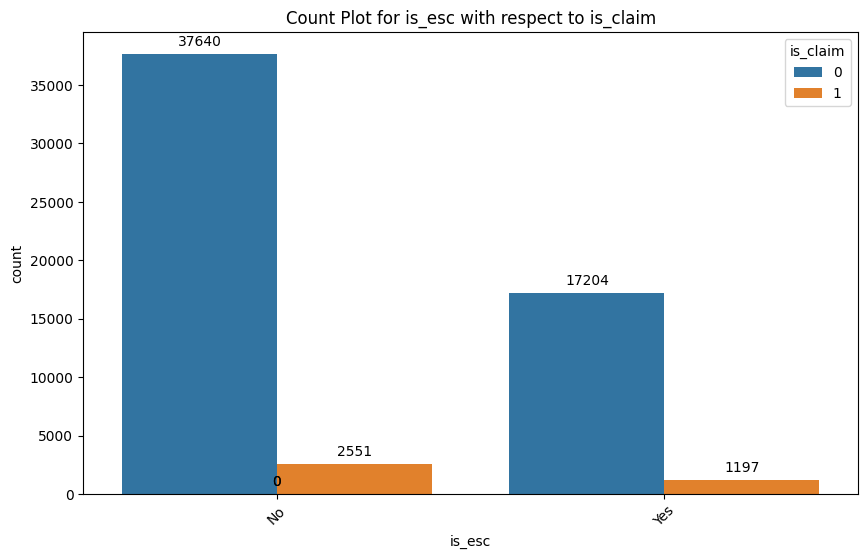

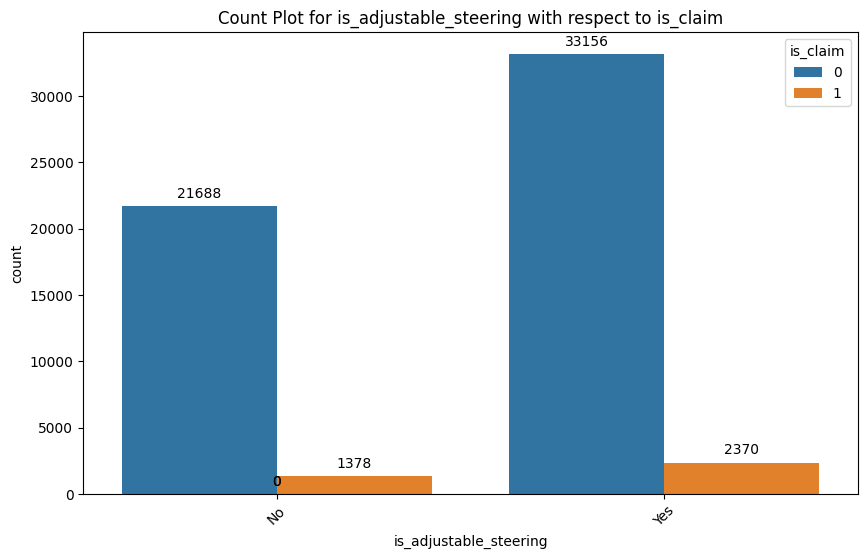

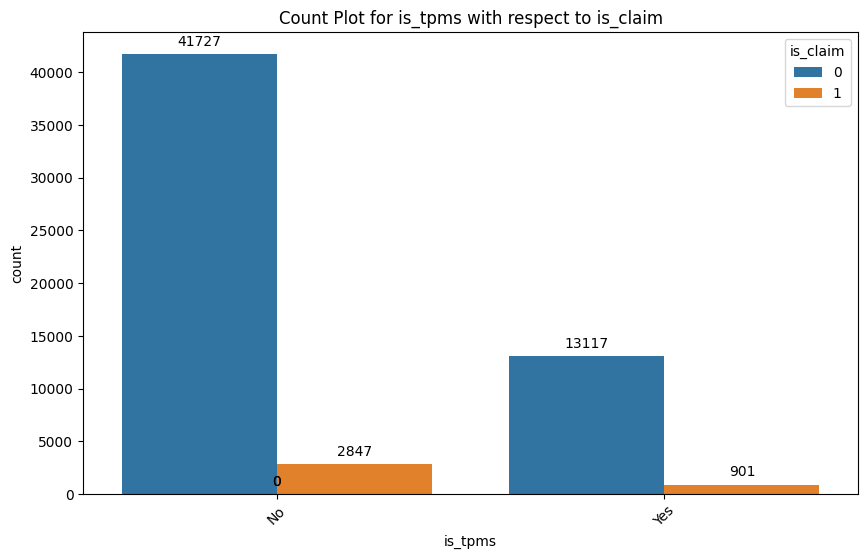

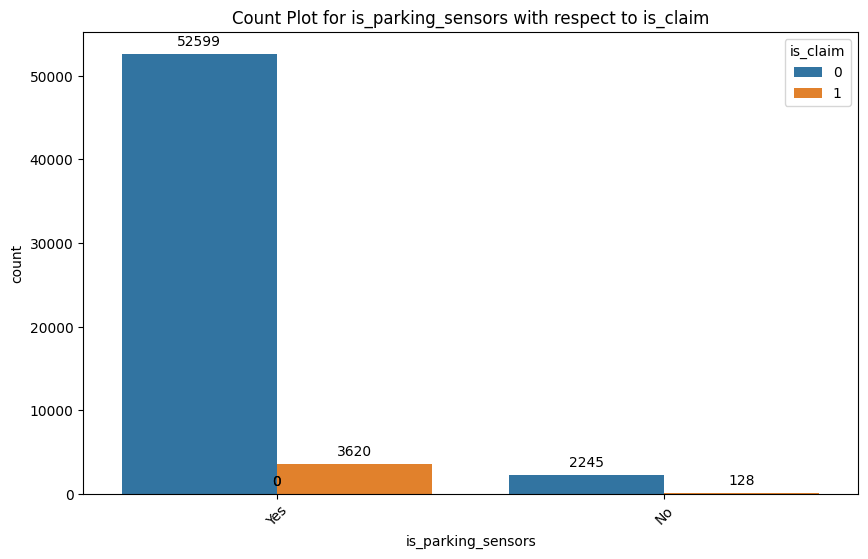

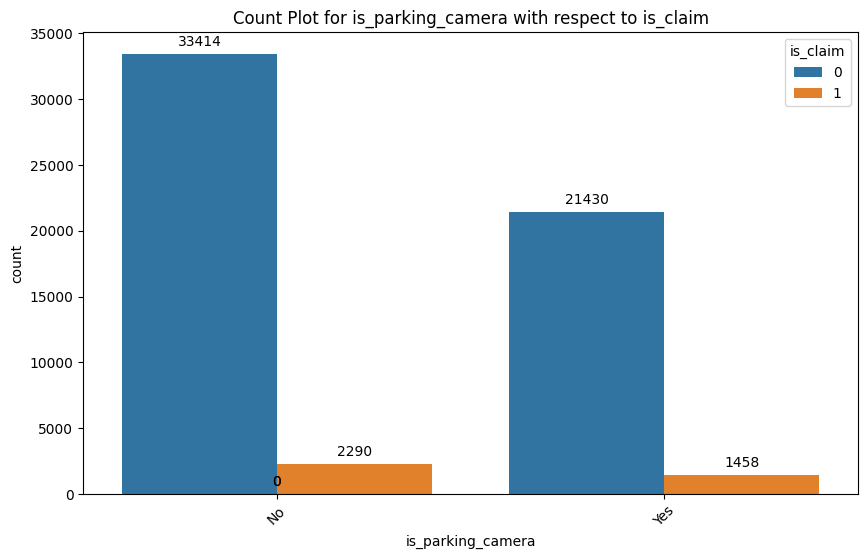

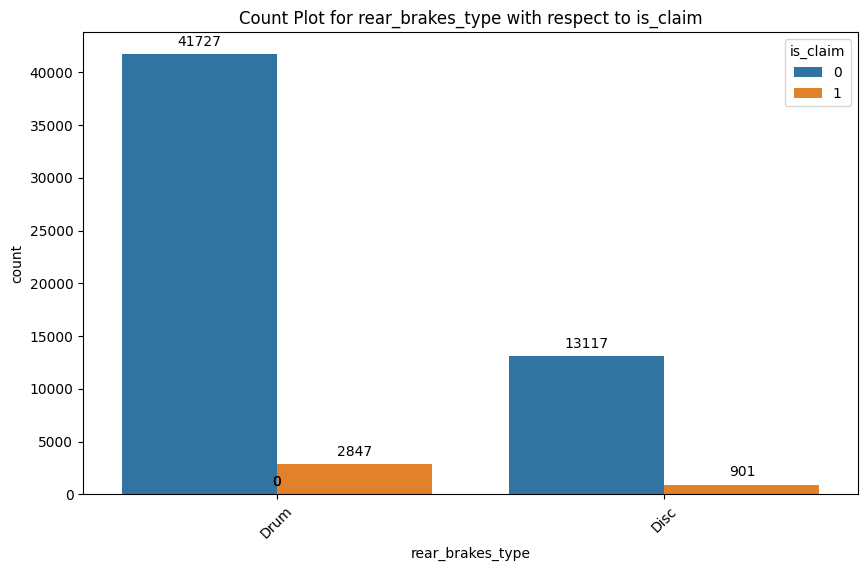

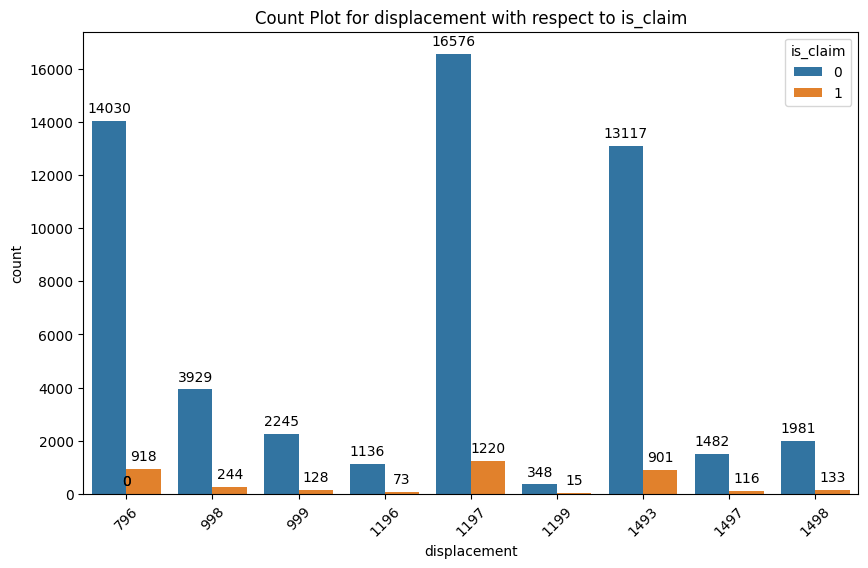

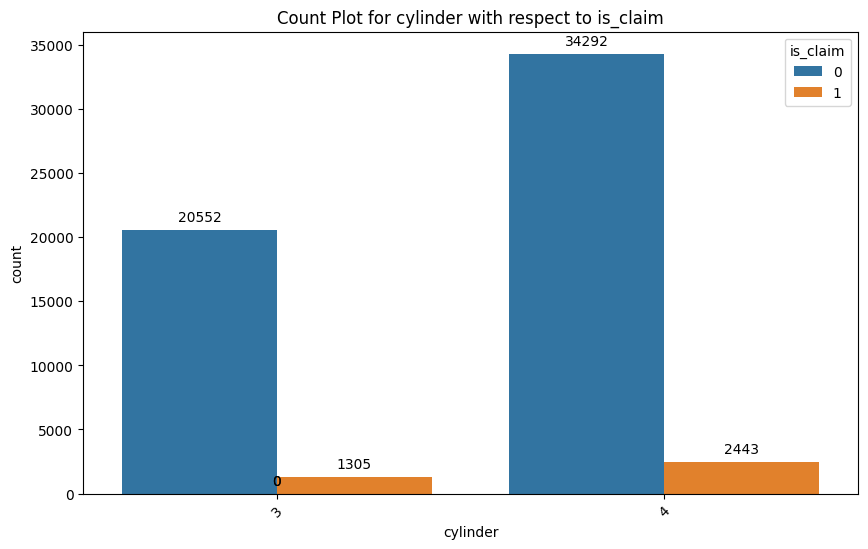

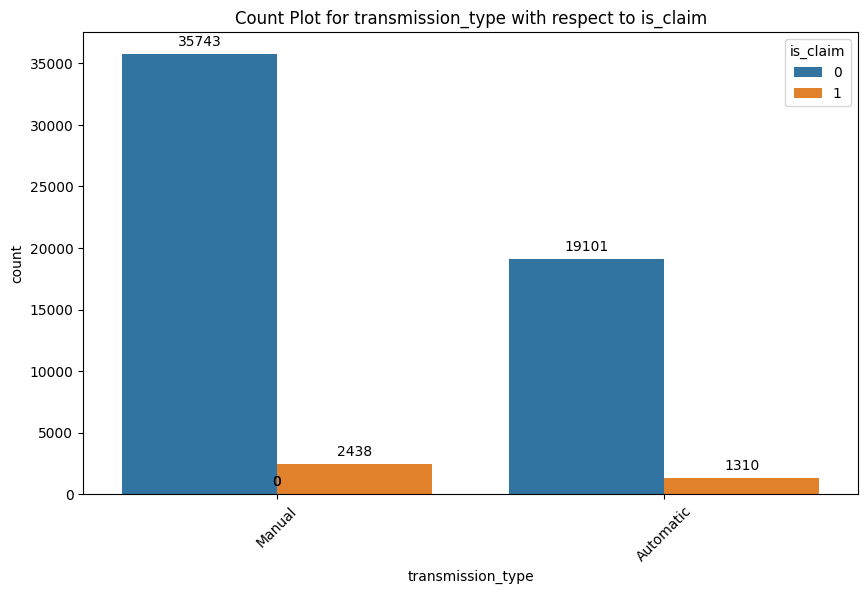

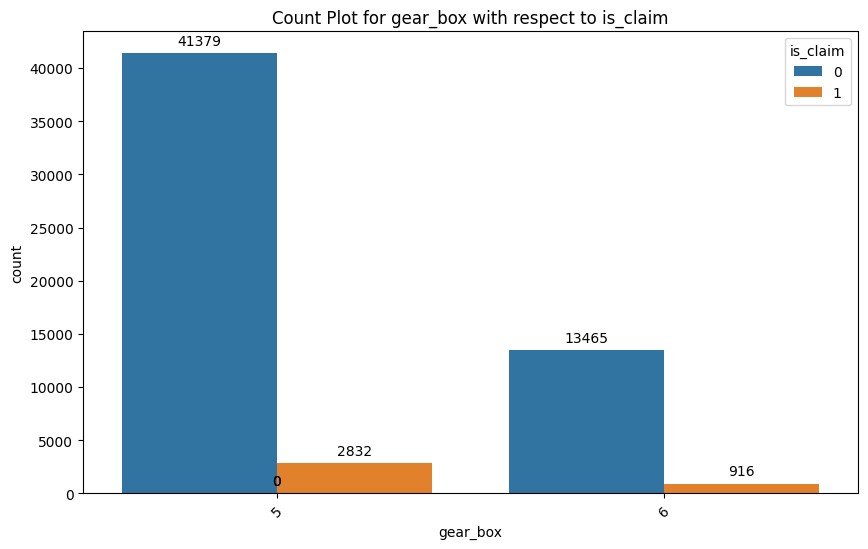

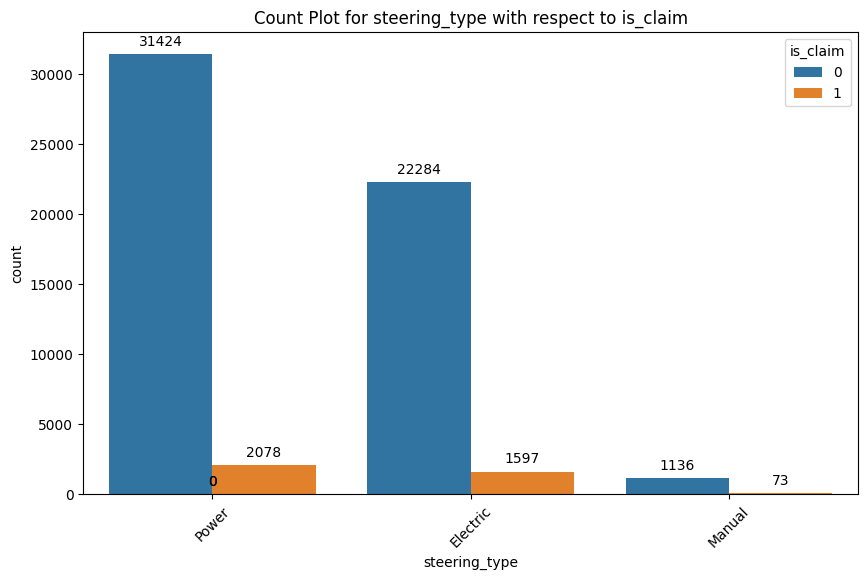

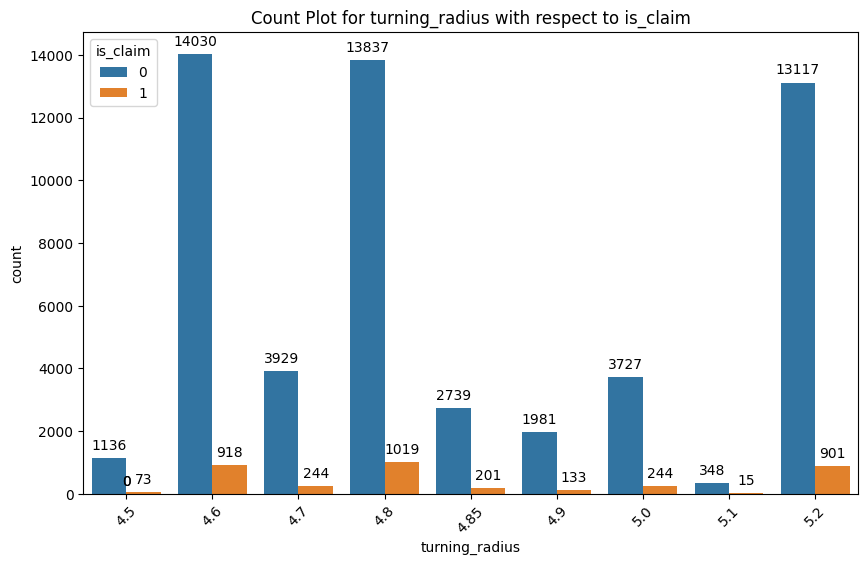

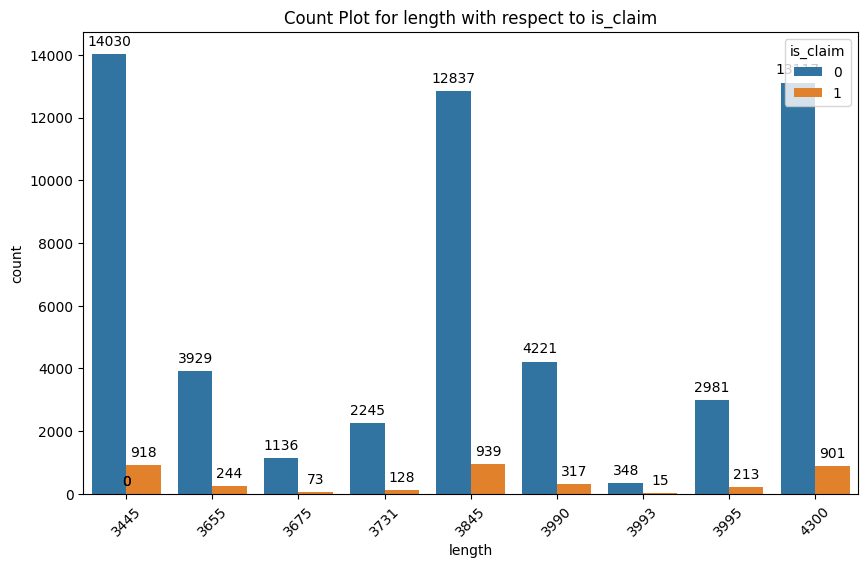

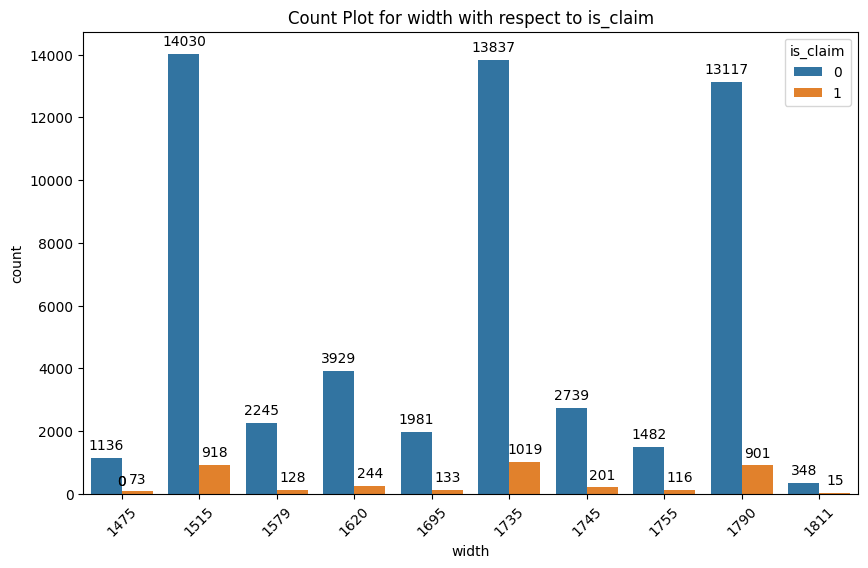

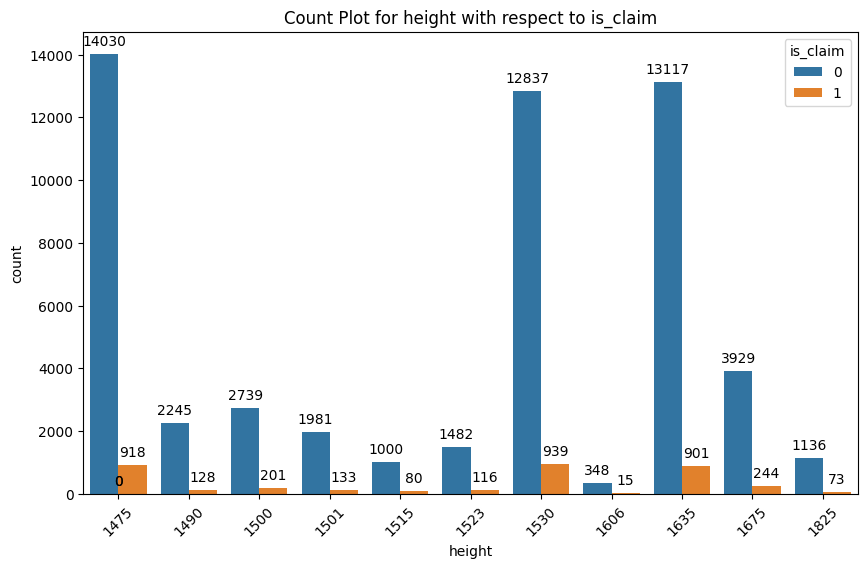

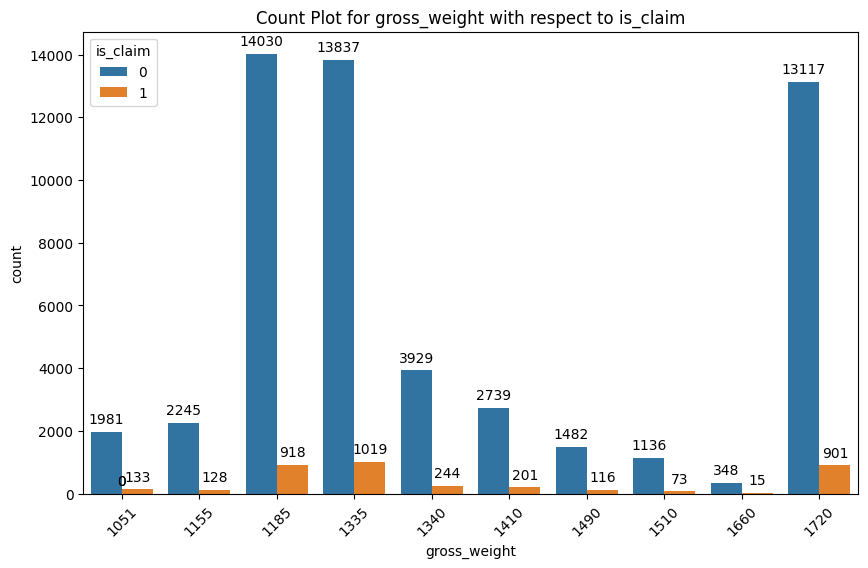

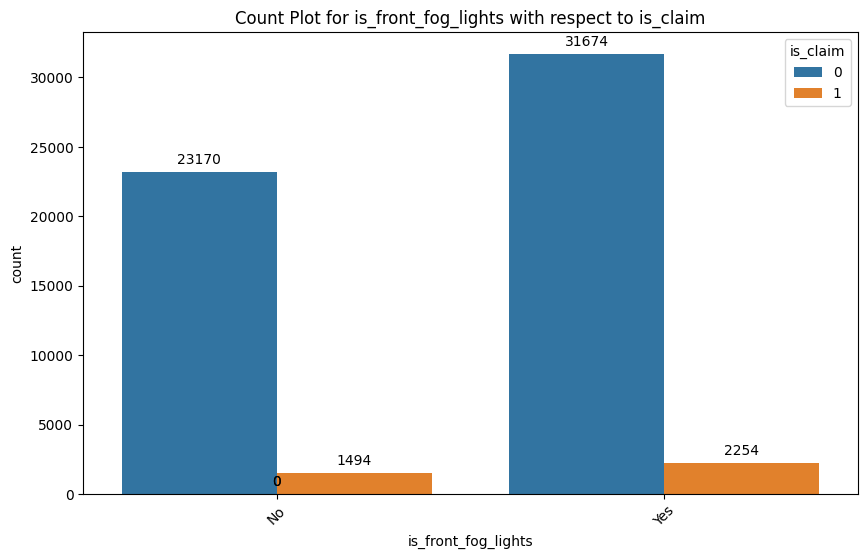

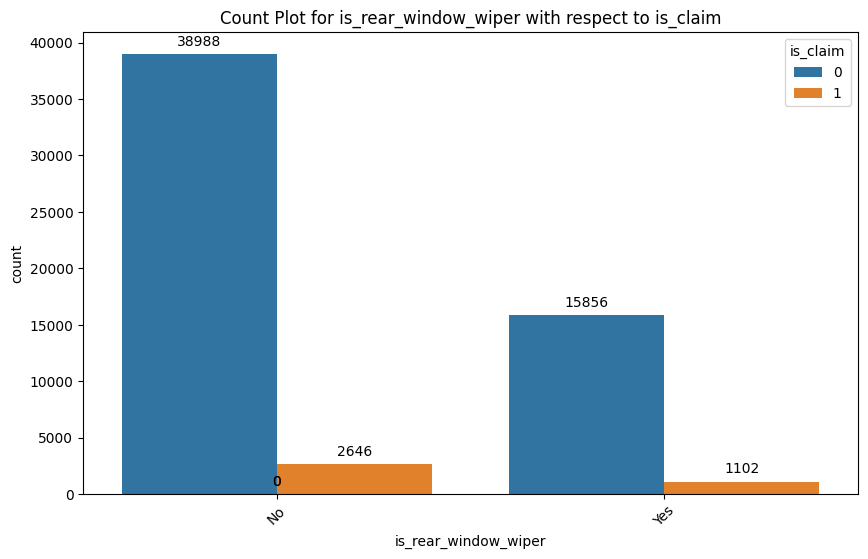

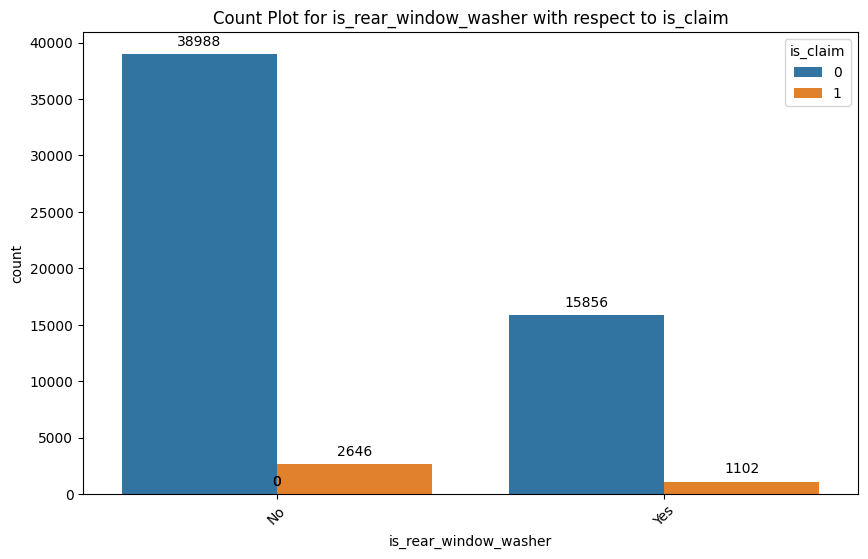

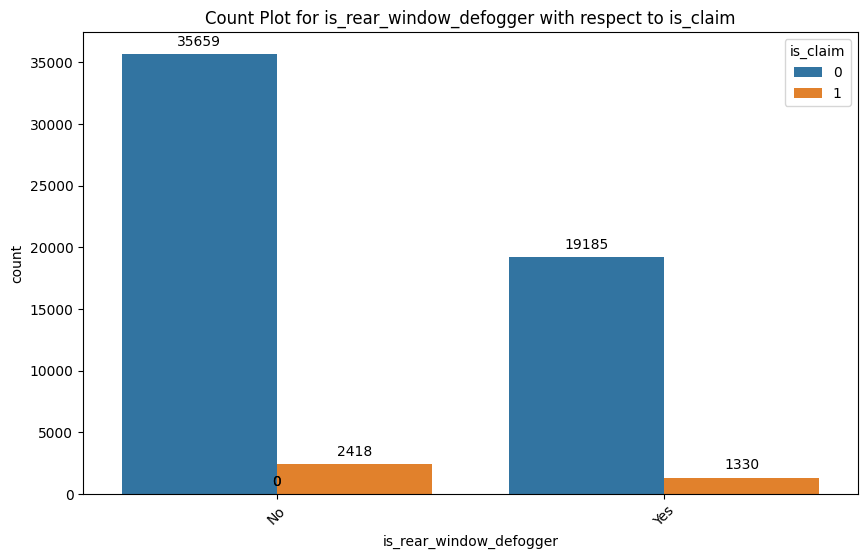

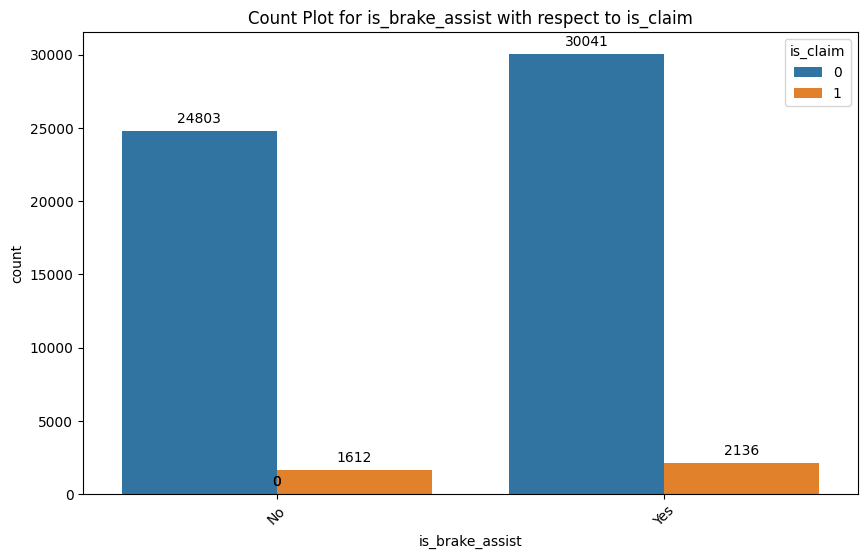

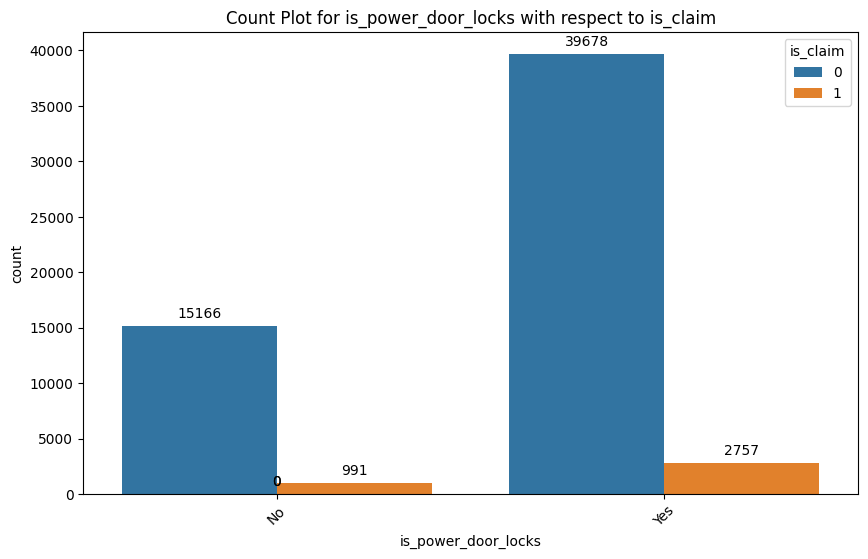

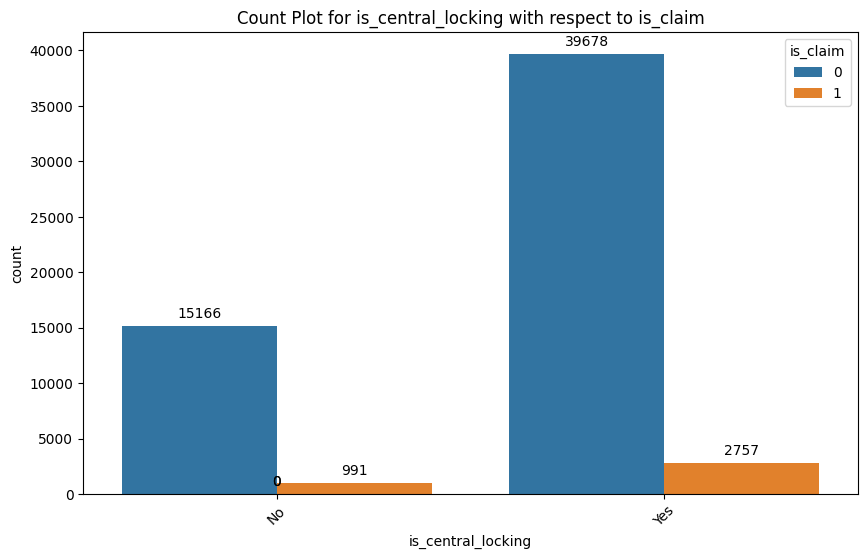

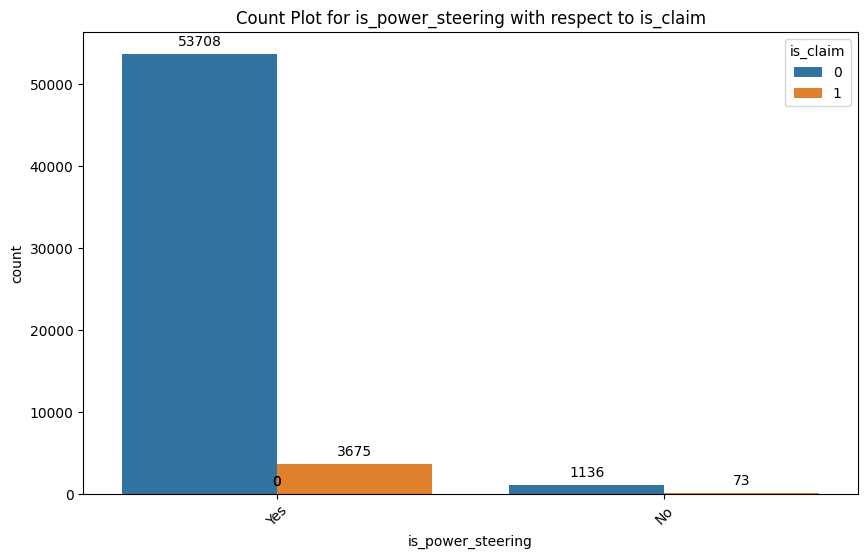

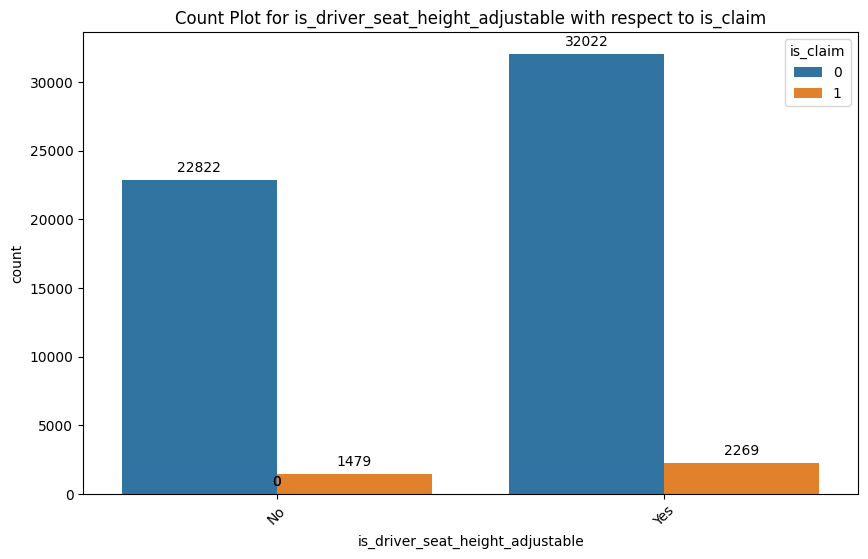

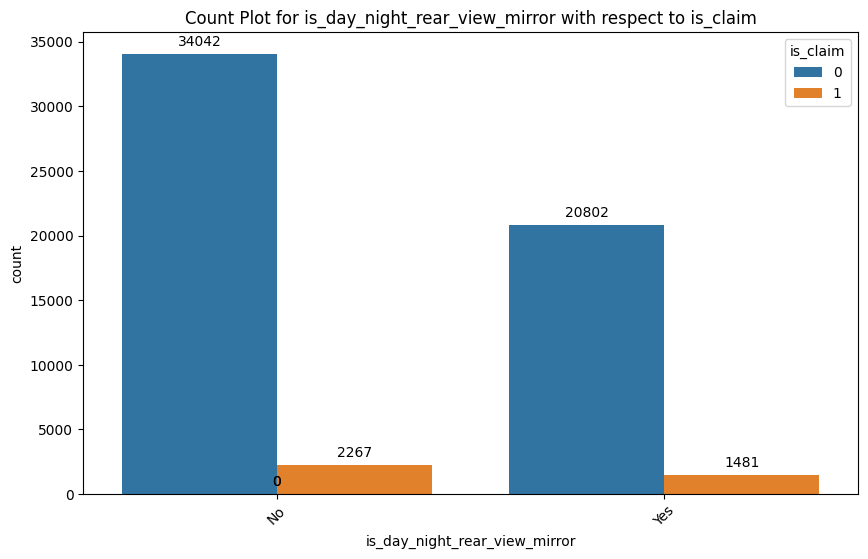

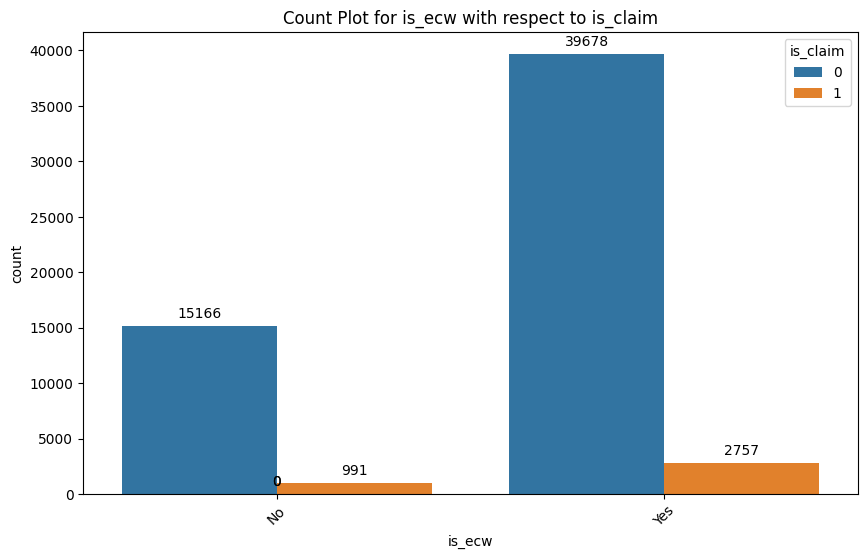

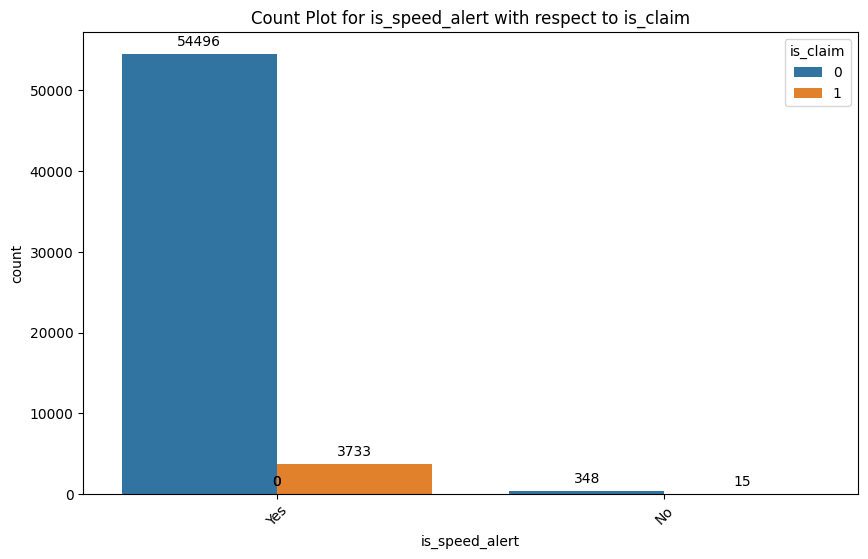

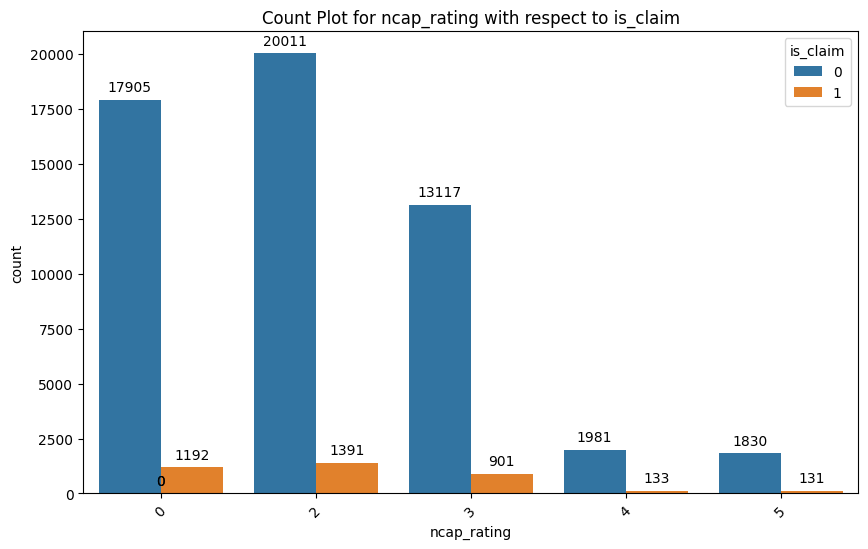

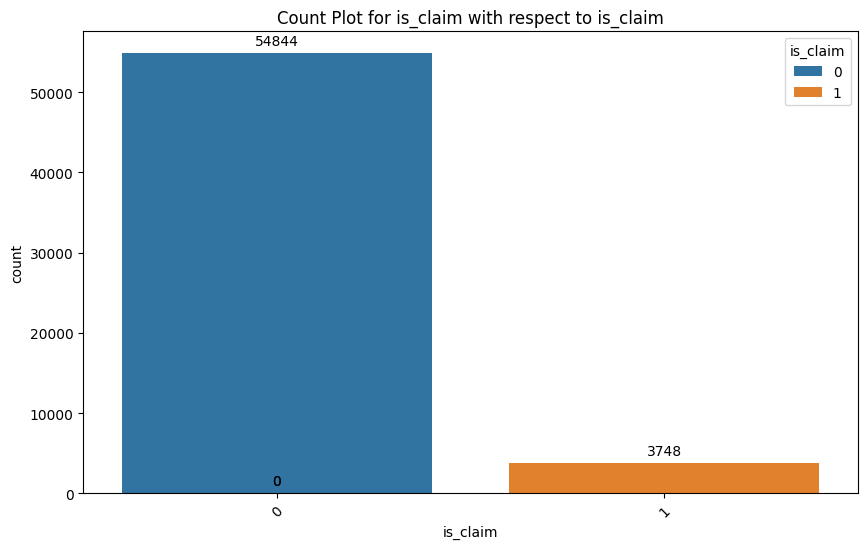

In [13]:
target = 'is_claim'
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=col,data=data,hue=target)
    plt.title(f'Count Plot for {col} with respect to {target}')
    plt.xticks(rotation=45)

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(format(height, '.0f'),
                    (p.get_x() + p.get_width() / 2., height),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')

    plt.show()



#### Numerical features with respect to target variable

<Figure size 1000x600 with 0 Axes>

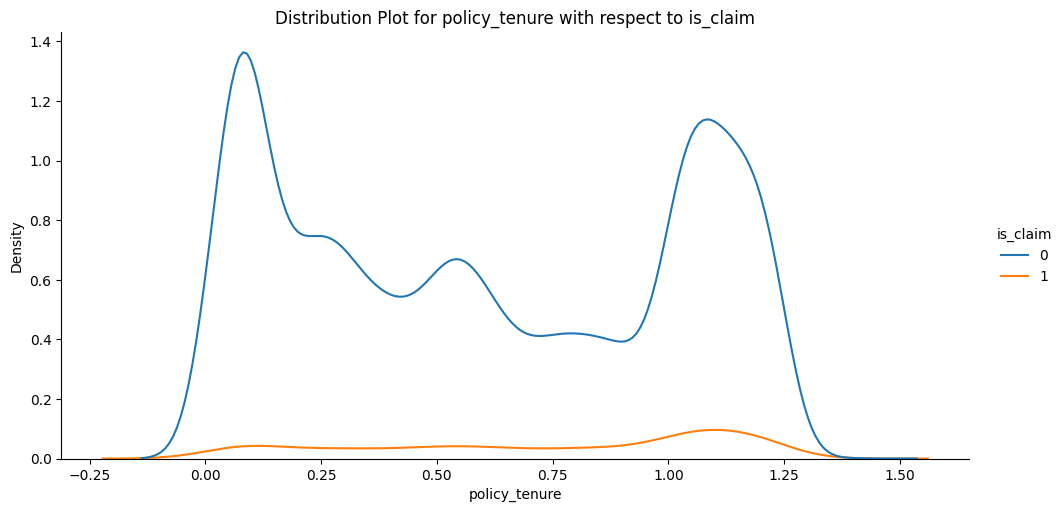

<Figure size 1000x600 with 0 Axes>

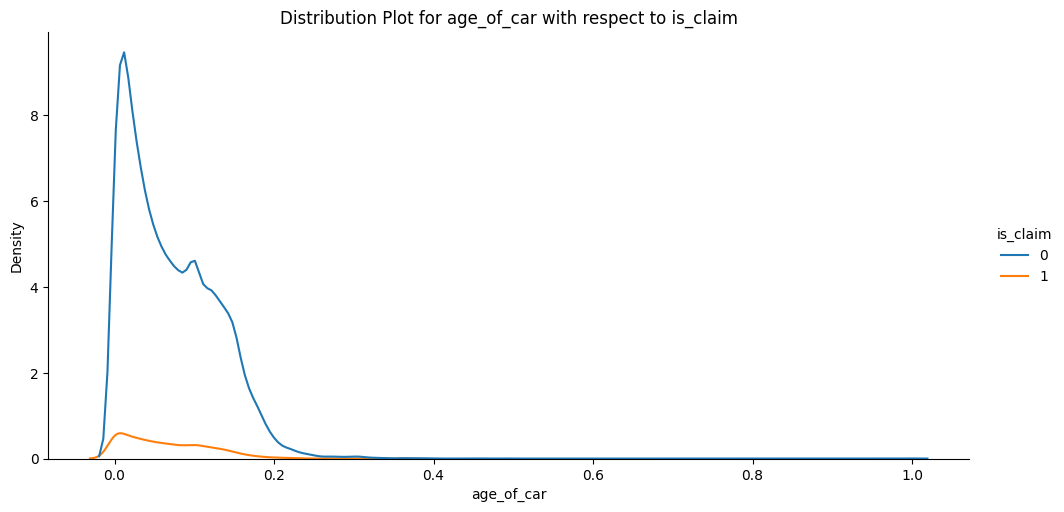

<Figure size 1000x600 with 0 Axes>

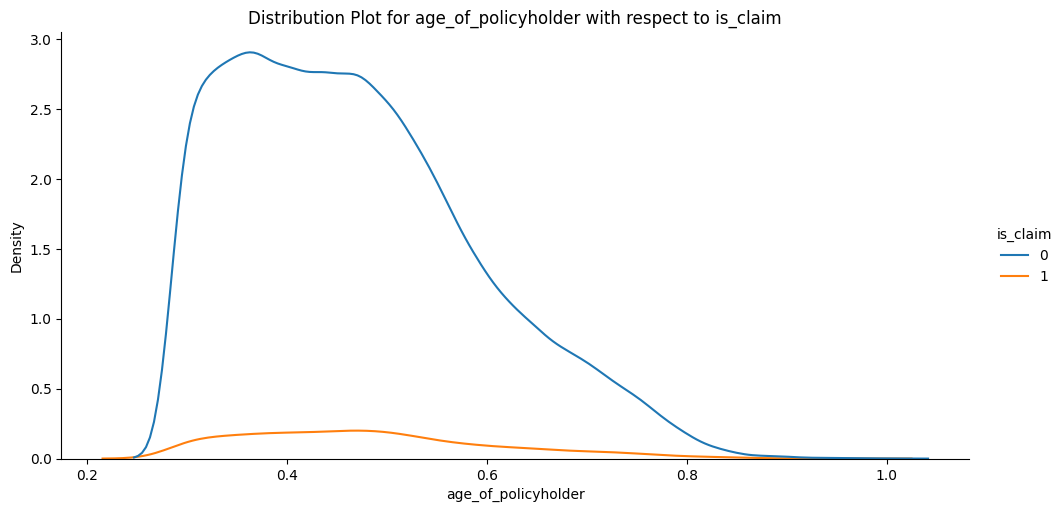

<Figure size 1000x600 with 0 Axes>

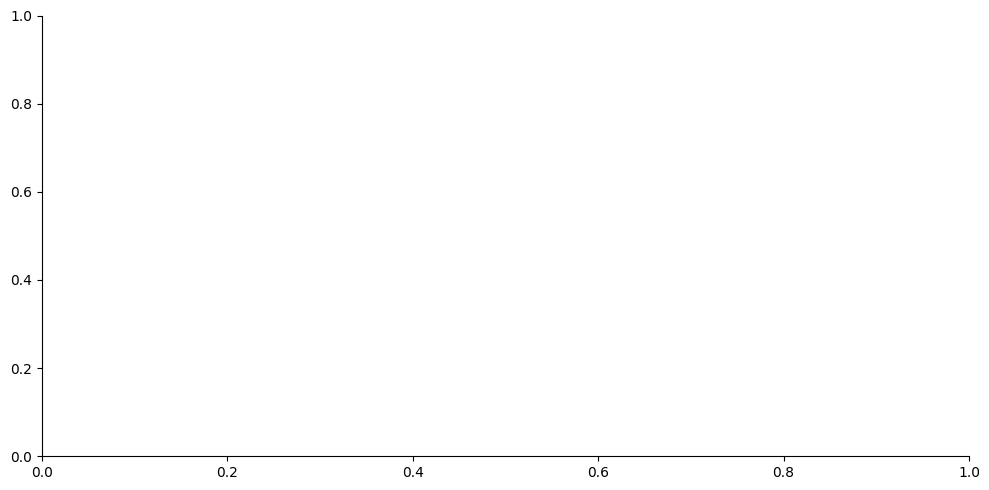

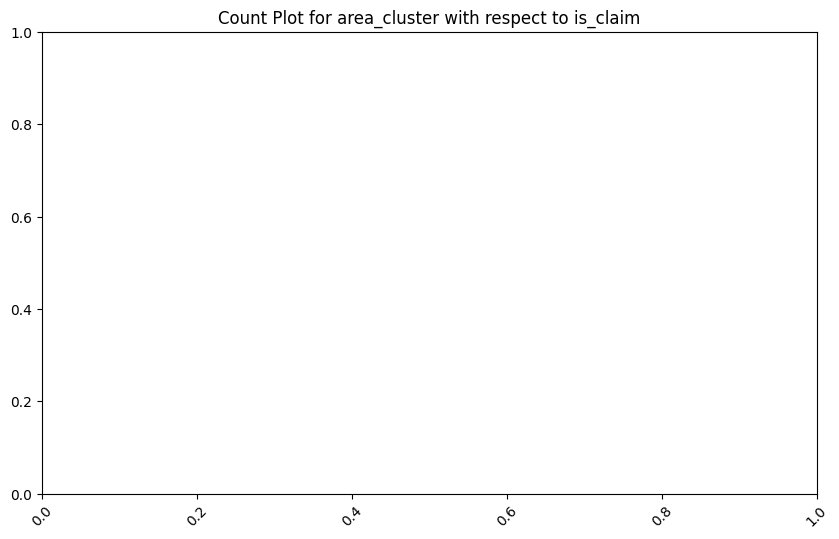

<Figure size 1000x600 with 0 Axes>

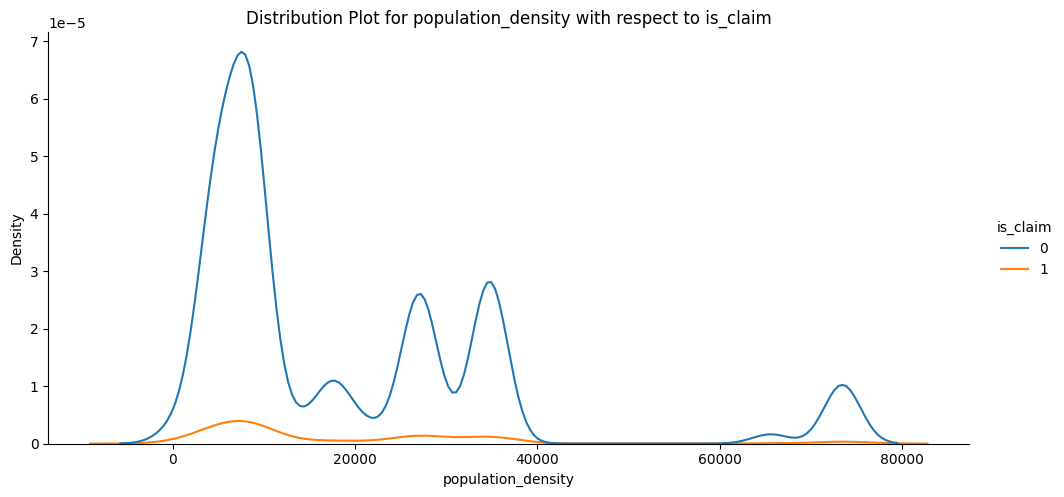

In [14]:
target = "is_claim"
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    try:
        sns.displot(data, x=col, hue=target, kind="kde", aspect=2)
        plt.title(f'Distribution Plot for {col} with respect to {target}')
        plt.show()
    except TypeError :
        # Handle the case where col is categorical
        plt.figure(figsize=(10, 6))
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                        textcoords='offset points')

        plt.xticks(rotation=45)
        plt.title(f'Count Plot for {col} with respect to {target}')
        plt.show()


### Data Preprocessing (Extracting information(Feature Engineering),Outlier Treatment and Encoding)


In [15]:
data.head(3)
pd.set_option('display.max_columns', None)
data.head(3)

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   

   population_density  make segment model fuel_type    max_torque  \
0                4990     1       A    M1       CNG  60Nm@3500rpm   
1               27003     1       A    M1       CNG  60Nm@3500rpm   
2                4076     1       A    M1       CNG  60Nm@3500rpm   

          max_power        engine_type  airbags is_esc is_adjustable_steering  \
0  40.36bhp@6000rpm  F8D Petrol Engine        2     No                     No   
1  40.36bhp@6000rpm  F8D Petrol Engine        2     No                     No   
2  40.36bhp@6000rpm  F8D Petrol Engine        2     No                     No   

  is_tpms is_parking_sensors is_parking_camera rear_brakes_type  displacement  \
0      No                Yes                No             Drum           796   
1      No                Yes                No             Drum           796   
2      No                Yes                No             Drum           796   

   cylinder transmission_type  gear_box steering_type  turning_radius  length  \
0         3            Manual         5         Power             4.6    3445   
1         3            Manual         5         Power             4.6    3445   
2         3            Manual         5         Power             4.6    3445   

   width  height  gross_weight is_front_fog_lights is_rear_window_wiper  \
0   1515    1475          1185                  No                   No   
1   1515    1475          1185                  No                   No   
2   1515    1475          1185                  No                   No   

  is_rear_window_washer is_rear_window_defogger is_brake_assist  \
0                    No                      No              No   
1                    No                      No              No   
2                    No                      No              No   

  is_power_door_locks is_central_locking is_power_steering  \
0                  No                 No               Yes   
1                  No                 No               Yes   
2                  No                 No               Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   
2                               No                            No     No   

  is_speed_alert  ncap_rating  is_claim  
0            Yes            0         0  
1            Yes            0         0  
2            Yes            0         0

In [16]:
X = data.drop("is_claim",axis=1)
y = data["is_claim"]

In [17]:
X.shape

(58592, 43)

In [18]:
y.shape

(58592,)

In [19]:
X['max_torque_nm'] = X['max_torque'].apply(lambda x: float(x.split('Nm')[0]))
X['max_torque_rpm'] = X['max_torque'].apply(lambda x: int(x.split('@')[1].split('rpm')[0]))
X['max_power_bhp'] =X['max_power'].apply(lambda x:float(x.split("bhp")[0]))
X['max_power_rpm'] =X['max_power'].apply(lambda x :int(x.split("@")[1].split("rpm")[0] ))

Dropping "max_torque","max_power" and "policy_id features

In [20]:
X = X.drop(["max_torque","max_power","policy_id"],axis=1)

In [21]:
X.shape

(58592, 44)

In [22]:
categorical_features = list(X.select_dtypes(include=["object"]).columns)
numerical_features = list(X.select_dtypes(exclude=["object"]).columns)
print("The categorical features are : ",categorical_features)
print("The Number of categorical features are ",len(categorical_features))
print()
print("The numerical features are : ",numerical_features)
print("The Number of numerical features are ",len(numerical_features))

The categorical features are :  ['area_cluster', 'segment', 'model', 'fuel_type', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']
The Number of categorical features are  25

The numerical features are :  ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'make', 'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'max_torque_nm', 'max_torque_rpm', 'max_power_bhp', 'max_power_rpm']
The Number of numerical features are  19


In [23]:
for col in numerical_features:
  print(col,X[col].nunique())

policy_tenure 58592
age_of_car 49
age_of_policyholder 75
population_density 22
make 5
airbags 3
displacement 9
cylinder 2
gear_box 2
turning_radius 9
length 9
width 10
height 11
gross_weight 10
ncap_rating 5
max_torque_nm 8
max_torque_rpm 8
max_power_bhp 9
max_power_rpm 5


In [24]:
X[numerical_features].describe().T

count          mean           std          min  \
policy_tenure        58592.0      0.611246      0.414156     0.002735   
age_of_car           58592.0      0.069424      0.056721     0.000000   
age_of_policyholder  58592.0      0.469420      0.122886     0.288462   
population_density   58592.0  18826.858667  17660.174792   290.000000   
make                 58592.0      1.763722      1.136988     1.000000   
airbags              58592.0      3.137066      1.832641     1.000000   
displacement         58592.0   1162.355851    266.304786   796.000000   
cylinder             58592.0      3.626963      0.483616     3.000000   
gear_box             58592.0      5.245443      0.430353     5.000000   
turning_radius       58592.0      4.852893      0.228061     4.500000   
length               58592.0   3850.476891    311.457119  3445.000000   
width                58592.0   1672.233667    112.089135  1475.000000   
height               58592.0   1553.335370     79.622270  1475.000000   
gross_weight         58592.0   1385.276813    212.423085  1051.000000   
ncap_rating          58592.0      1.759950      1.389576     0.000000   
max_torque_nm        58592.0    134.450937     73.146794    60.000000   
max_torque_rpm       58592.0   3533.176031    725.960661  1750.000000   
max_power_bhp        58592.0     78.976765     27.699259    40.360000   
max_power_rpm        58592.0   5307.163094    916.770819  3600.000000   

                             25%          50%           75%           max  
policy_tenure           0.210250     0.573792      1.039104      1.396641  
age_of_car              0.020000     0.060000      0.110000      1.000000  
age_of_policyholder     0.365385     0.451923      0.548077      1.000000  
population_density   6112.000000  8794.000000  27003.000000  73430.000000  
make                    1.000000     1.000000      3.000000      5.000000  
airbags                 2.000000     2.000000      6.000000      6.000000  
displacement          796.000000  1197.000000   1493.000000   1498.000000  
cylinder                3.000000     4.000000      4.000000      4.000000  
gear_box                5.000000     5.000000      5.000000      6.000000  
turning_radius          4.600000     4.800000      5.000000      5.200000  
length               3445.000000  3845.000000   3995.000000   4300.000000  
width                1515.000000  1735.000000   1755.000000   1811.000000  
height               1475.000000  1530.000000   1635.000000   1825.000000  
gross_weight         1185.000000  1335.000000   1510.000000   1720.000000  
ncap_rating             0.000000     2.000000      3.000000      5.000000  
max_torque_nm          60.000000   113.000000    200.000000    250.000000  
max_torque_rpm       2750.000000  3500.000000   4400.000000   4400.000000  
max_power_bhp          40.360000    88.500000     97.890000    118.360000  
max_power_rpm        4000.000000  6000.000000   6000.000000   6000.000000

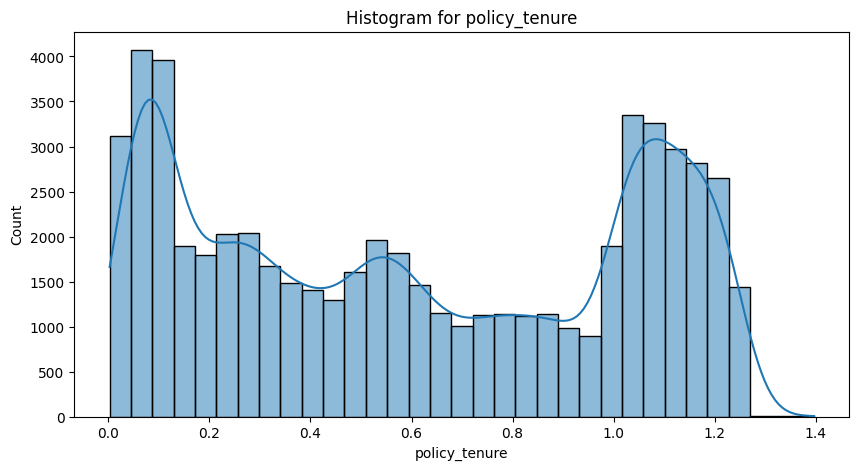

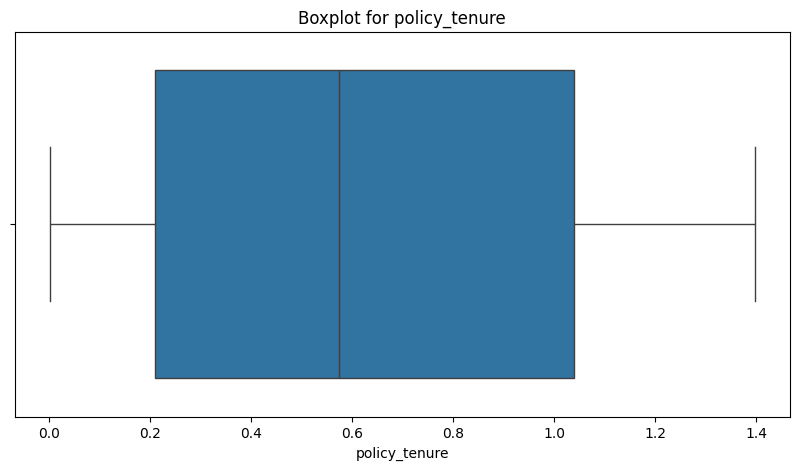

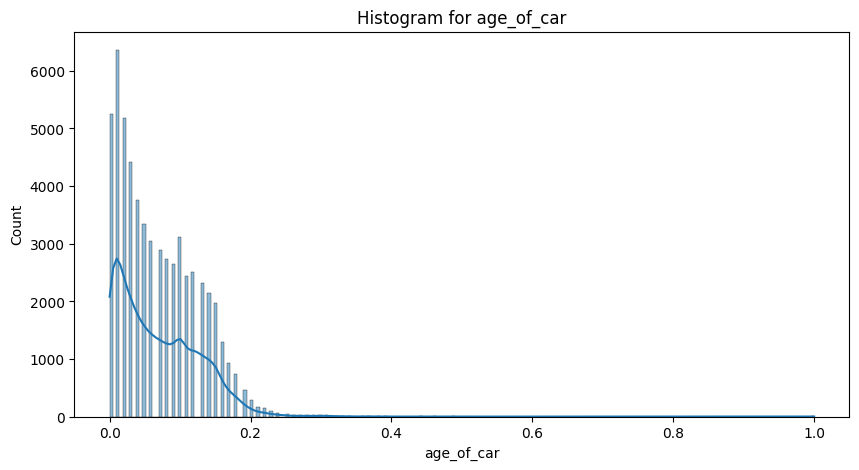

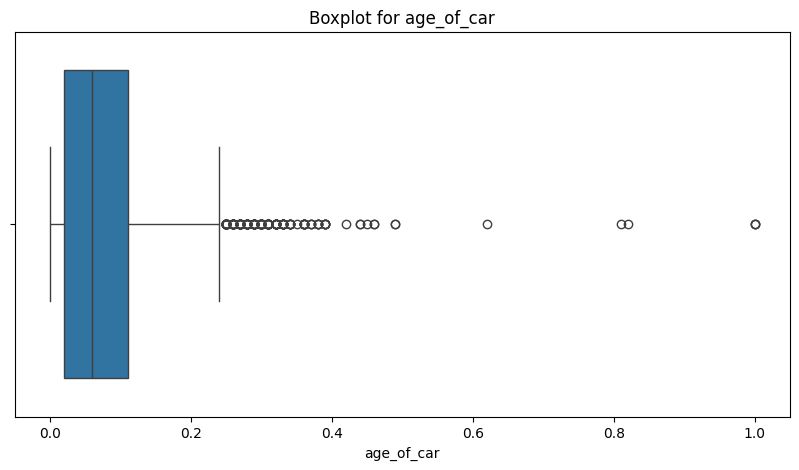

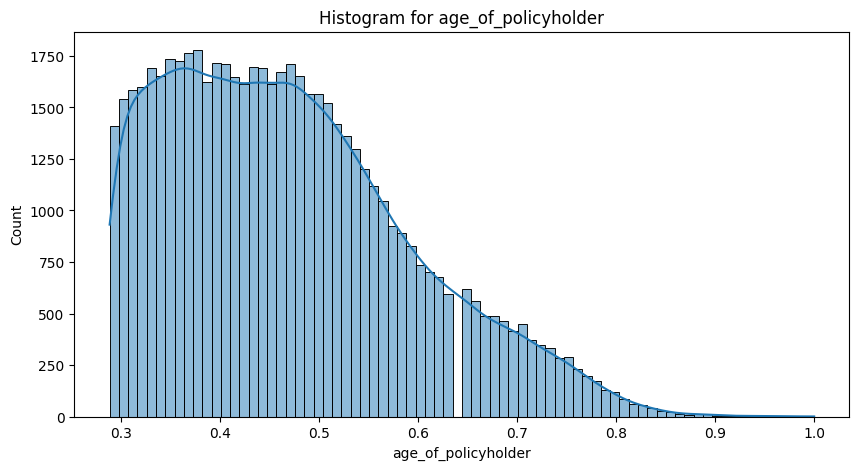

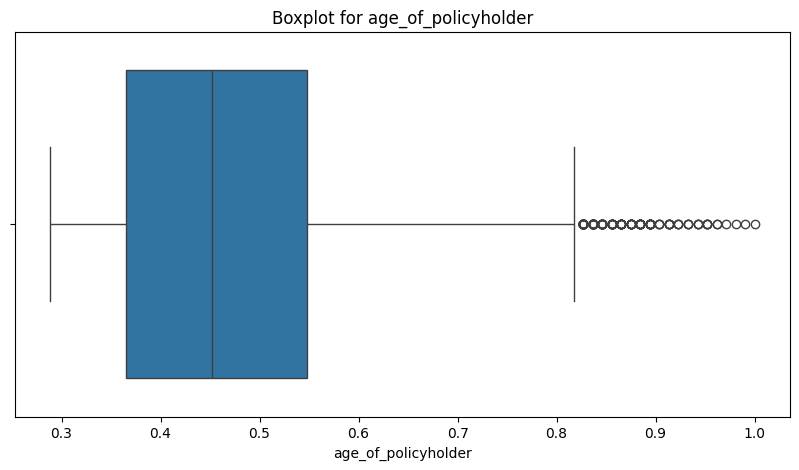

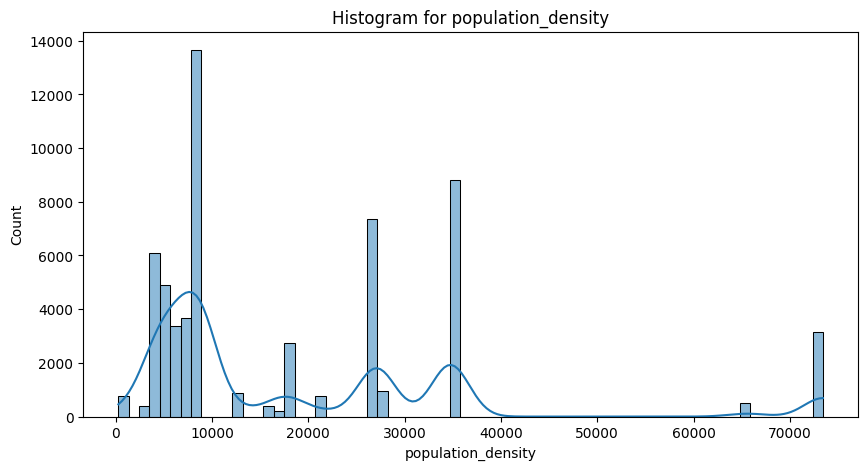

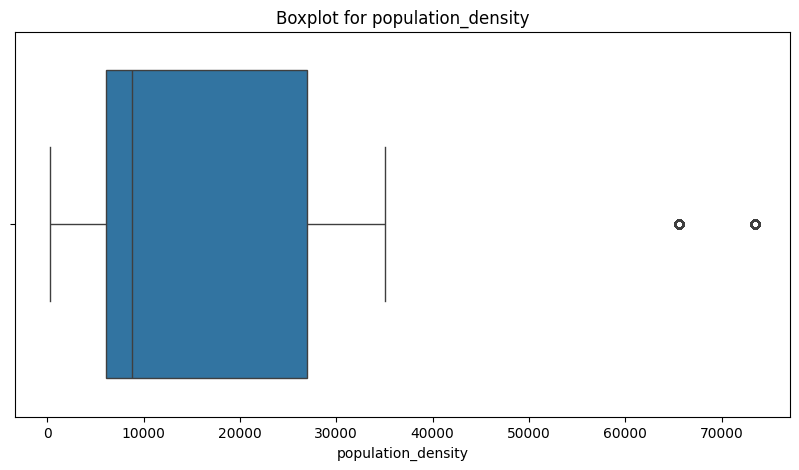

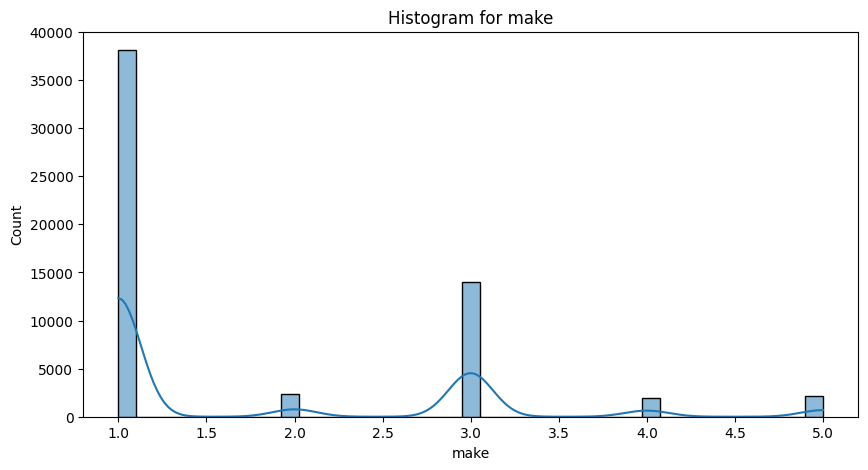

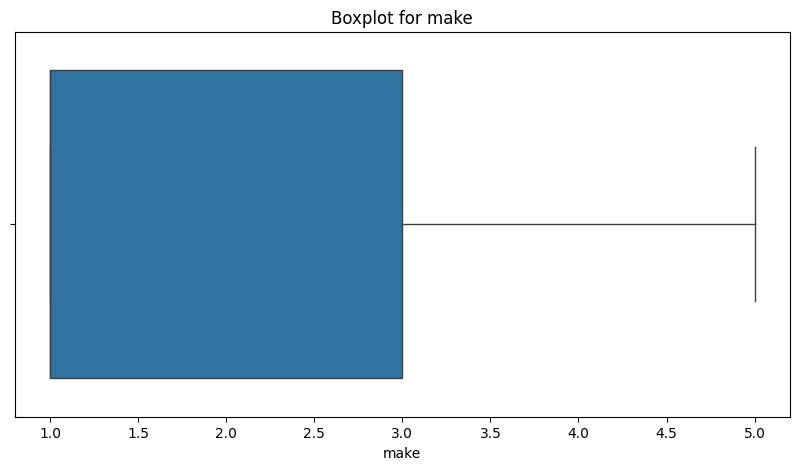

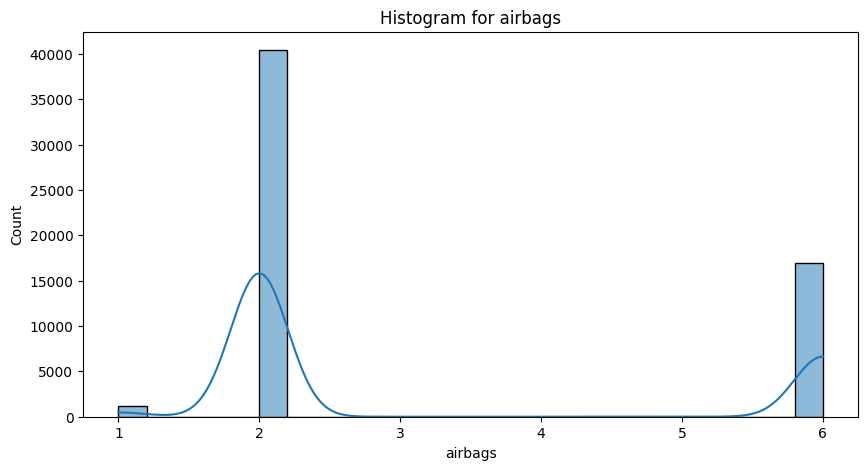

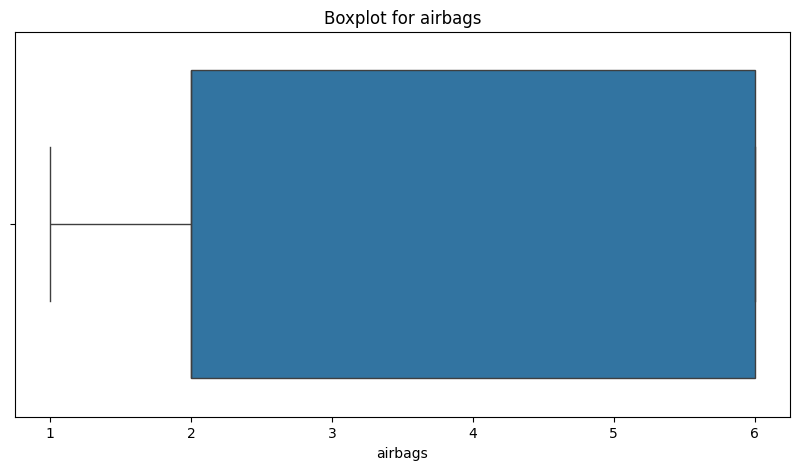

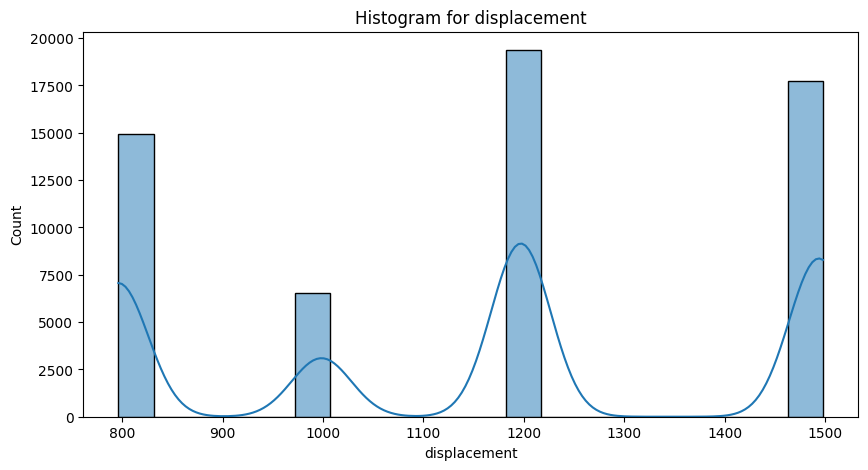

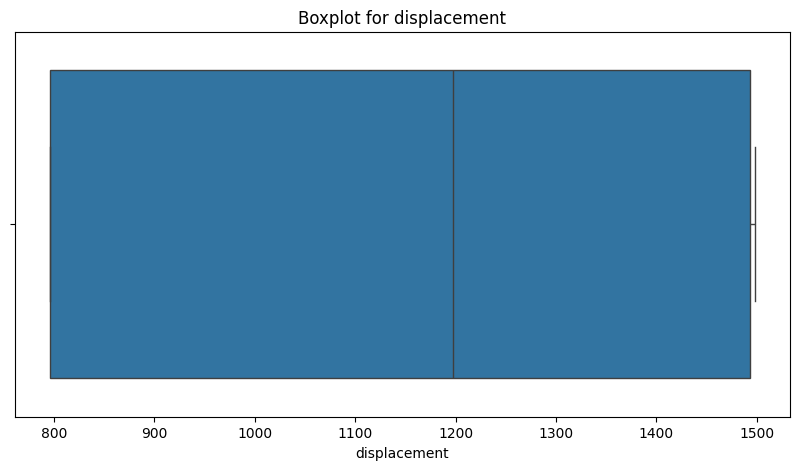

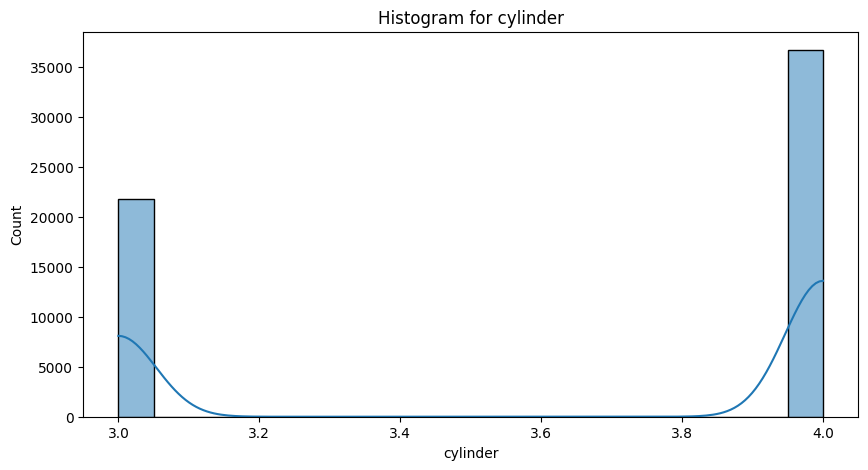

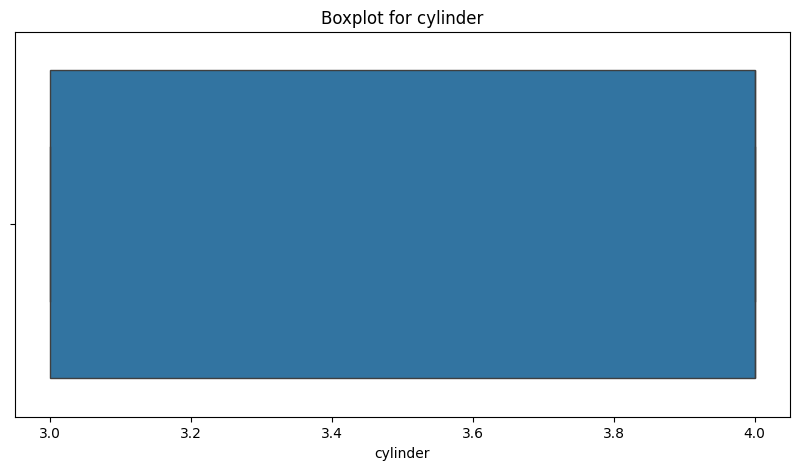

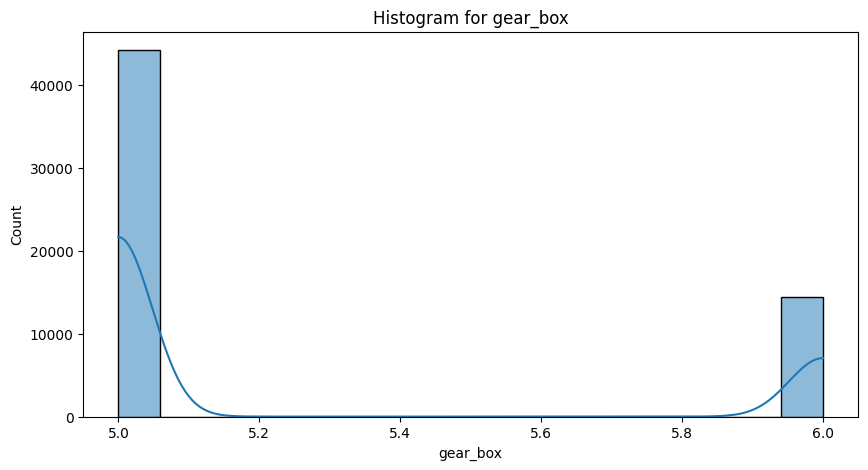

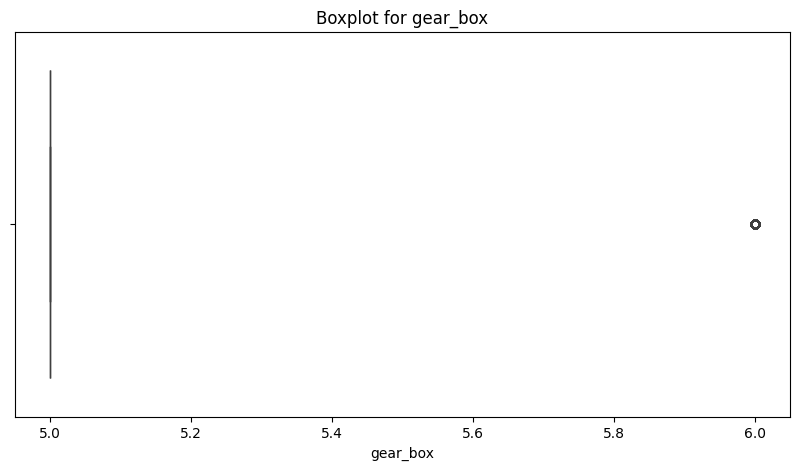

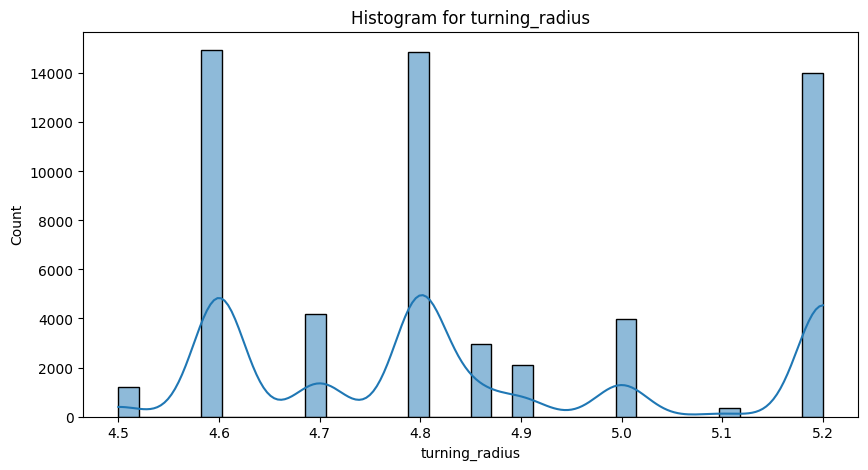

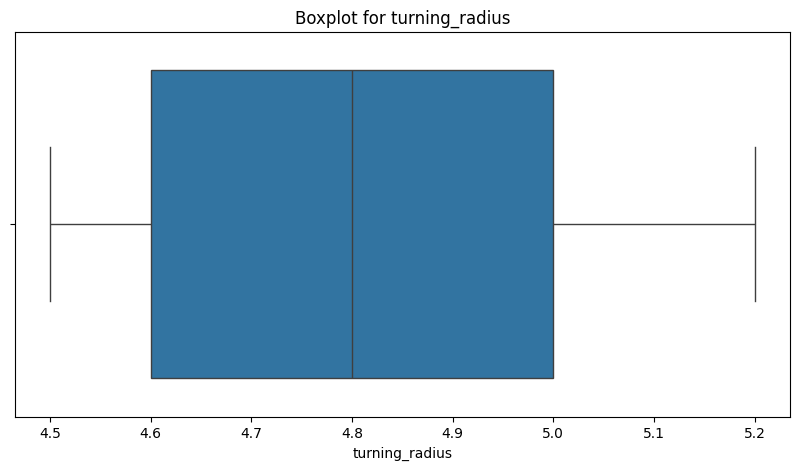

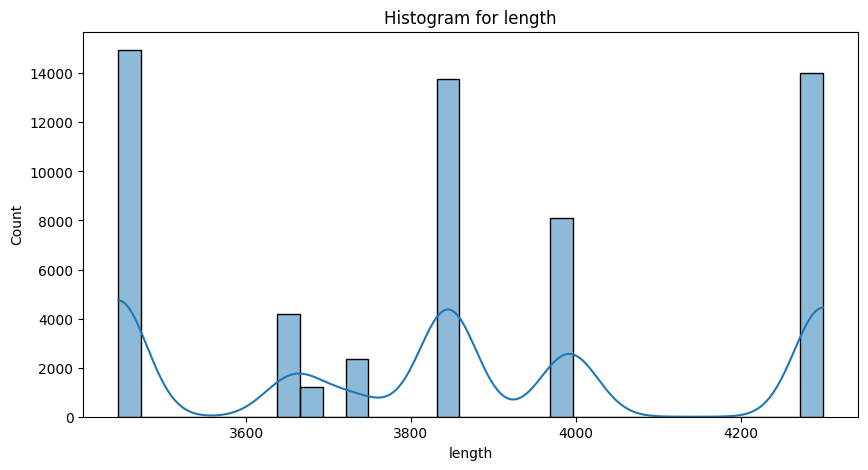

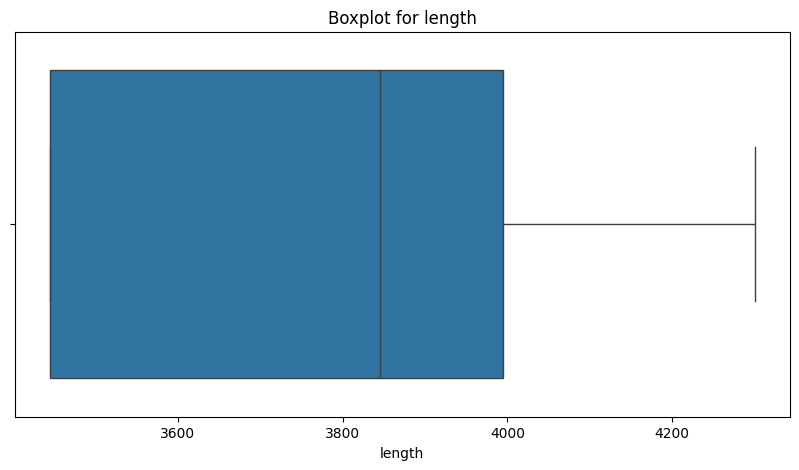

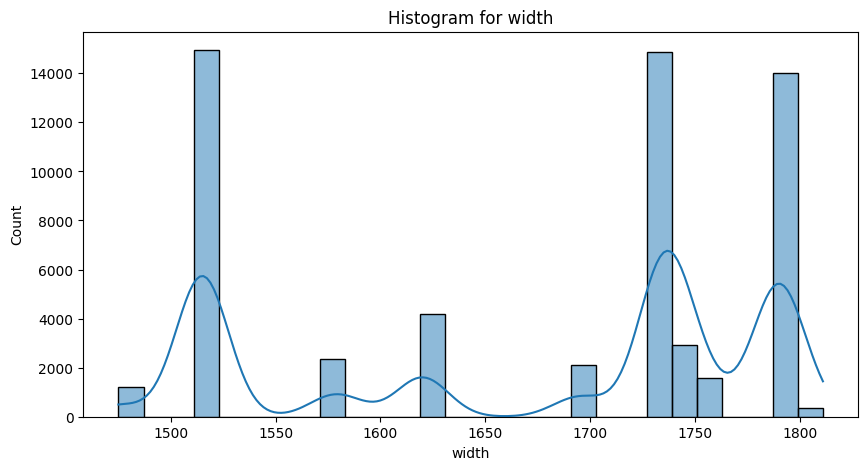

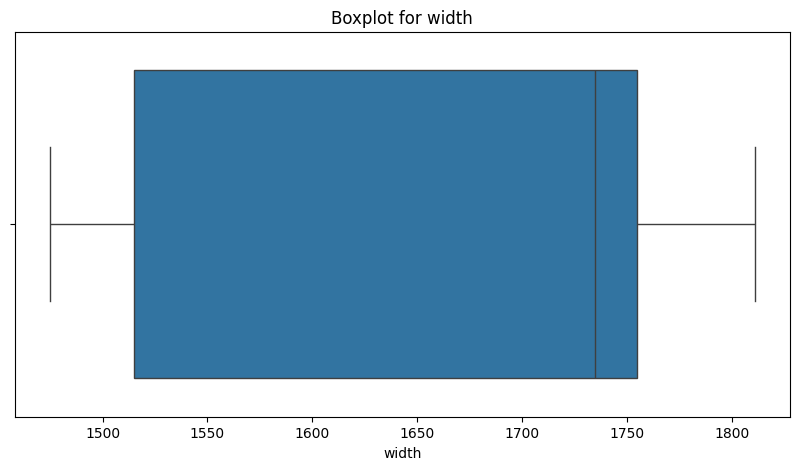

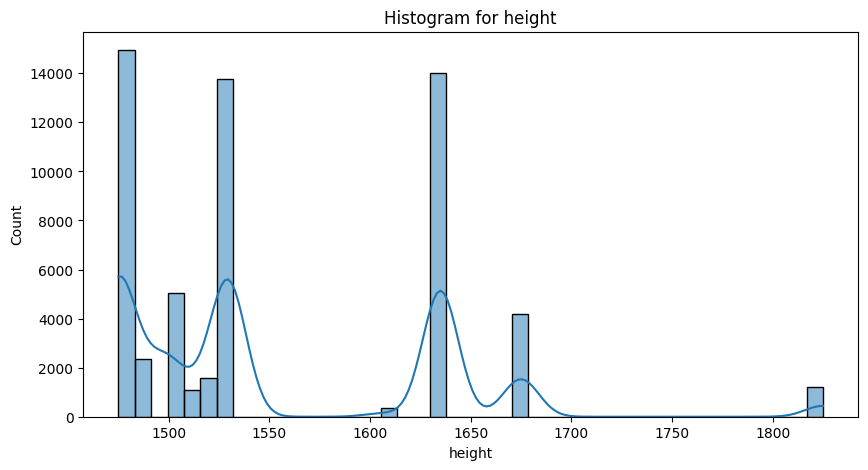

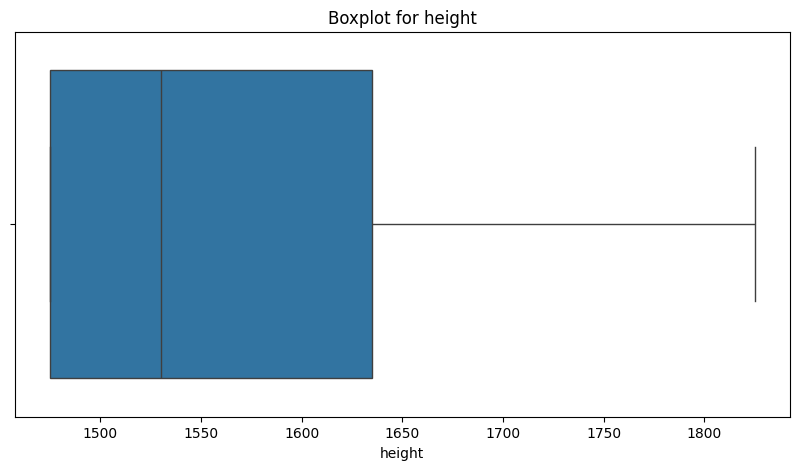

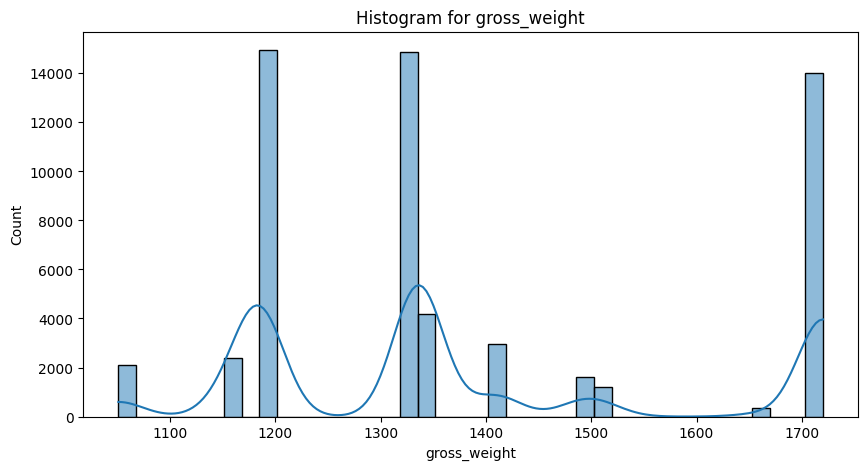

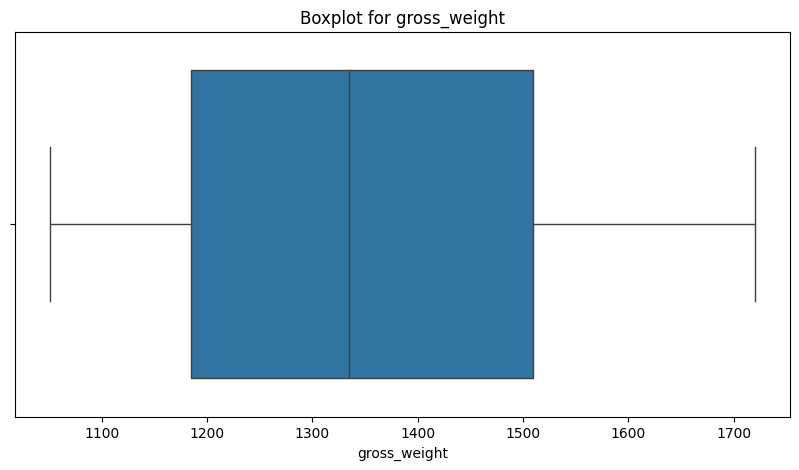

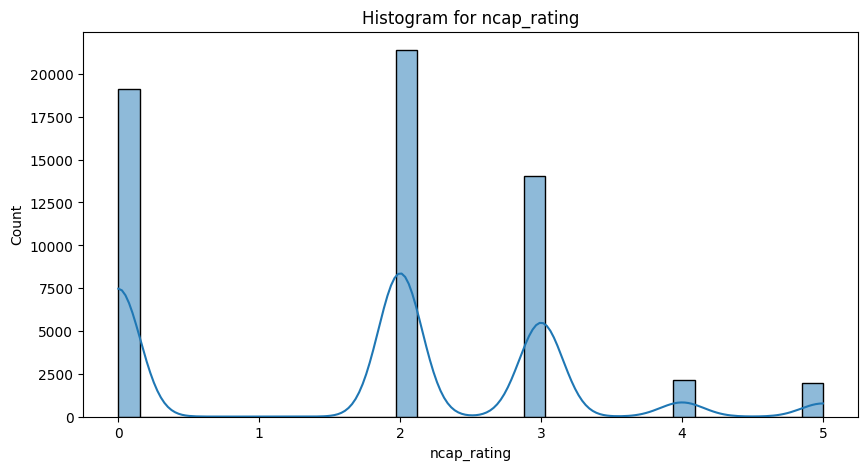

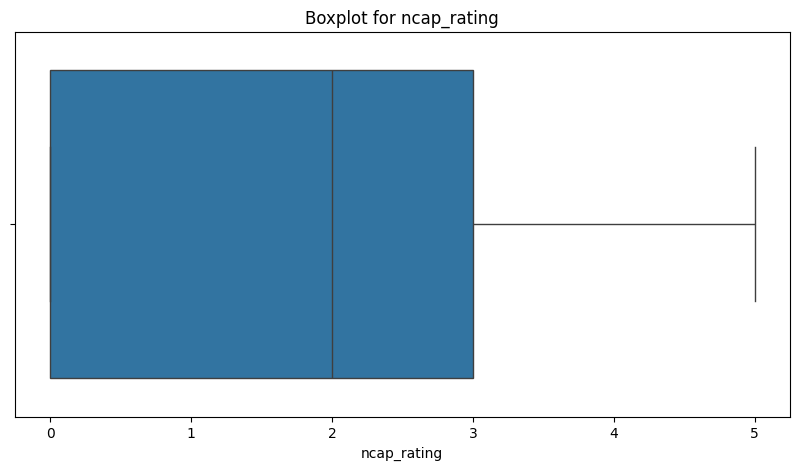

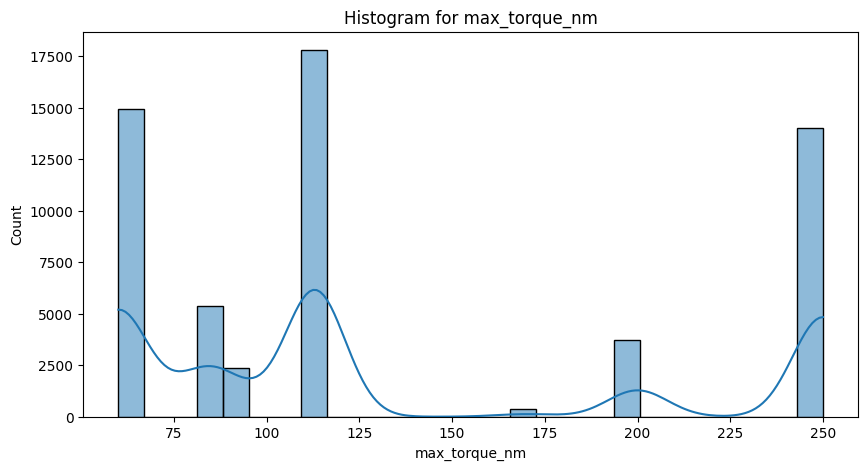

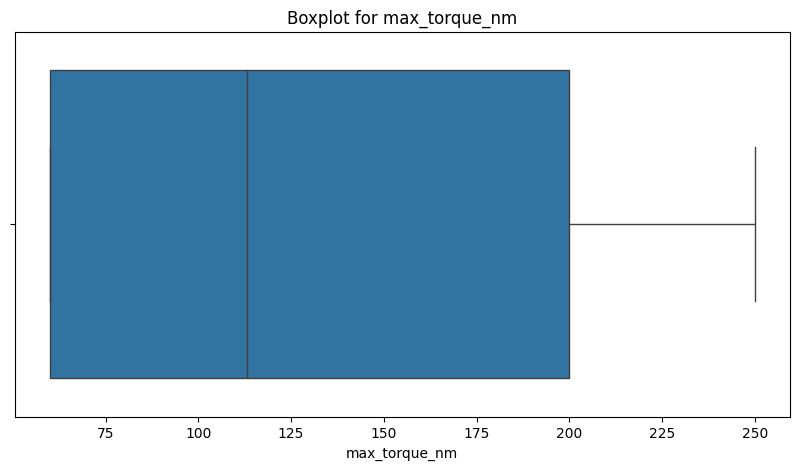

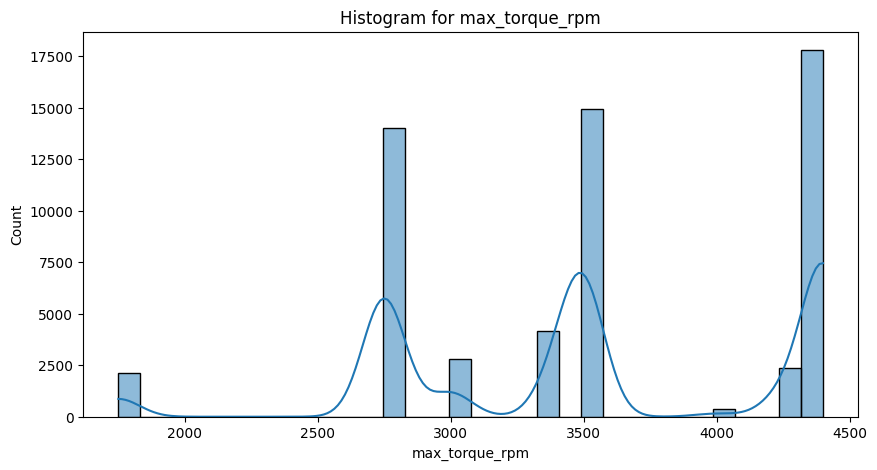

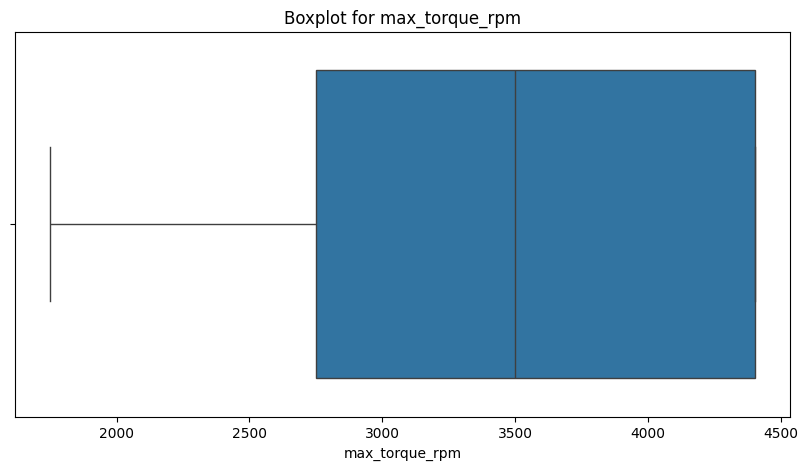

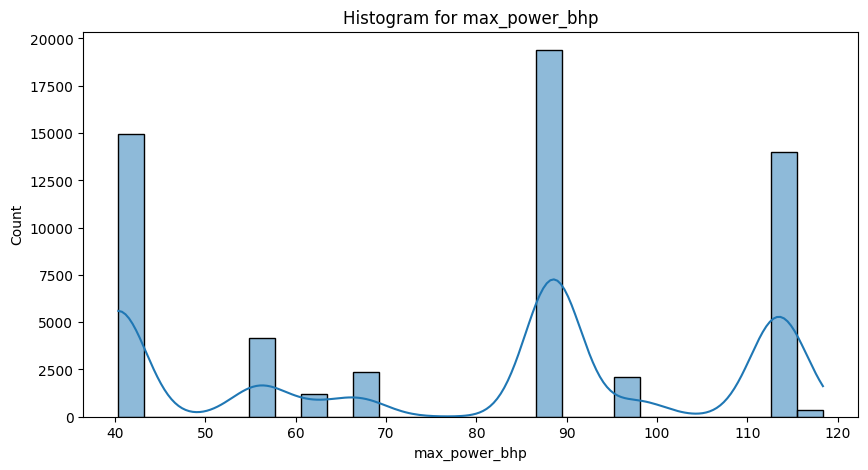

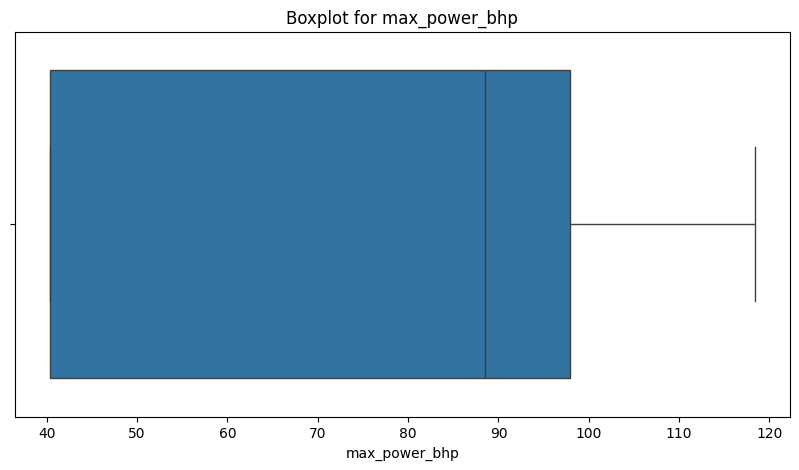

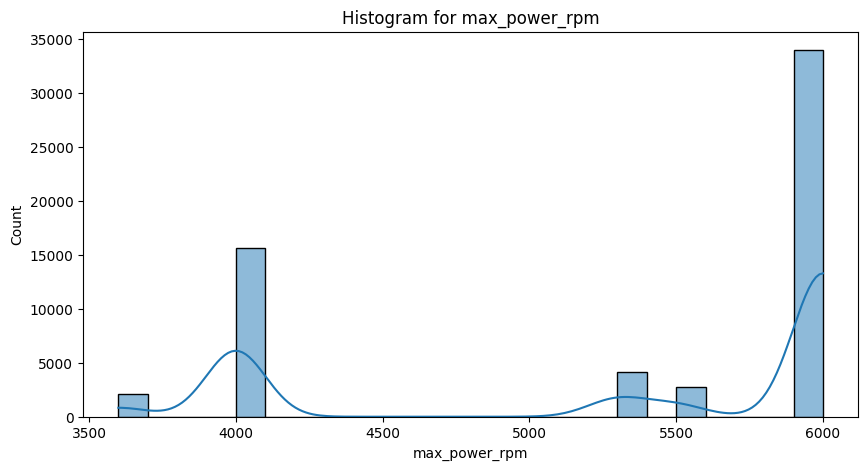

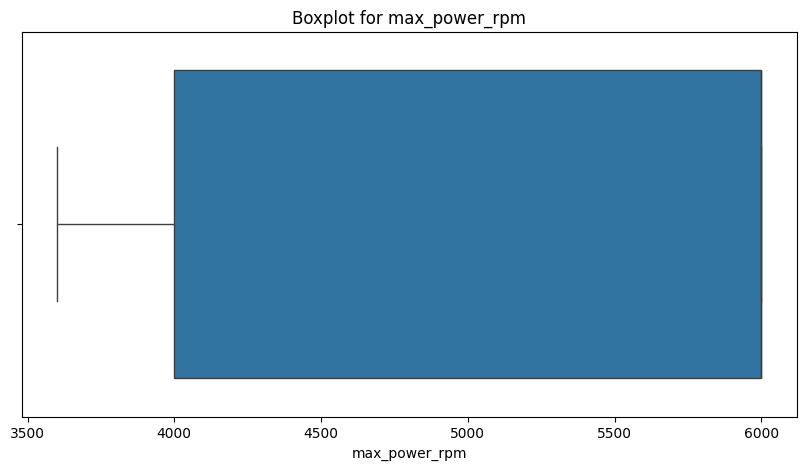

In [25]:
for col in numerical_features:
  plt.figure(figsize=(10,5))
  sns.histplot(x=col,data=X,kde=True)
  plt.title(f"Histogram for {col}")
  plt.show()

  plt.figure(figsize=(10,5))
  sns.boxplot(x=col,data=X)
  plt.title(f"Boxplot for {col}")
  plt.show()


#### Outlier Treatment

In [26]:
numerical_features_df = X[numerical_features]
numerical_features_df.head(3)

policy_tenure  age_of_car  age_of_policyholder  population_density  make  \
0       0.515874        0.05             0.644231                4990     1   
1       0.672619        0.02             0.375000               27003     1   
2       0.841110        0.02             0.384615                4076     1   

   airbags  displacement  cylinder  gear_box  turning_radius  length  width  \
0        2           796         3         5             4.6    3445   1515   
1        2           796         3         5             4.6    3445   1515   
2        2           796         3         5             4.6    3445   1515   

   height  gross_weight  ncap_rating  max_torque_nm  max_torque_rpm  \
0    1475          1185            0           60.0            3500   
1    1475          1185            0           60.0            3500   
2    1475          1185            0           60.0            3500   

   max_power_bhp  max_power_rpm  
0          40.36           6000  
1          40.36           6000  
2          40.36           6000

In [27]:
means = numerical_features_df.mean()
stds = numerical_features_df.std()
z_scores = ((X - means) / stds).abs()

In [28]:

# Set threshold for outlier detection
threshold = 3

# Identify features with outliers based on threshold
outlier_features = z_scores.apply(lambda x: any(x > threshold))

# Print features that have outliers
print("Features that need outlier treatment:")
print(outlier_features[outlier_features].index.tolist())

Features that need outlier treatment:
['age_of_car', 'age_of_policyholder', 'height', 'population_density']


In [29]:
outlier_features_to_treat = outlier_features[outlier_features].index.tolist()
outlier_features_to_treat

['age_of_car', 'age_of_policyholder', 'height', 'population_density']

In [30]:
def treat_outliers(X,col):
  q1 = X[col].quantile(0.25)
  q3 = X[col].quantile(0.75)
  IQR = q3 - q1
  lower_bound = q1 - 1.5 * IQR
  upper_bound = q3 + 1.5 * IQR
  X[col] = data[col].clip(lower =lower_bound,upper = upper_bound)


for col in outlier_features_to_treat:
  treat_outliers(X,col)

In [31]:
X[numerical_features].describe().T

count          mean           std          min  \
policy_tenure        58592.0      0.611246      0.414156     0.002735   
age_of_car           58592.0      0.069129      0.055227     0.000000   
age_of_policyholder  58592.0      0.469279      0.122437     0.288462   
population_density   58592.0  17953.591710  15146.180073   290.000000   
make                 58592.0      1.763722      1.136988     1.000000   
airbags              58592.0      3.137066      1.832641     1.000000   
displacement         58592.0   1162.355851    266.304786   796.000000   
cylinder             58592.0      3.626963      0.483616     3.000000   
gear_box             58592.0      5.245443      0.430353     5.000000   
turning_radius       58592.0      4.852893      0.228061     4.500000   
length               58592.0   3850.476891    311.457119  3445.000000   
width                58592.0   1672.233667    112.089135  1475.000000   
height               58592.0   1553.335370     79.622270  1475.000000   
gross_weight         58592.0   1385.276813    212.423085  1051.000000   
ncap_rating          58592.0      1.759950      1.389576     0.000000   
max_torque_nm        58592.0    134.450937     73.146794    60.000000   
max_torque_rpm       58592.0   3533.176031    725.960661  1750.000000   
max_power_bhp        58592.0     78.976765     27.699259    40.360000   
max_power_rpm        58592.0   5307.163094    916.770819  3600.000000   

                             25%          50%           75%           max  
policy_tenure           0.210250     0.573792      1.039104      1.396641  
age_of_car              0.020000     0.060000      0.110000      0.245000  
age_of_policyholder     0.365385     0.451923      0.548077      0.822115  
population_density   6112.000000  8794.000000  27003.000000  58339.500000  
make                    1.000000     1.000000      3.000000      5.000000  
airbags                 2.000000     2.000000      6.000000      6.000000  
displacement          796.000000  1197.000000   1493.000000   1498.000000  
cylinder                3.000000     4.000000      4.000000      4.000000  
gear_box                5.000000     5.000000      5.000000      6.000000  
turning_radius          4.600000     4.800000      5.000000      5.200000  
length               3445.000000  3845.000000   3995.000000   4300.000000  
width                1515.000000  1735.000000   1755.000000   1811.000000  
height               1475.000000  1530.000000   1635.000000   1825.000000  
gross_weight         1185.000000  1335.000000   1510.000000   1720.000000  
ncap_rating             0.000000     2.000000      3.000000      5.000000  
max_torque_nm          60.000000   113.000000    200.000000    250.000000  
max_torque_rpm       2750.000000  3500.000000   4400.000000   4400.000000  
max_power_bhp          40.360000    88.500000     97.890000    118.360000  
max_power_rpm        4000.000000  6000.000000   6000.000000   6000.000000

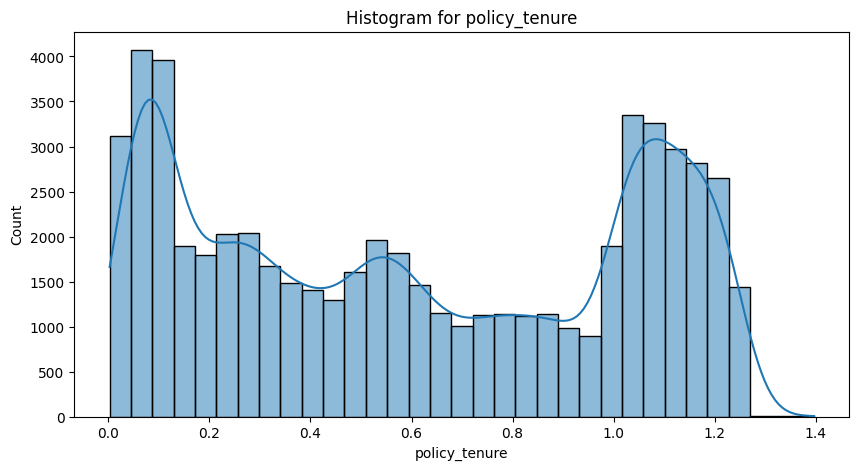

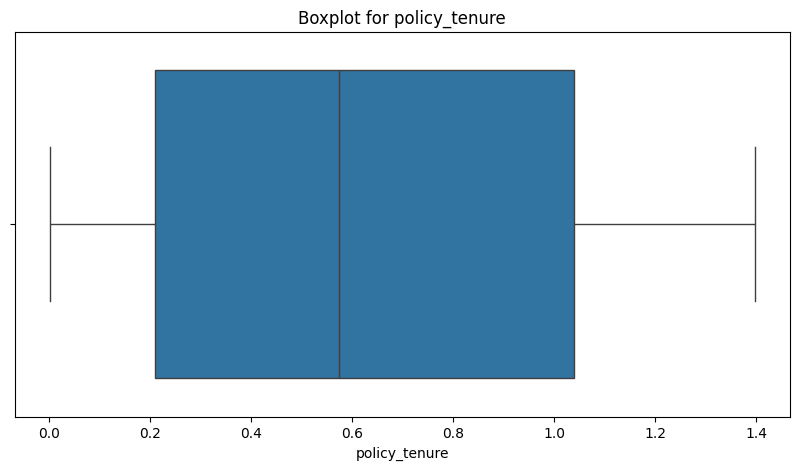

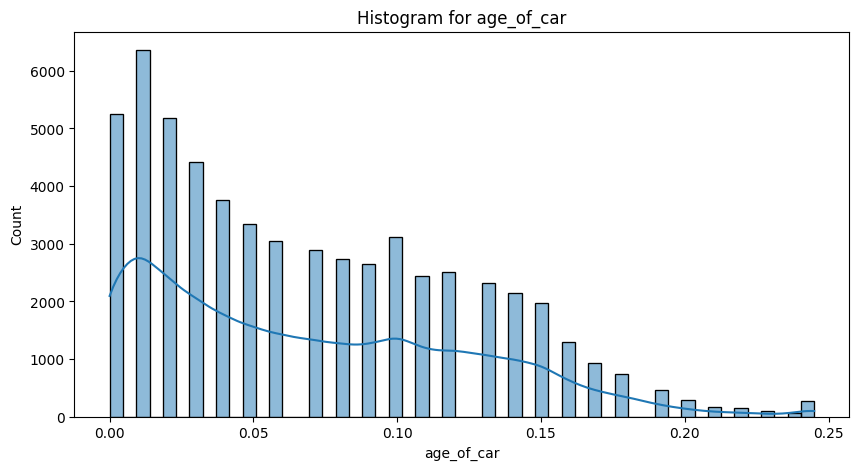

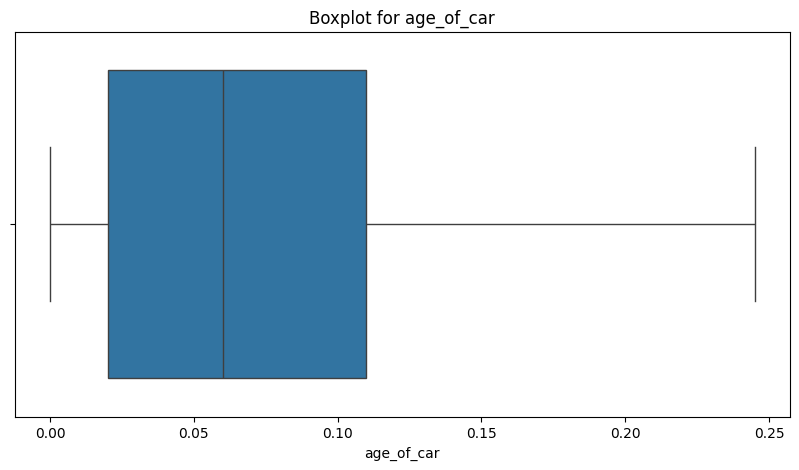

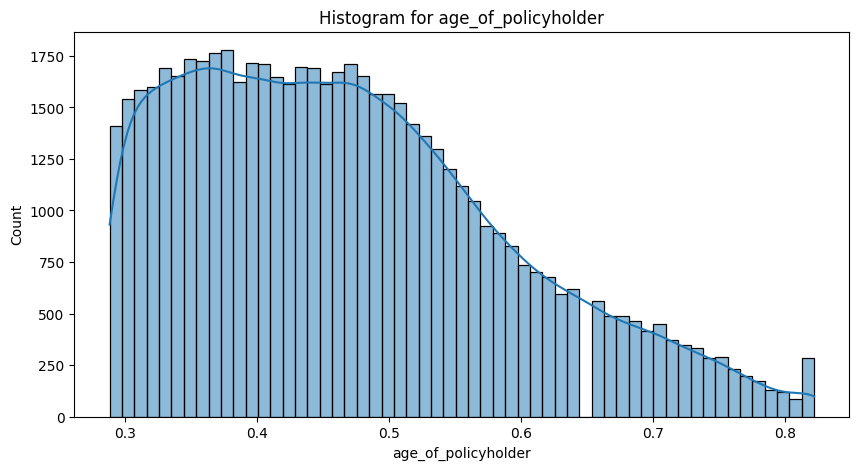

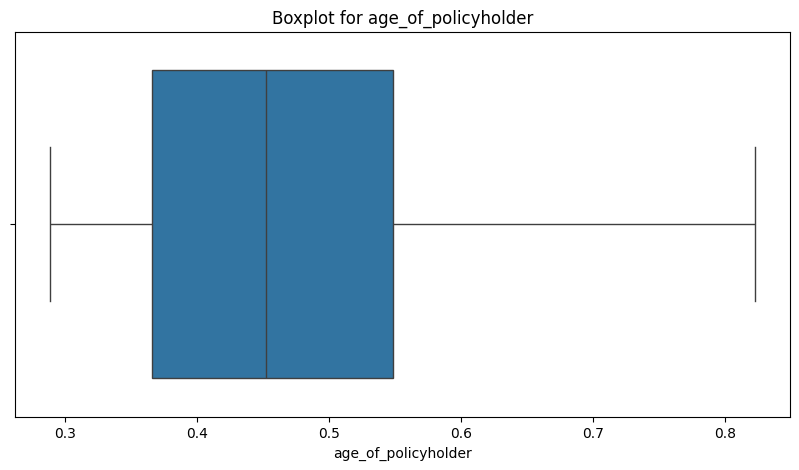

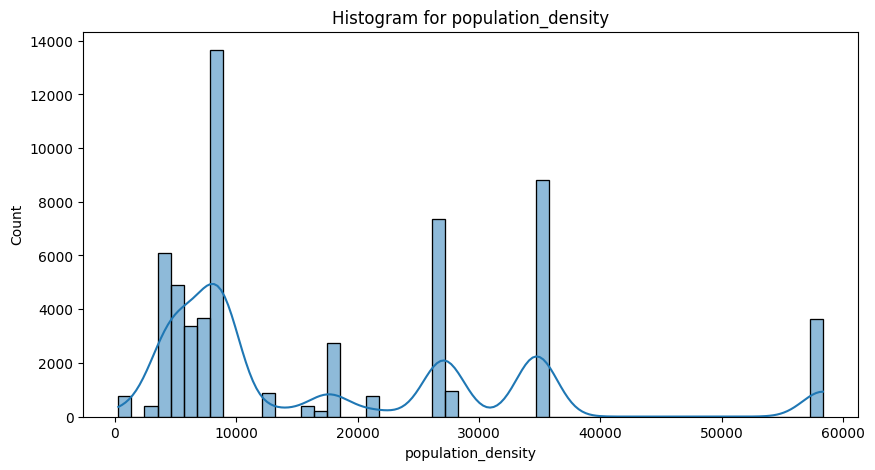

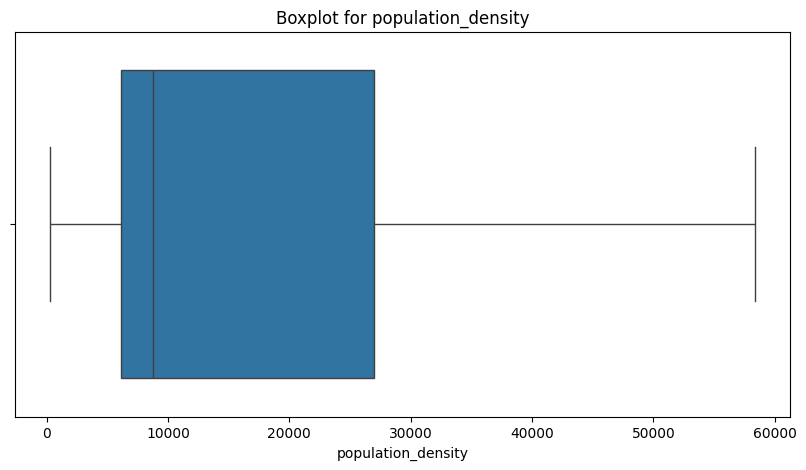

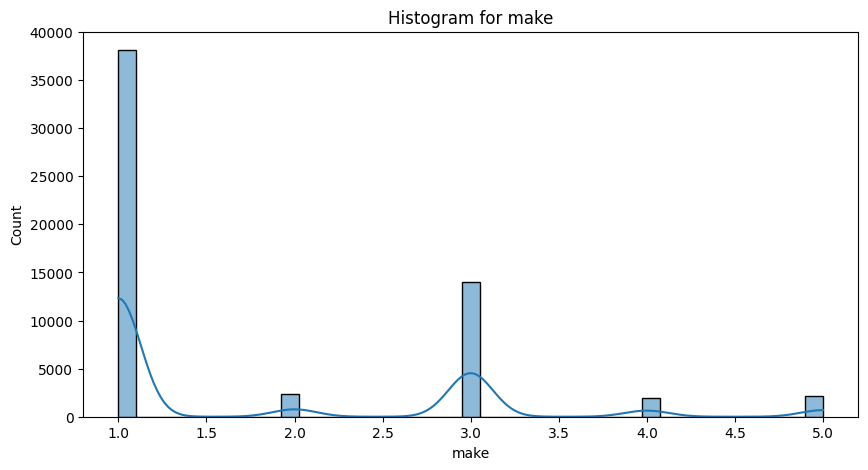

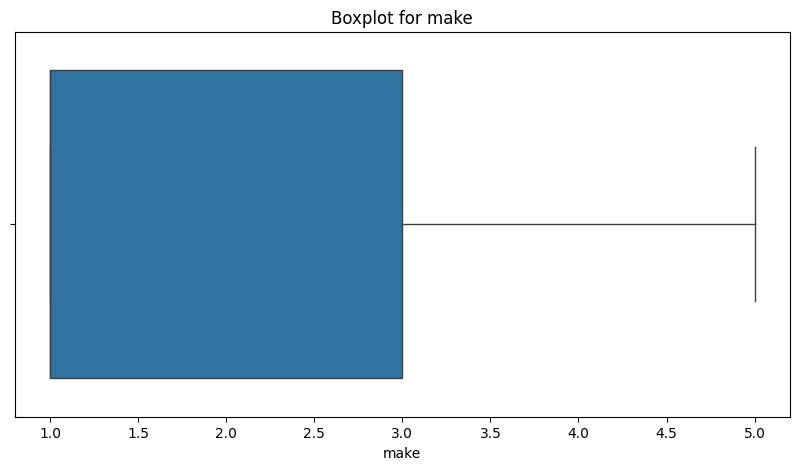

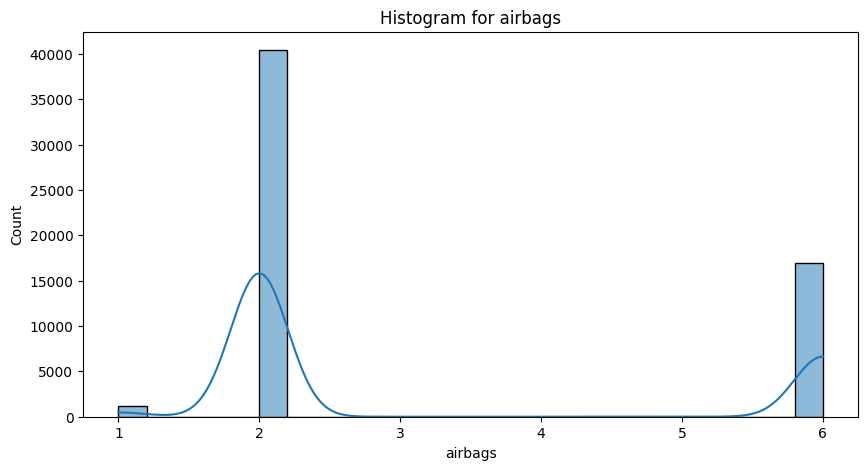

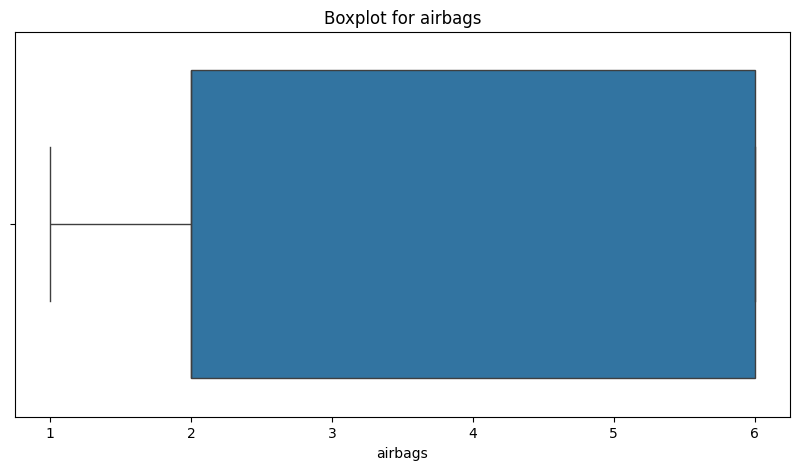

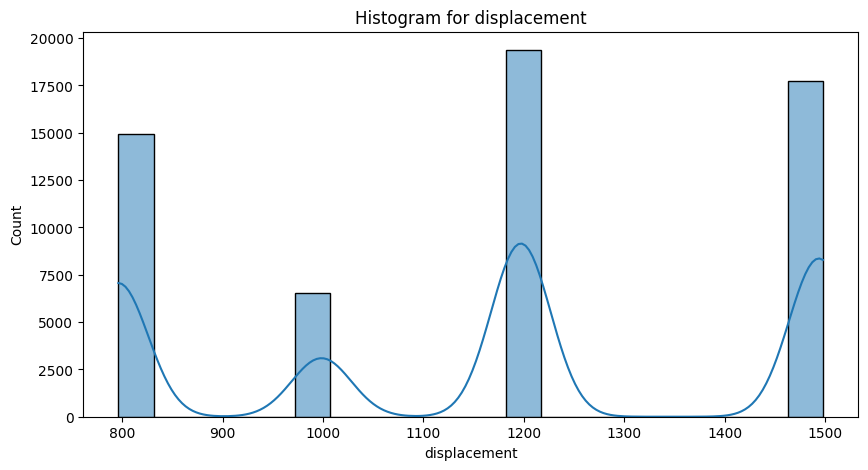

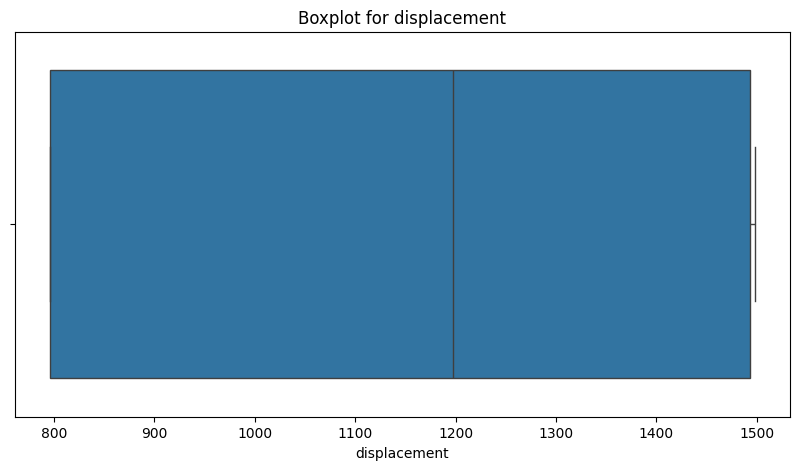

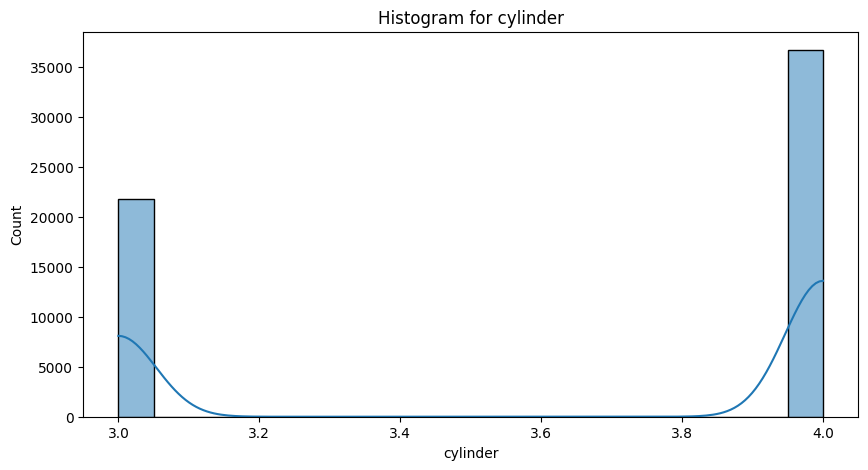

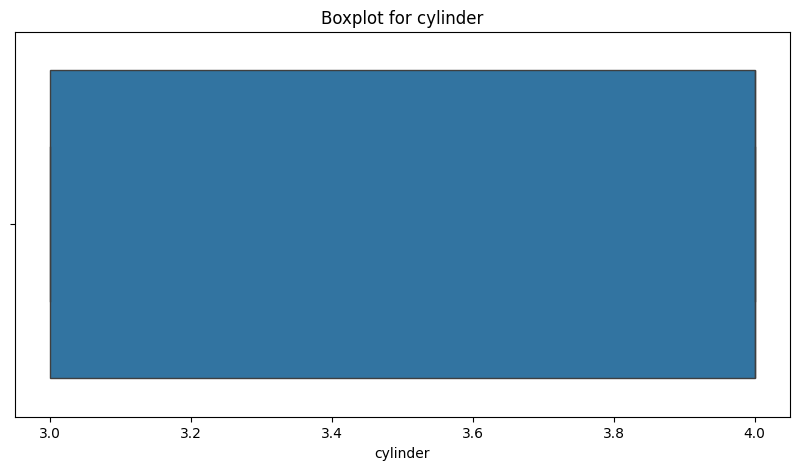

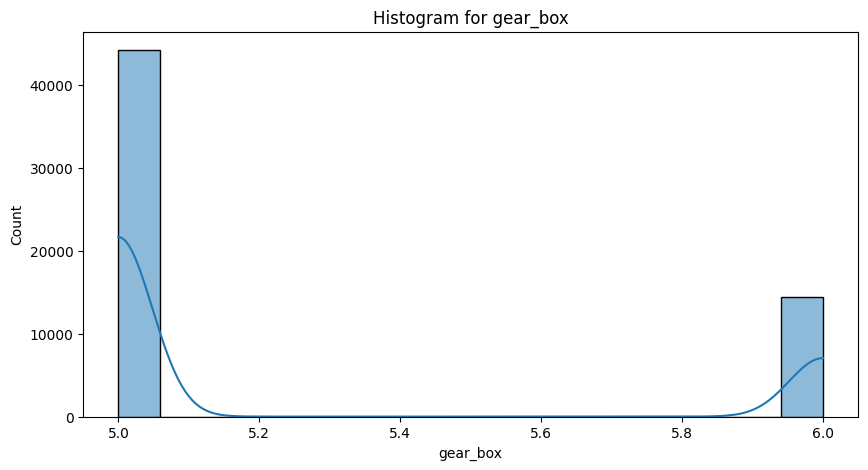

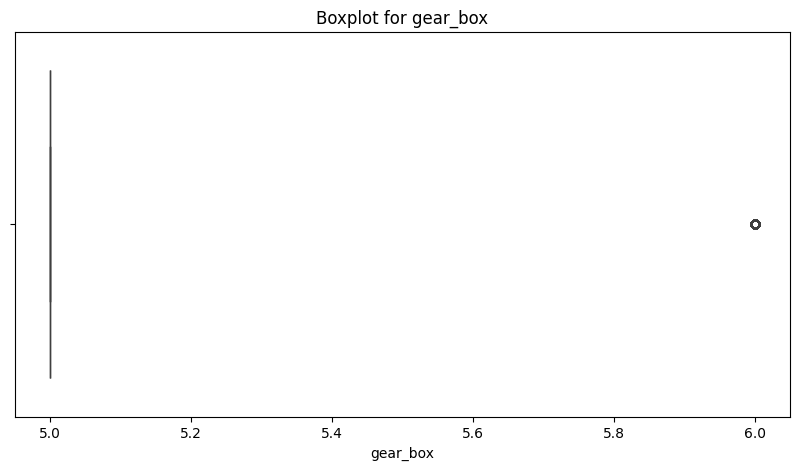

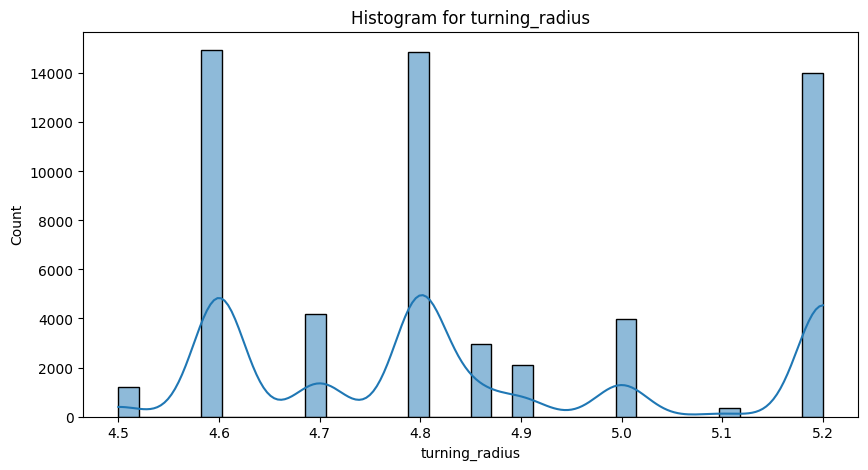

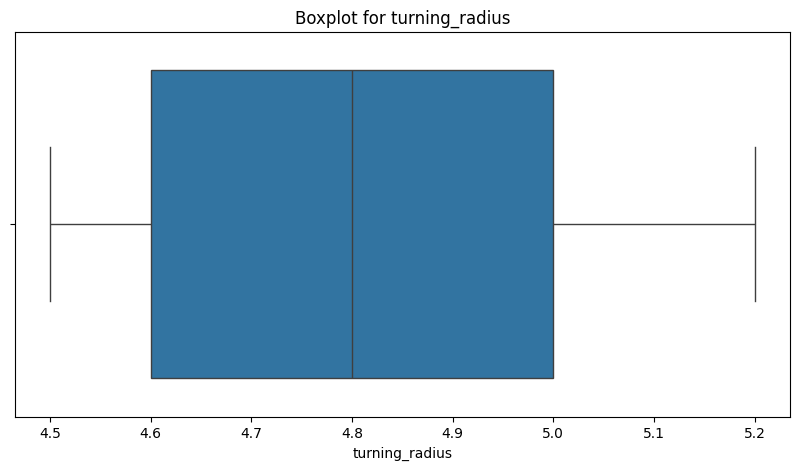

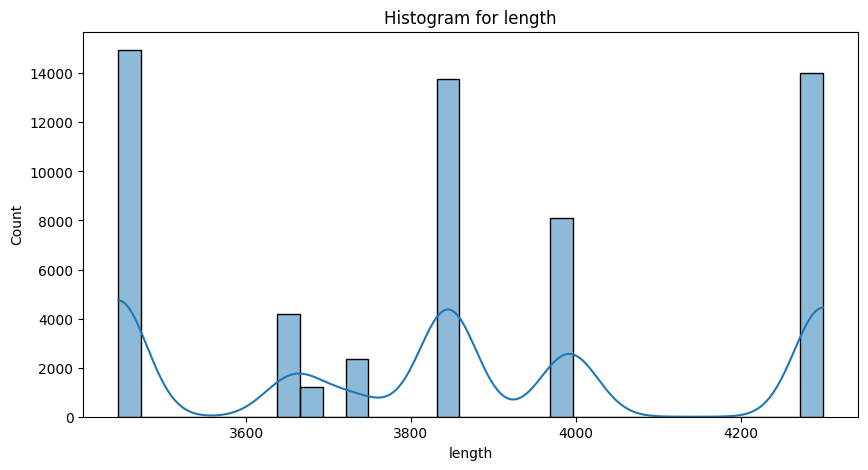

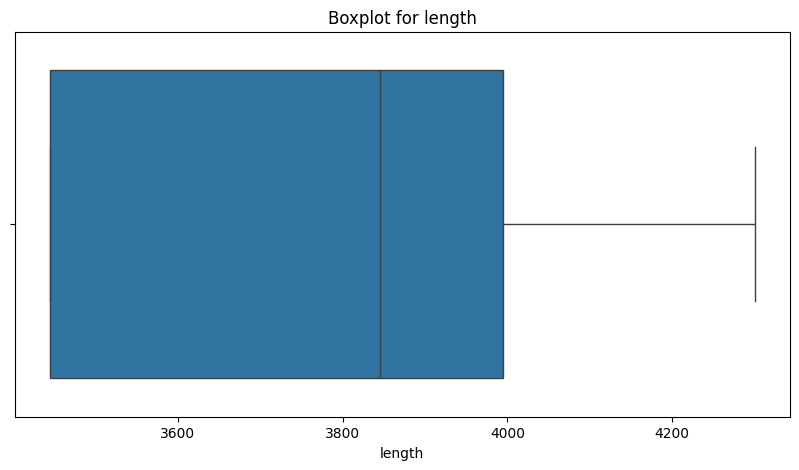

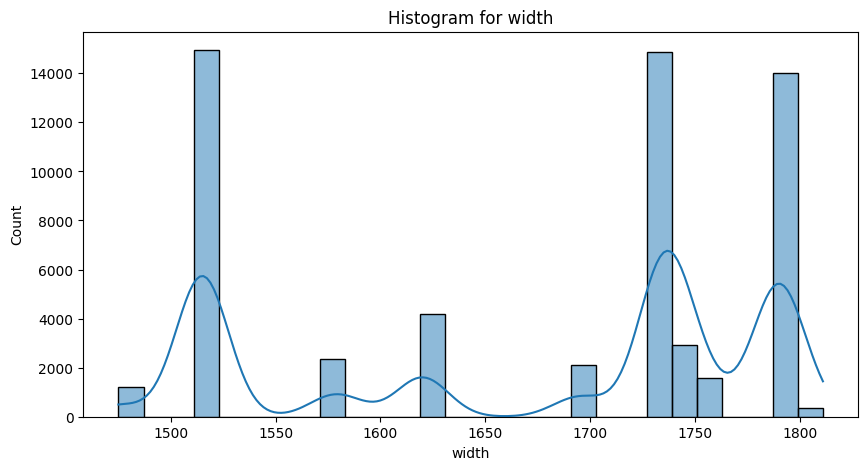

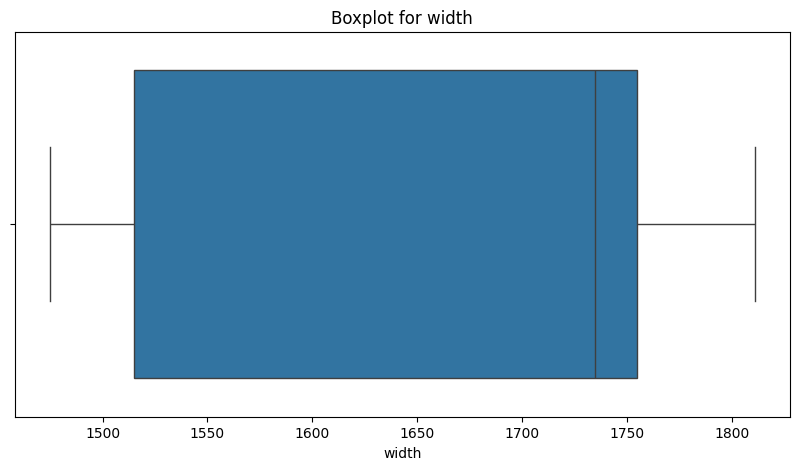

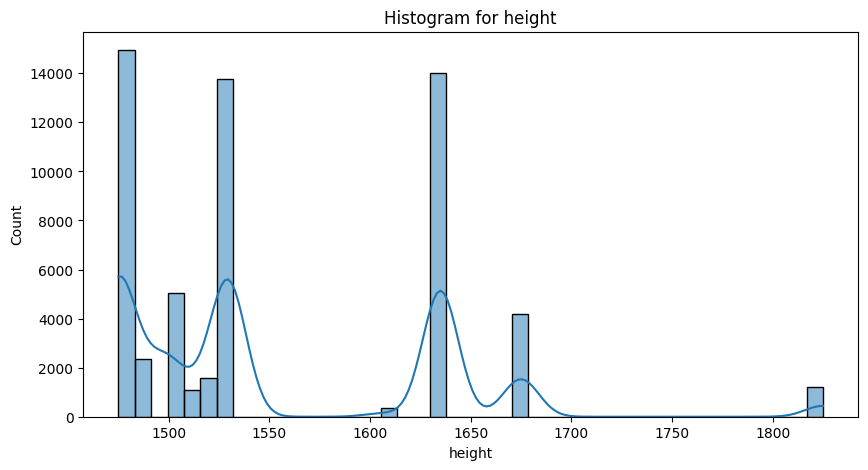

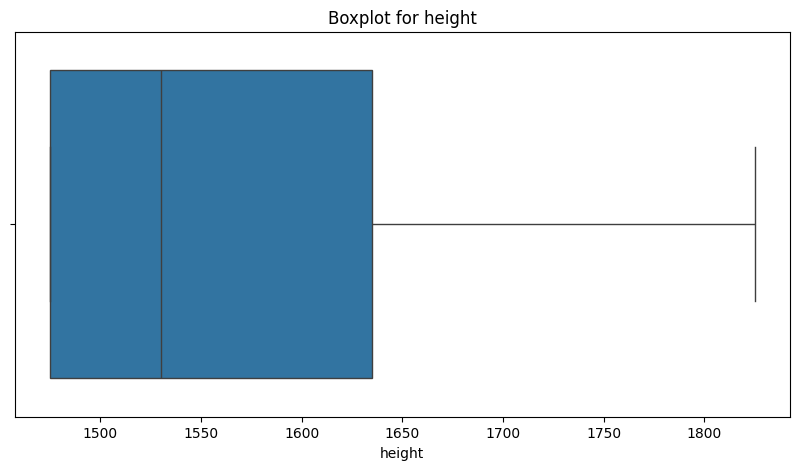

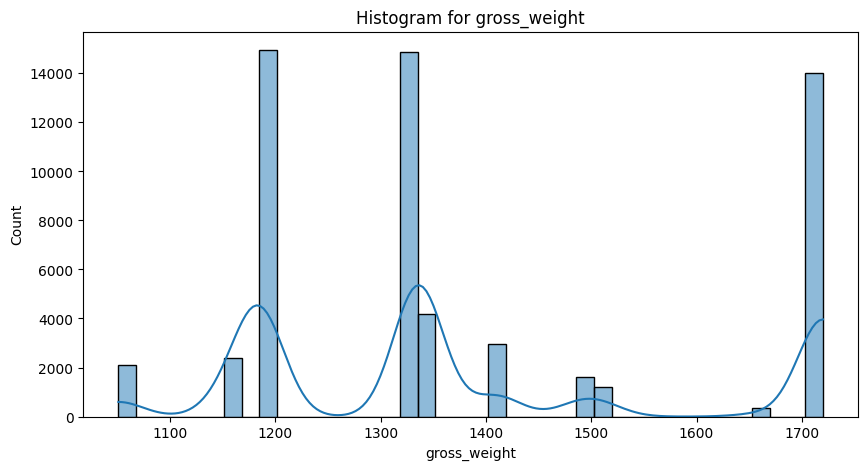

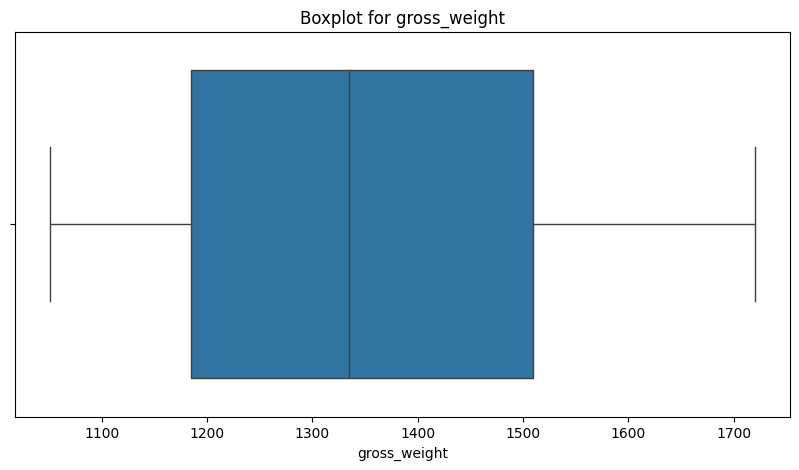

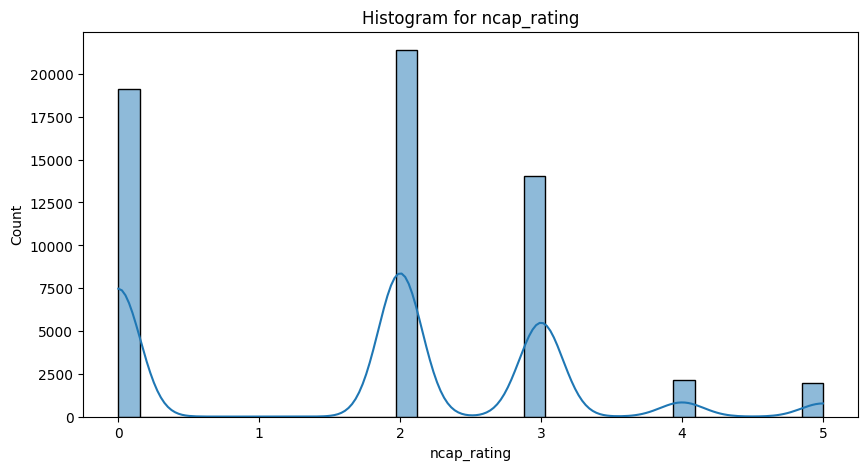

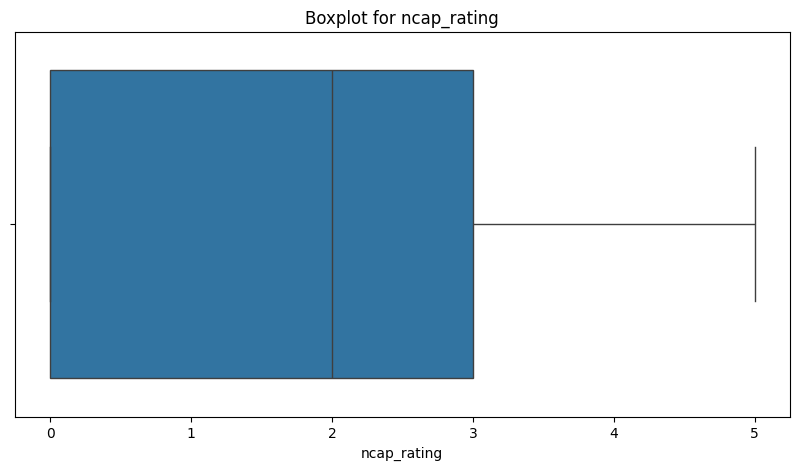

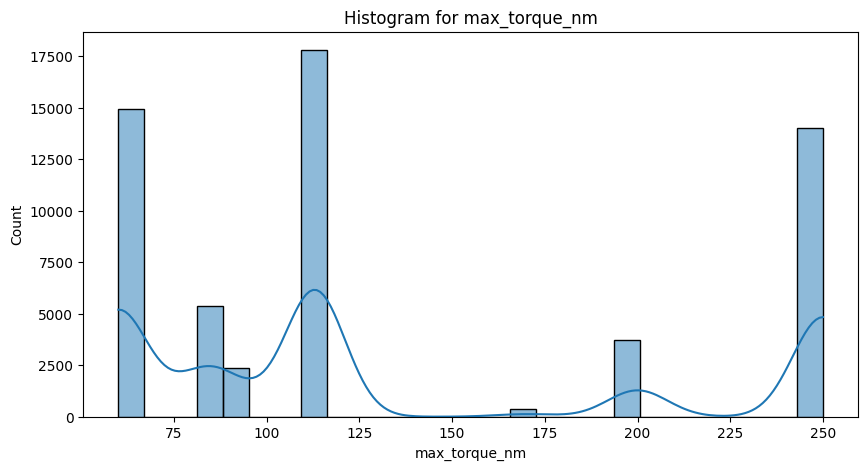

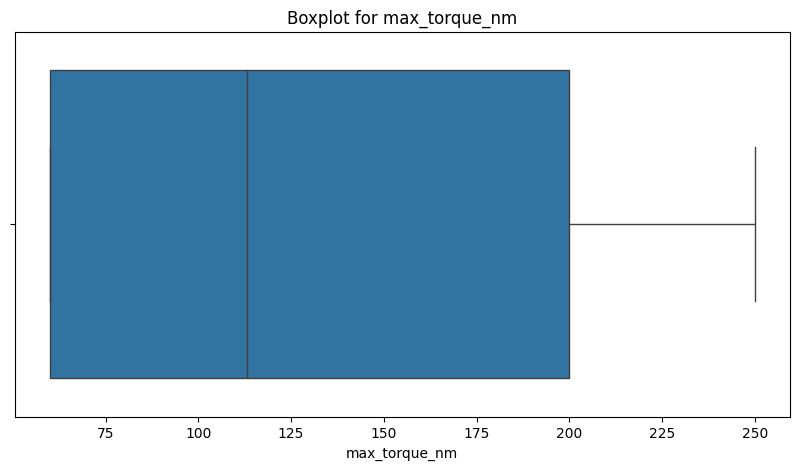

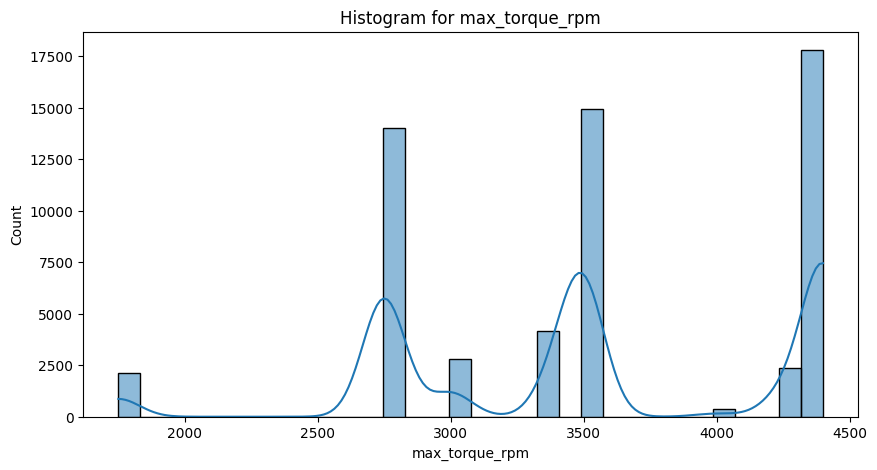

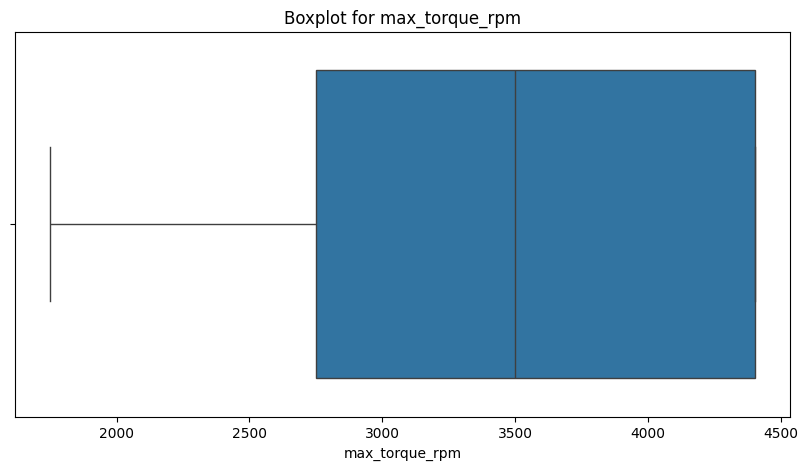

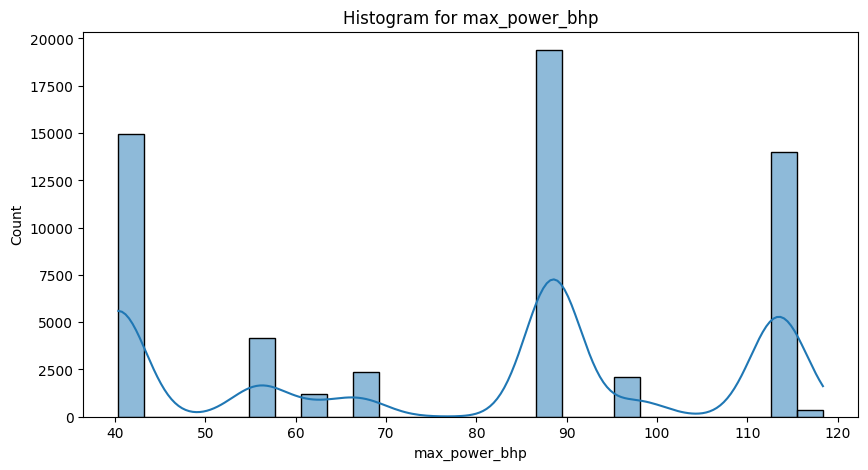

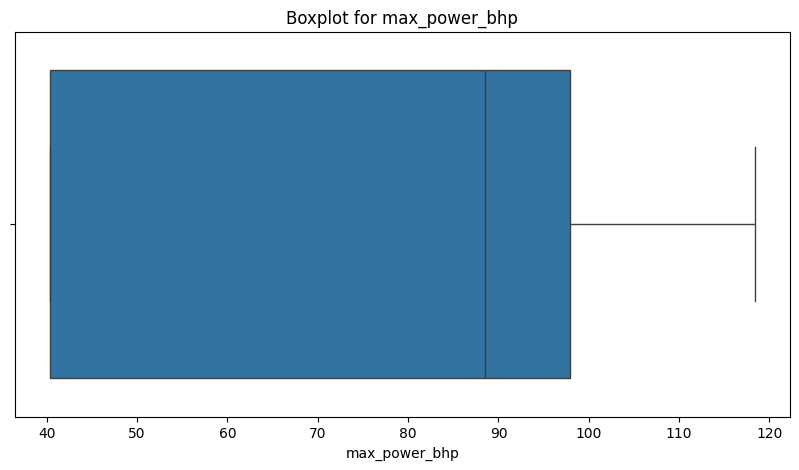

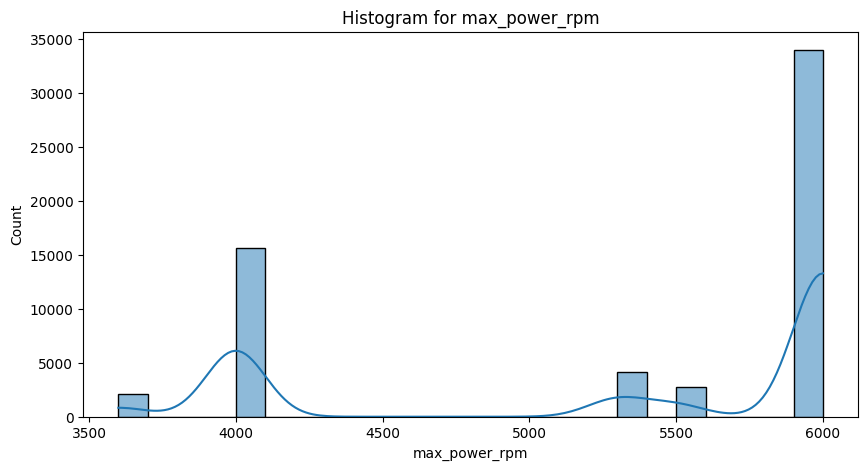

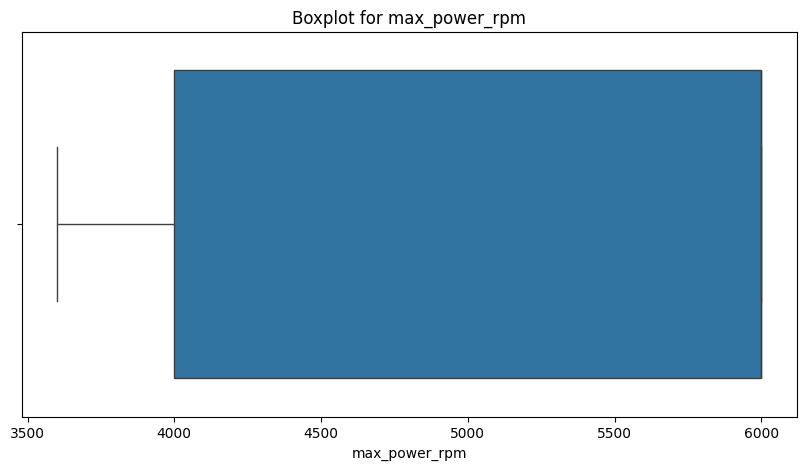

In [32]:
for col in numerical_features:
  plt.figure(figsize=(10,5))
  sns.histplot(x=col,data=X,kde=True)
  plt.title(f"Histogram for {col}")
  plt.show()

  plt.figure(figsize=(10,5))
  sns.boxplot(x=col,data=X)
  plt.title(f"Boxplot for {col}")
  plt.show()


In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  float64
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   engine_type                       58592 non-null  object 
 10  airbags                           58592 non-null  int64  
 11  is_esc                            58592 non-null  object 
 12  is_a

#### pearson correlation analysis on numerical features

In [34]:
correlations = X[numerical_features].apply(lambda x: x.corr(y))

sorted_correlations = correlations.sort_values(ascending=False)


print(sorted_correlations)

policy_tenure          0.078747
age_of_policyholder    0.022318
cylinder               0.013434
width                  0.009947
max_power_bhp          0.007698
displacement           0.007678
length                 0.006495
max_torque_rpm         0.004781
max_torque_nm          0.004294
gross_weight           0.003894
ncap_rating            0.003800
airbags                0.002789
turning_radius         0.002724
max_power_rpm          0.000095
make                  -0.000456
gear_box              -0.000635
height                -0.002024
population_density    -0.016609
age_of_car            -0.028175
dtype: float64


### Chi - Square Analysis

In [35]:
chi2_result = {}

for col in categorical_features:
    contingency_table = pd.crosstab(X[col], y)
    chi2,p,_,_ = chi2_contingency(contingency_table)
    chi2_result[col]= (chi2, p)

print("\nChi-Square Test:")
for key, value in chi2_result.items():
    print(f"{key}: chi2={value[0]:.4f}, p-value={value[1]:.4f}")


Chi-Square Test:
area_cluster: chi2=96.0826, p-value=0.0000
segment: chi2=12.6039, p-value=0.0274
model: chi2=19.9750, p-value=0.0295
fuel_type: chi2=5.7596, p-value=0.0561
engine_type: chi2=19.9750, p-value=0.0295
is_esc: chi2=0.4995, p-value=0.4797
is_adjustable_steering: chi2=11.2315, p-value=0.0008
is_tpms: chi2=0.0226, p-value=0.8805
is_parking_sensors: chi2=3.9806, p-value=0.0460
is_parking_camera: chi2=0.0375, p-value=0.8465
rear_brakes_type: chi2=0.0226, p-value=0.8805
transmission_type: chi2=0.0186, p-value=0.8914
steering_type: chi2=5.7361, p-value=0.0568
is_front_fog_lights: chi2=8.0951, p-value=0.0044
is_rear_window_wiper: chi2=0.3881, p-value=0.5333
is_rear_window_washer: chi2=0.3881, p-value=0.5333
is_rear_window_defogger: chi2=0.3706, p-value=0.5427
is_brake_assist: chi2=6.8632, p-value=0.0088
is_power_door_locks: chi2=2.5210, p-value=0.1123
is_central_locking: chi2=2.5210, p-value=0.1123
is_power_steering: chi2=0.2077, p-value=0.6486
is_driver_seat_height_adjustable: c

In [36]:
significant_categorical_features = [
    feature for feature, p_value in chi2_result.items() if p_value[1] < 0.05]
significant_categorical_features


['area_cluster',
 'segment',
 'model',
 'engine_type',
 'is_adjustable_steering',
 'is_parking_sensors',
 'is_front_fog_lights',
 'is_brake_assist',
 'is_driver_seat_height_adjustable']

### Anova Test

In [37]:
anova_results = {}
for col in numerical_features:
    groups = [y[X[col] == value] for value in X[col].unique()]
    f_val, p_val = f_oneway(*groups)
    anova_results[col] = (f_val, p_val)
print("\nANOVA Test:")
for key, value in anova_results.items():
    print(f"{key}: F = {value[0]:.4f}, p-value = {value[1]:.4f}")


ANOVA Test:
policy_tenure: F = nan, p-value = nan
age_of_car: F = 9.9150, p-value = 0.0000
age_of_policyholder: F = 1.5483, p-value = 0.0053
population_density: F = 4.7858, p-value = 0.0000
make: F = 1.1060, p-value = 0.3517
airbags: F = 0.3105, p-value = 0.7331
displacement: F = 2.4240, p-value = 0.0129
cylinder: F = 10.5751, p-value = 0.0011
gear_box: F = 0.0237, p-value = 0.8778
turning_radius: F = 1.7305, p-value = 0.0860
length: F = 2.2728, p-value = 0.0199
width: F = 2.1548, p-value = 0.0221
height: F = 1.9978, p-value = 0.0295
gross_weight: F = 2.1548, p-value = 0.0221
ncap_rating: F = 0.3666, p-value = 0.8325
max_torque_nm: F = 2.5669, p-value = 0.0121
max_torque_rpm: F = 2.5253, p-value = 0.0135
max_power_bhp: F = 2.4240, p-value = 0.0129
max_power_rpm: F = 2.3761, p-value = 0.0497


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4141: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))


In [38]:
significant_numerical_features = [
    feature for feature, p_value in anova_results.items() if p_value[1] < 0.05]
significant_numerical_features


['age_of_car',
 'age_of_policyholder',
 'population_density',
 'displacement',
 'cylinder',
 'length',
 'width',
 'height',
 'gross_weight',
 'max_torque_nm',
 'max_torque_rpm',
 'max_power_bhp',
 'max_power_rpm']

### Encoding

Evaluating which encoding method is best

In [39]:
categorical_features = list(X.select_dtypes(include=["object"]).columns)
numerical_features = list(X.select_dtypes(exclude=["object"]).columns)
print("The categorical features are : ",categorical_features)
print("The Number of categorical features are ",len(categorical_features))
print()
print("The numerical features are : ",numerical_features)
print("The Number of numerical features are ",len(numerical_features))

The categorical features are :  ['area_cluster', 'segment', 'model', 'fuel_type', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']
The Number of categorical features are  25

The numerical features are :  ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'make', 'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'max_torque_nm', 'max_torque_rpm', 'max_power_bhp', 'max_power_rpm']
The Number of numerical features are  19


In [40]:
# One hot encoding
X_ohe = pd.get_dummies(X[categorical_features], drop_first=True)

# Label encoding
X_le = X[categorical_features].apply(LabelEncoder().fit_transform)


rf_ohe = RandomForestClassifier(random_state=42)
rf_le = RandomForestClassifier(random_state=42)

In [41]:

scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted'),
    'roc_auc': make_scorer(roc_auc_score)
}


In [42]:
# Cross-validation with one hot encoding
cv_ohe = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results_ohe = cross_validate(rf_ohe, X_ohe, y, cv=cv_ohe, scoring=scoring)

# Cross-validation with label encoding
cv_le = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results_le = cross_validate(rf_le, X_le, y, cv=cv_le, scoring=scoring)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

In [43]:
# Printing the results
print("Cross-validation results with One Hot Encoding:")
print(f"Mean Accuracy: {cv_results_ohe['test_accuracy'].mean():.4f}")
print(f"Mean Precision: {cv_results_ohe['test_precision'].mean():.4f}")
print(f"Mean Recall: {cv_results_ohe['test_recall'].mean():.4f}")
print(f"Mean F1-score: {cv_results_ohe['test_f1_score'].mean():.4f}")
print(f"Mean ROC AUC: {cv_results_ohe['test_roc_auc'].mean():.4f}")

print("\nCross-validation results with Label Encoding:")
print(f"Mean Accuracy: {cv_results_le['test_accuracy'].mean():.4f}")
print(f"Mean Precision: {cv_results_le['test_precision'].mean():.4f}")
print(f"Mean Recall: {cv_results_le['test_recall'].mean():.4f}")
print(f"Mean F1-score: {cv_results_le['test_f1_score'].mean():.4f}")
print(f"Mean ROC AUC: {cv_results_le['test_roc_auc'].mean():.4f}")

Cross-validation results with One Hot Encoding:
Mean Accuracy: 0.9359
Mean Precision: 0.8762
Mean Recall: 0.9359
Mean F1-score: 0.9051
Mean ROC AUC: 0.4999

Cross-validation results with Label Encoding:
Mean Accuracy: 0.9359
Mean Precision: 0.8762
Mean Recall: 0.9359
Mean F1-score: 0.9051
Mean ROC AUC: 0.4999


#### Applying one hot encoding technique for Categorical features in the original data

In [44]:
categorical_features = list(X.select_dtypes(include=["object"]).columns)
numerical_features = list(X.select_dtypes(exclude=["object"]).columns)
print("The categorical features are : ",categorical_features)
print("The Number of categorical features are ",len(categorical_features))
print()
print("The numerical features are : ",numerical_features)
print("The Number of numerical features are ",len(numerical_features))

The categorical features are :  ['area_cluster', 'segment', 'model', 'fuel_type', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']
The Number of categorical features are  25

The numerical features are :  ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'make', 'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'max_torque_nm', 'max_torque_rpm', 'max_power_bhp', 'max_power_rpm']
The Number of numerical features are  19


In [45]:
X= pd.get_dummies(X,columns=categorical_features,drop_first=True,dtype=float)
X.head()

policy_tenure  age_of_car  age_of_policyholder  population_density  make  \
0       0.515874        0.05             0.644231              4990.0     1   
1       0.672619        0.02             0.375000             27003.0     1   
2       0.841110        0.02             0.384615              4076.0     1   
3       0.900277        0.11             0.432692             21622.0     1   
4       0.596403        0.11             0.634615             34738.0     2   

   airbags  displacement  cylinder  gear_box  turning_radius  length  width  \
0        2           796         3         5             4.6    3445   1515   
1        2           796         3         5             4.6    3445   1515   
2        2           796         3         5             4.6    3445   1515   
3        2          1197         4         5             4.8    3995   1735   
4        2           999         3         5             5.0    3731   1579   

   height  gross_weight  ncap_rating  max_torque_nm  max_torque_rpm  \
0    1475          1185            0           60.0            3500   
1    1475          1185            0           60.0            3500   
2    1475          1185            0           60.0            3500   
3    1515          1335            2          113.0            4400   
4    1490          1155            2           91.0            4250   

   max_power_bhp  max_power_rpm  area_cluster_C10  area_cluster_C11  \
0          40.36           6000               0.0               0.0   
1          40.36           6000               0.0               0.0   
2          40.36           6000               0.0               0.0   
3          88.50           6000               0.0               0.0   
4          67.06           5500               0.0               0.0   

   area_cluster_C12  area_cluster_C13  area_cluster_C14  area_cluster_C15  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   area_cluster_C16  area_cluster_C17  area_cluster_C18  area_cluster_C19  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   area_cluster_C2  area_cluster_C20  area_cluster_C21  area_cluster_C22  \
0              0.0               0.0               0.0               0.0   
1              1.0               0.0               0.0               0.0   
2              0.0               0.0               0.0               0.0   
3              0.0               0.0               0.0               0.0   
4              0.0               0.0               0.0               0.0   

   area_cluster_C3  area_cluster_C4  area_cluster_C5  area_cluster_C6  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
2              1.0              0.0              0.0              0.0   
3              0.0              1.0              0.0              0.0   
4              0.0              0.0              1.0              0.0   

   area_cluster_C7  area_cluster_C8  area_cluster_C9  segment_B1  segment_B2  \
0              0.0              0.0              0.0         0.0         0.0   
1              0.0              0.0              0.0         0.0         0.0   
2              0.0              0.0              0.0         0.0         0.0   
3              0.0              0.0              0.0     

#### Data Splitting

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)

#### Scaling the Data

In [47]:
scaling = StandardScaler()
X_train_scaled = scaling.fit_transform(X_train)
X_test_scaled = scaling.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

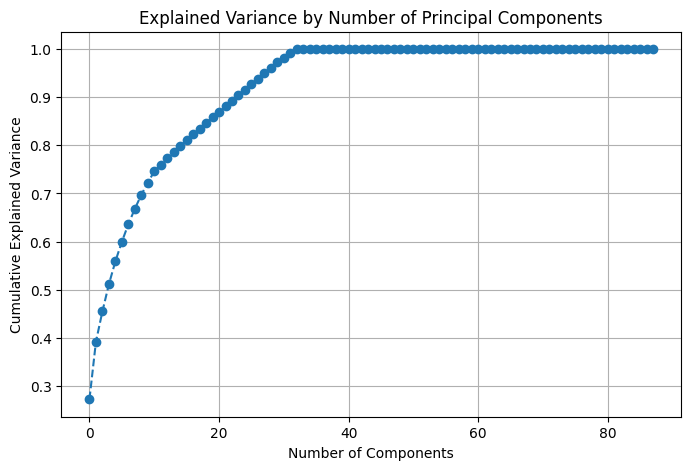

Number of components chosen: 29


In [48]:
pca = PCA().fit(X_train_scaled)
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)


# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

# Choose number of components where cumulative explained variance is just over 95%

n_components = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f'Number of components chosen: {n_components}')

In [49]:
# Fit PCA with 29 components based on the previous analysis and Transform Data

pca = PCA(n_components=29)
X_reduced = pca.fit_transform(X_train_scaled)

print(f"Original shape: {X_train_scaled.shape}")
print(f"Reduced shape: {X_reduced.shape}")



Original shape: (41014, 88)
Reduced shape: (41014, 29)


#### Feature Importance Technique

In [50]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances= feature_importances.sort_values(ascending=False)
feature_importances


policy_tenure                            0.480252
age_of_policyholder                      0.277285
age_of_car                               0.168643
population_density                       0.019752
area_cluster_C8                          0.003789
                                           ...   
segment_Utility                          0.000054
engine_type_1.5 Turbocharged Revotron    0.000041
model_M10                                0.000035
is_speed_alert_Yes                       0.000034
steering_type_Manual                     0.000030
Length: 88, dtype: float64

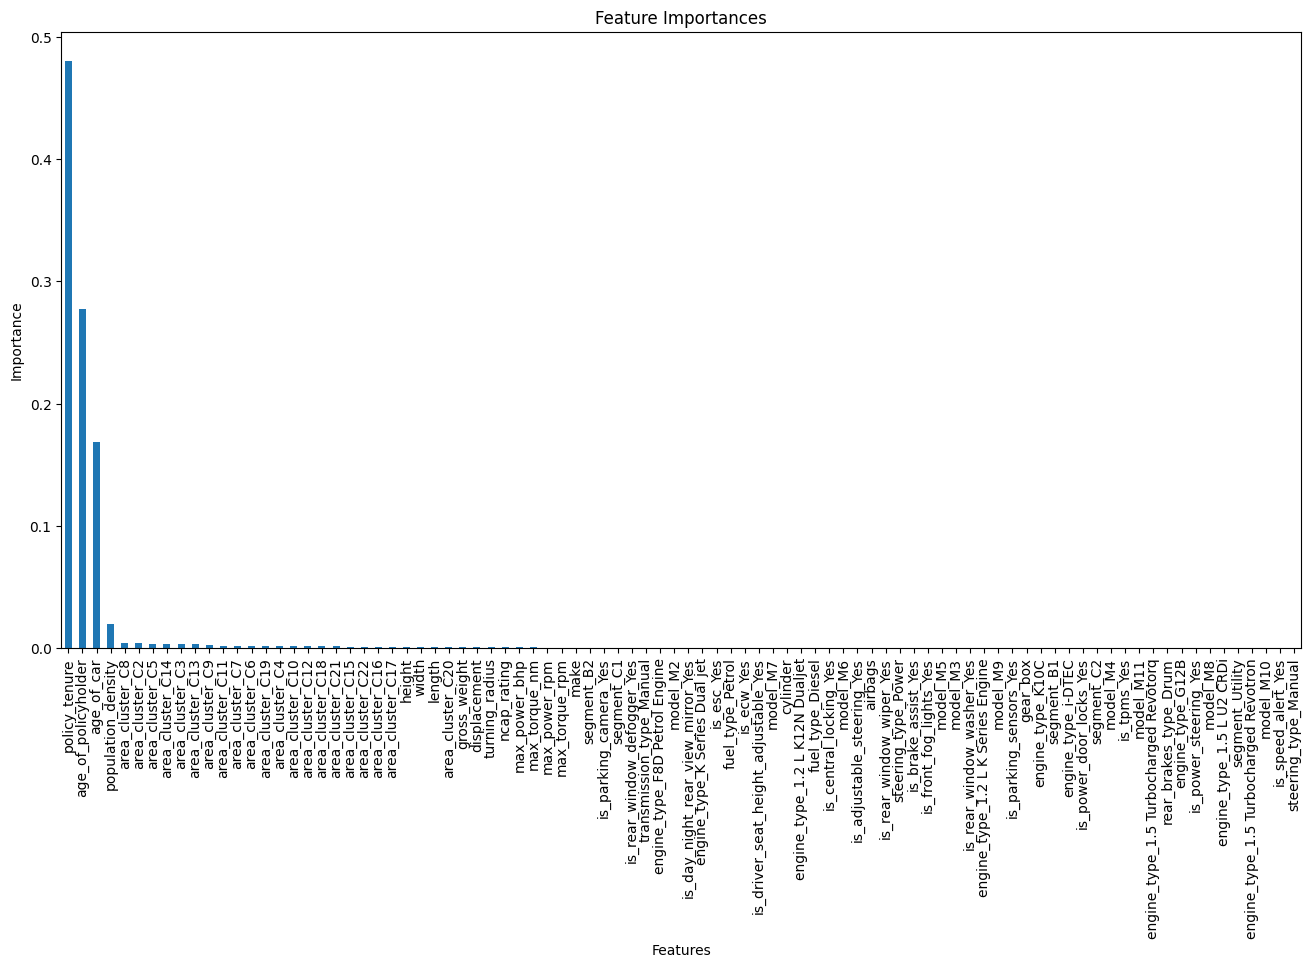

In [51]:
# Plot the feature importances
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(16, 8))
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [52]:
def evaluate_threshold(threshold):

    # Select features based on the threshold
    features_to_keep = feature_importances[feature_importances >= threshold].index.tolist()
    X_reduced = X_train_scaled[features_to_keep]

    # Perform cross-validation
    f1_scores = cross_val_score(model, X_reduced, y_train, cv=5,scoring='f1')
    return f1_scores.mean()

# Diffrerent thresholds to evaluate
thresholds = [0.01, 0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.45]

# Evaluate model performance for each threshold
results = {threshold: evaluate_threshold(threshold) for threshold in thresholds}


In [53]:
# Print results
for threshold, f1_scores in results.items():
    print(f'Threshold: {threshold}, f1 CV Score: {f1_scores}')

Threshold: 0.01, f1 CV Score: 0.010124954906508356
Threshold: 0.02, f1 CV Score: 0.03643610666605093
Threshold: 0.03, f1 CV Score: 0.03643610666605093
Threshold: 0.04, f1 CV Score: 0.03643610666605093
Threshold: 0.05, f1 CV Score: 0.03643610666605093
Threshold: 0.1, f1 CV Score: 0.03643610666605093
Threshold: 0.2, f1 CV Score: 0.06088535169945075
Threshold: 0.3, f1 CV Score: 0.06848911372194767
Threshold: 0.4, f1 CV Score: 0.06848911372194767
Threshold: 0.45, f1 CV Score: 0.06848911372194767


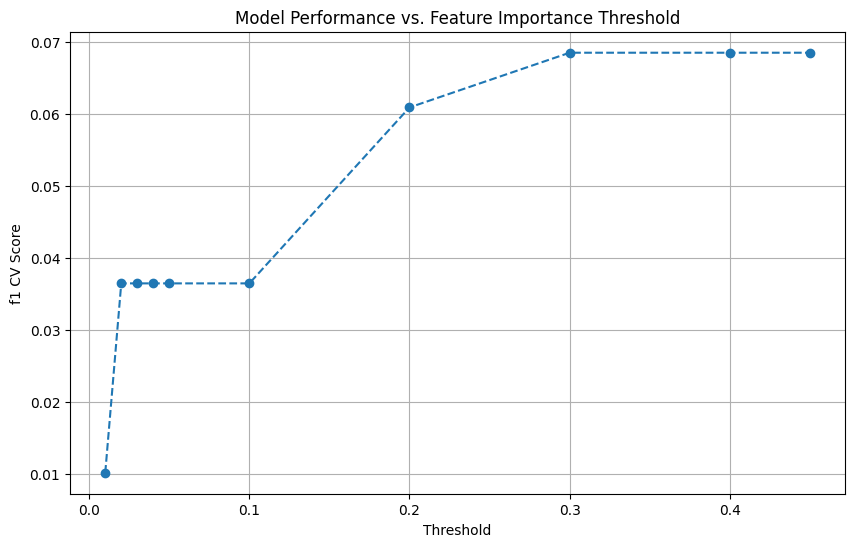

In [54]:
# Plot threshold vs. cross-validation score
plt.figure(figsize=(10, 6))
plt.plot(list(results.keys()), list(results.values()), marker='o', linestyle='--')
plt.xlabel('Threshold')
plt.ylabel('f1 CV Score')
plt.title('Model Performance vs. Feature Importance Threshold')
plt.grid(True)
plt.show()


In [55]:
#  I have determined that a threshold of 0.3 for feature importance is suitable based on previous analysis.

# Choosing the threshold for feature importance

importance_threshold = 0.3

# Selecing the features based on the threshold
selected_features = feature_importances[feature_importances >= importance_threshold].index.tolist()
features_to_drop = feature_importances[feature_importances < importance_threshold].index.tolist()

print(f'Number of selected features: {len(selected_features)}')
print(f'Selected features: {selected_features}')
print(f'Features to drop: {features_to_drop}')
print(f'Number of features to drop: {len(features_to_drop)}')

# Transform your dataset with the selected features
X_selected_rf = X_train_scaled[selected_features]

Number of selected features: 1
Selected features: ['policy_tenure']
Features to drop: ['age_of_policyholder', 'age_of_car', 'population_density', 'area_cluster_C8', 'area_cluster_C2', 'area_cluster_C5', 'area_cluster_C14', 'area_cluster_C3', 'area_cluster_C13', 'area_cluster_C9', 'area_cluster_C11', 'area_cluster_C7', 'area_cluster_C6', 'area_cluster_C19', 'area_cluster_C4', 'area_cluster_C10', 'area_cluster_C12', 'area_cluster_C18', 'area_cluster_C21', 'area_cluster_C15', 'area_cluster_C22', 'area_cluster_C16', 'area_cluster_C17', 'height', 'width', 'length', 'area_cluster_C20', 'gross_weight', 'displacement', 'turning_radius', 'ncap_rating', 'max_power_bhp', 'max_torque_nm', 'max_power_rpm', 'max_torque_rpm', 'make', 'segment_B2', 'is_parking_camera_Yes', 'segment_C1', 'is_rear_window_defogger_Yes', 'transmission_type_Manual', 'engine_type_F8D Petrol Engine', 'model_M2', 'is_day_night_rear_view_mirror_Yes', 'engine_type_K Series Dual jet', 'is_esc_Yes', 'fuel_type_Petrol', 'is_ecw_Ye

In [56]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)


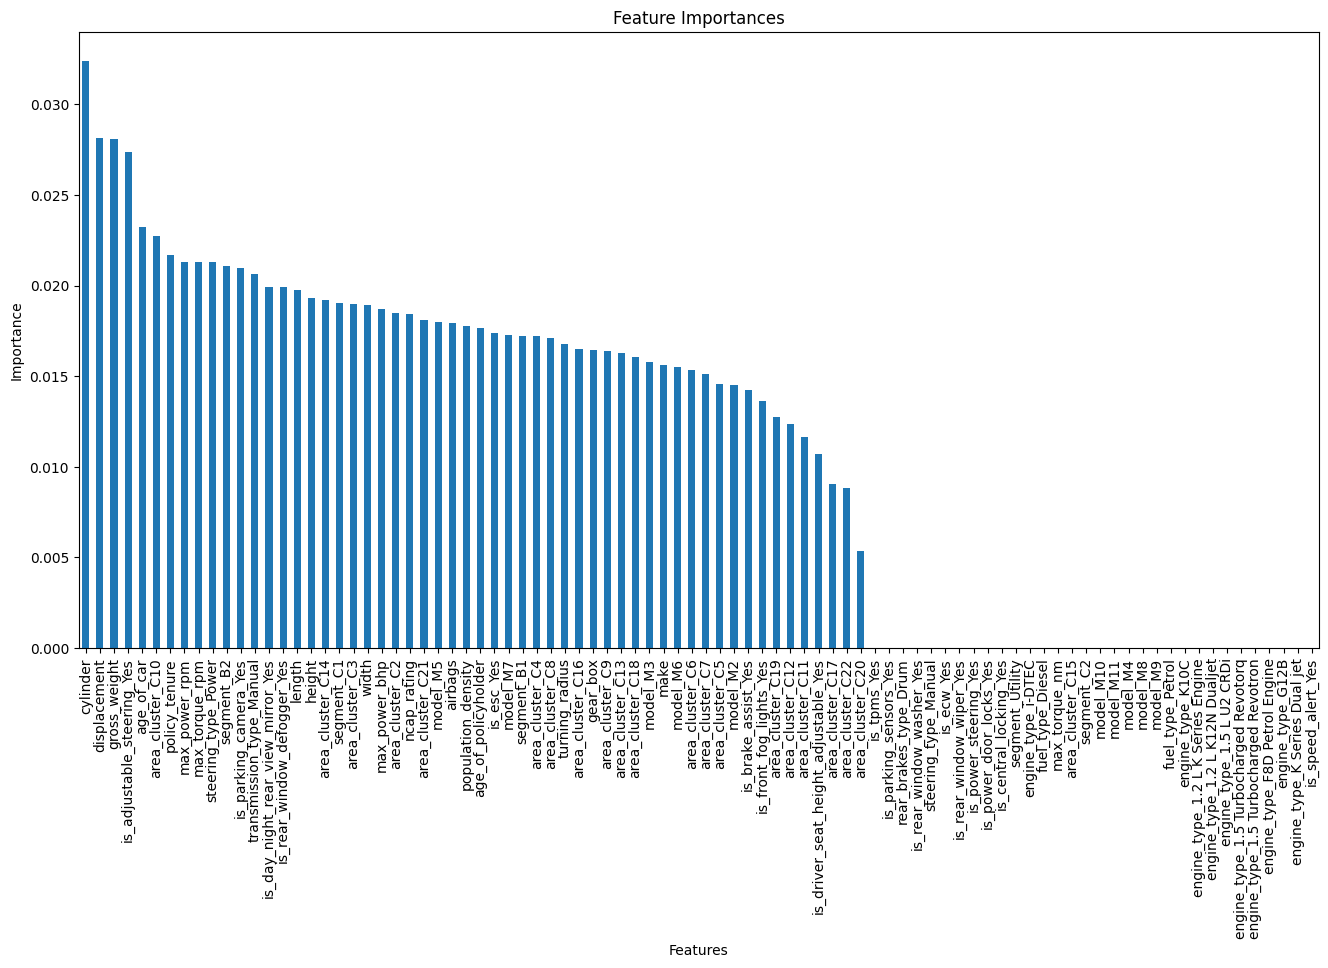

In [57]:
# Plot the feature importances
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(16, 8))
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [58]:
def evaluate_threshold(threshold):

    # Selecting the features based on the threshold
    features_to_keep = feature_importances[feature_importances >= threshold].index.tolist()
    X_reduced = X_train_scaled[features_to_keep]

    # Perform cross-validation
    f1_scores = cross_val_score(model, X_reduced, y_train, cv=5,scoring='f1')
    return f1_scores.mean()

# Different thresholds to evaluate
thresholds = [0.0001,0.0005,0.001, 0.005, 0.01, 0.02,0.025,0.03]

# Evaluate model performance for each threshold
results = {threshold: evaluate_threshold(threshold) for threshold in thresholds}


In [59]:
# Print results
for threshold, f1_scores in results.items():
    print(f'Threshold: {threshold}, f1 CV Score: {f1_scores}')

Threshold: 0.0001, f1 CV Score: 0.00448604400096429
Threshold: 0.0005, f1 CV Score: 0.00448604400096429
Threshold: 0.001, f1 CV Score: 0.00448604400096429
Threshold: 0.005, f1 CV Score: 0.00448604400096429
Threshold: 0.01, f1 CV Score: 0.002257065723532166
Threshold: 0.02, f1 CV Score: 0.0015165890403082056
Threshold: 0.025, f1 CV Score: 0.0
Threshold: 0.03, f1 CV Score: 0.0


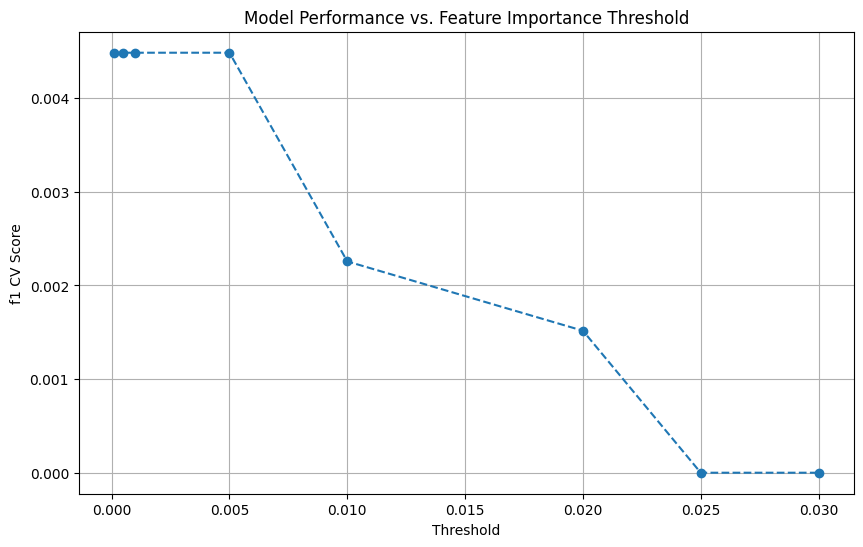

In [60]:
# Plot threshold vs. cross-validation score
plt.figure(figsize=(10, 6))
plt.plot(list(results.keys()), list(results.values()), marker='o', linestyle='--')
plt.xlabel('Threshold')
plt.ylabel('f1 CV Score')
plt.title('Model Performance vs. Feature Importance Threshold')
plt.grid(True)
plt.show()


In [61]:
#  I have determined that a threshold of 0.005 for feature importance is suitable based on previous analysis.

# Choosing the threshold for feature importance

importance_threshold = 0.005

# Selecting the features based on the threshold
selected_features = feature_importances[feature_importances >= importance_threshold].index.tolist()
features_to_drop = feature_importances[feature_importances < importance_threshold].index.tolist()

print(f'Number of selected features: {len(selected_features)}')
print(f'Selected features: {selected_features}')
print(f'Features to drop: {features_to_drop}')
print(f'Number of features to drop: {len(features_to_drop)}')

# Transform your dataset with the selected features
X_selected_xg = X_train_scaled[selected_features]

Number of selected features: 56
Selected features: ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'make', 'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'max_torque_rpm', 'max_power_bhp', 'max_power_rpm', 'area_cluster_C10', 'area_cluster_C11', 'area_cluster_C12', 'area_cluster_C13', 'area_cluster_C14', 'area_cluster_C16', 'area_cluster_C17', 'area_cluster_C18', 'area_cluster_C19', 'area_cluster_C2', 'area_cluster_C20', 'area_cluster_C21', 'area_cluster_C22', 'area_cluster_C3', 'area_cluster_C4', 'area_cluster_C5', 'area_cluster_C6', 'area_cluster_C7', 'area_cluster_C8', 'area_cluster_C9', 'segment_B1', 'segment_B2', 'segment_C1', 'model_M2', 'model_M3', 'model_M5', 'model_M6', 'model_M7', 'is_esc_Yes', 'is_adjustable_steering_Yes', 'is_parking_camera_Yes', 'transmission_type_Manual', 'steering_type_Power', 'is_front_fog_lights_Yes', 'is_rear_window_defogger_Yes', 'is_brake_a

In [62]:
def evaluate_model(X, y, model):
    f1_scores = cross_val_score(model, X, y, cv=5,scoring='f1')
    return f1_scores.mean()

# Evaluate PCA
pca_scores = evaluate_model(X_reduced, y_train, XGBClassifier(random_state=42))

# Evaluate feature importance (Random Forest) approach
fi_rf_scores = evaluate_model(X_selected_rf, y_train, XGBClassifier(random_state=42))

# Evaluate feature importance (Random Forest) approach
fi_xg_scores = evaluate_model(X_selected_xg, y_train, XGBClassifier(random_state=42))


# print(f"Mean cross-validation accuracy for Anova Ch-Square approach: {feature_scores}")


print(f"Mean cross-validation f1_scores for PCA approach: {pca_scores}")

print(f"Mean cross-validation f1_scores for feature importance random forestapproach: {fi_rf_scores}")


print(f"Mean cross-validation f1_scores for feature importance xgboost approach: {fi_xg_scores}")

# Determinining which approach performs better
best_approach = max( pca_scores, fi_rf_scores, fi_xg_scores)
if best_approach == pca_scores:
    print("PCA approach performs better. Training final model with PCA-transformed features.")
    X_final = X_reduced
elif best_approach == fi_rf_scores:
    print("Feature importance (Random Forest) approach performs better. Training final model with selected features.")
    X_final = X_selected_rf
else:
    print("Feature importance (Xg Boost) approach performs better. Training final model with selected features.")
    X_final = X_selected_xg


Mean cross-validation f1_scores for PCA approach: 0.005926276145046426
Mean cross-validation f1_scores for feature importance random forestapproach: 0.0
Mean cross-validation f1_scores for feature importance xgboost approach: 0.00448604400096429
PCA approach performs better. Training final model with PCA-transformed features.


### Balancing the train Data

In [63]:
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


print("Original shape of X_train:", X_train_scaled.shape)
print("Original shape of y_train:", y_train.shape)
print("Resampled shape of X_train:", X_train_resampled.shape)
print("Resampled shape of y_train:", y_train_resampled.shape)

Original shape of X_train: (41014, 88)
Original shape of y_train: (41014,)
Resampled shape of X_train: (76780, 88)
Resampled shape of y_train: (76780,)


### PCA

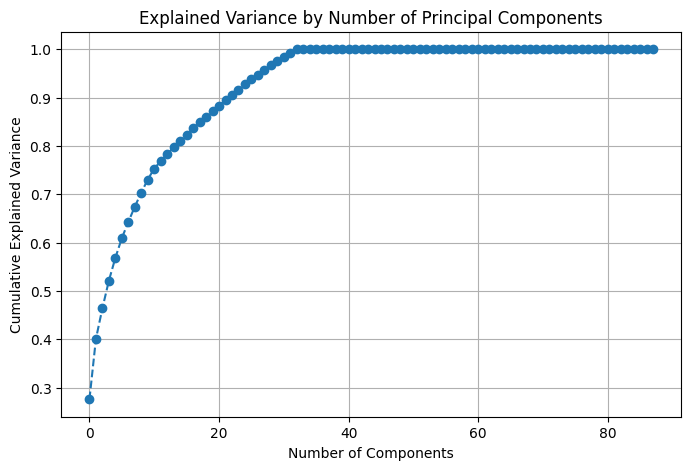

Number of components chosen: 28


In [64]:
pca = PCA().fit(X_train_resampled)
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)


# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

n_components = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f'Number of components chosen: {n_components}')

In [65]:
# Fit PCA with 28 components based on the previous analysis and Transform Data

pca = PCA(n_components=28)
X_reduced = pca.fit_transform(X_train_resampled)

print(f"Original shape: {X_train_resampled.shape}")
print(f"Reduced shape: {X_reduced.shape}")



Original shape: (76780, 88)
Reduced shape: (76780, 28)


### Feature Importance Techniques

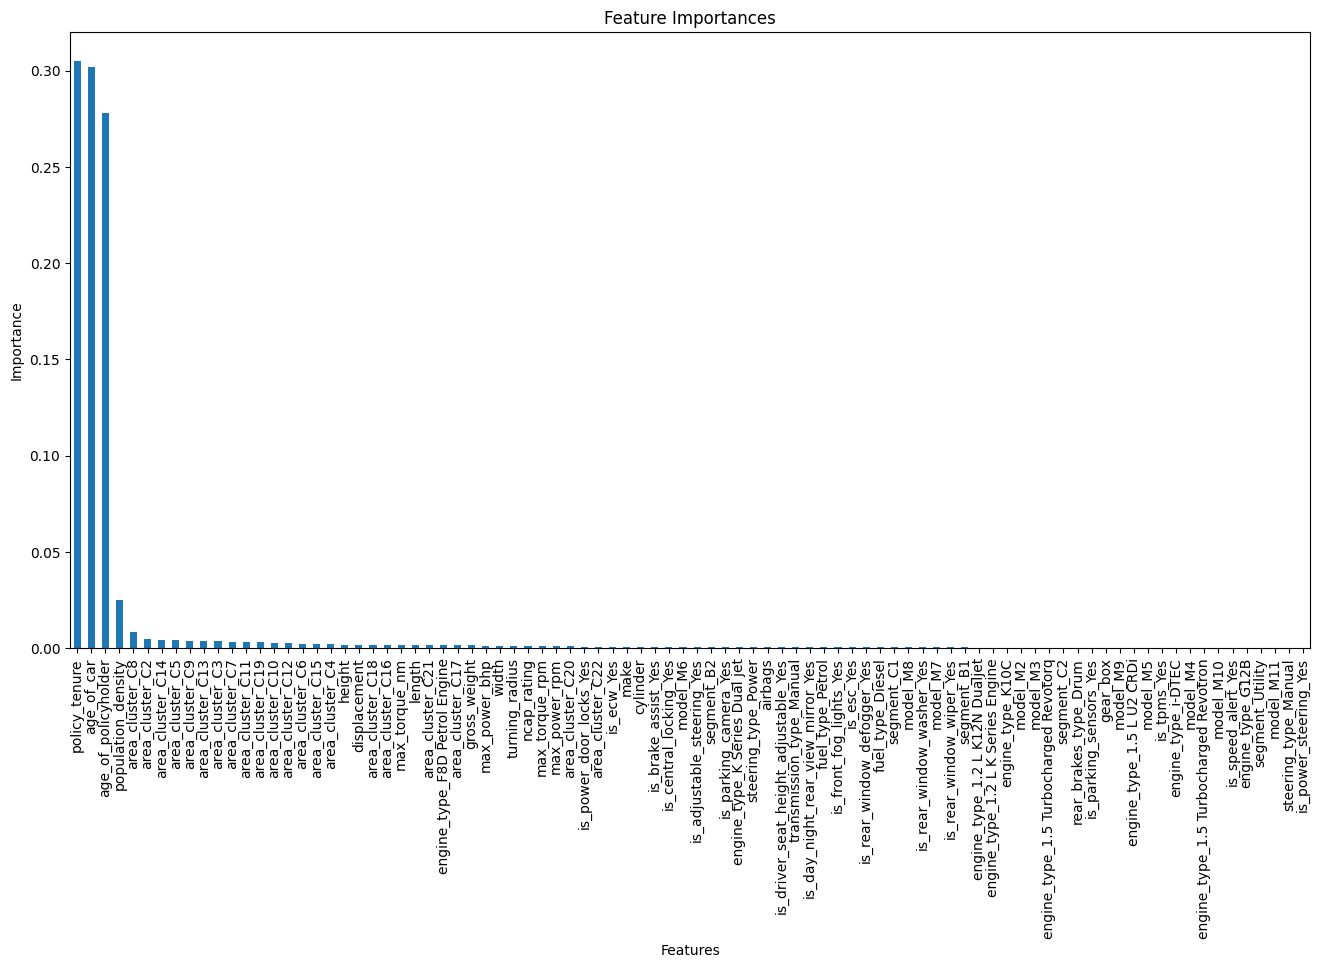

In [66]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances= feature_importances.sort_values(ascending=False)

# Plot the feature importances
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(16, 8))
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [67]:
def evaluate_threshold(threshold):

    # Selecting the features based on the threshold
    features_to_keep = feature_importances[feature_importances >= threshold].index.tolist()
    X_reduced = X_train_resampled[features_to_keep]

    # Perform cross-validation
    f1_scores = cross_val_score(model, X_reduced, y_train_resampled, cv=5,scoring='f1')
    return f1_scores.mean()

# Different thresholds to evaluate
thresholds = [0.01, 0.02,0.03,0.04,0.05,0.1,0.2,0.3]

# Evaluate model performance for each threshold
results = {threshold: evaluate_threshold(threshold) for threshold in thresholds}


In [68]:
# Print results
for threshold, f1_scores in results.items():
    print(f'Threshold: {threshold}, f1 CV Score: {f1_scores}')

Threshold: 0.01, f1 CV Score: 0.9116100064090329
Threshold: 0.02, f1 CV Score: 0.9116100064090329
Threshold: 0.03, f1 CV Score: 0.8725109764788659
Threshold: 0.04, f1 CV Score: 0.8725109764788659
Threshold: 0.05, f1 CV Score: 0.8725109764788659
Threshold: 0.1, f1 CV Score: 0.8725109764788659
Threshold: 0.2, f1 CV Score: 0.8725109764788659
Threshold: 0.3, f1 CV Score: 0.8006883651402891


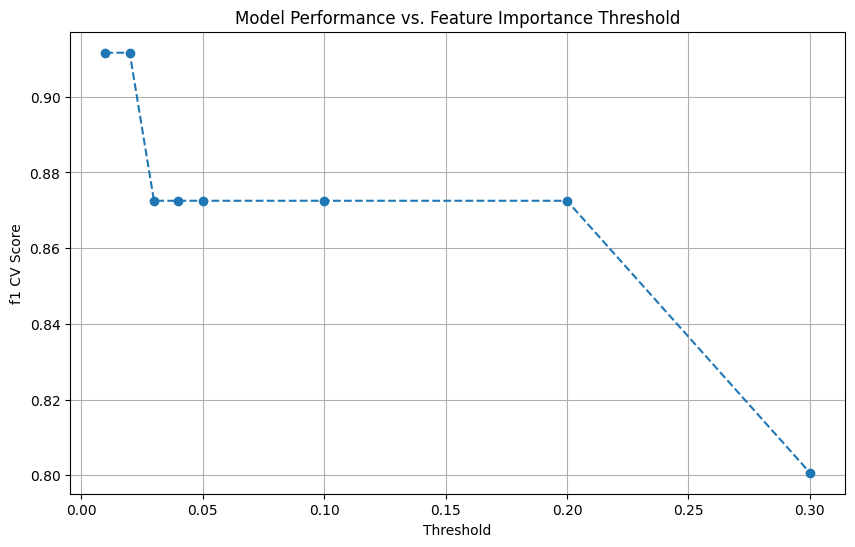

In [69]:
# Plot threshold vs. cross-validation score
plt.figure(figsize=(10, 6))
plt.plot(list(results.keys()), list(results.values()), marker='o', linestyle='--')
plt.xlabel('Threshold')
plt.ylabel('f1 CV Score')
plt.title('Model Performance vs. Feature Importance Threshold')
plt.grid(True)
plt.show()


In [70]:
#  I have determined that a threshold of 0.02 for feature importance is suitable based on previous analysis.

# Choosing the threshold for feature importance

importance_threshold = 0.02

# Selecting the features based on the threshold
selected_features = feature_importances[feature_importances >= importance_threshold].index.tolist()
features_to_drop = feature_importances[feature_importances < importance_threshold].index.tolist()

print(f'Number of selected features: {len(selected_features)}')
print(f'Selected features: {selected_features}')
print(f'Features to drop: {features_to_drop}')
print(f'Number of features to drop: {len(features_to_drop)}')

# Transform your dataset with the selected features
X_selected_rf = X_train_resampled[selected_features]
X_test_scaled_rf = X_test_scaled[selected_features]

Number of selected features: 4
Selected features: ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density']
Features to drop: ['area_cluster_C8', 'area_cluster_C2', 'area_cluster_C14', 'area_cluster_C5', 'area_cluster_C9', 'area_cluster_C13', 'area_cluster_C3', 'area_cluster_C7', 'area_cluster_C11', 'area_cluster_C19', 'area_cluster_C10', 'area_cluster_C12', 'area_cluster_C6', 'area_cluster_C15', 'area_cluster_C4', 'height', 'displacement', 'area_cluster_C18', 'area_cluster_C16', 'max_torque_nm', 'length', 'area_cluster_C21', 'engine_type_F8D Petrol Engine', 'area_cluster_C17', 'gross_weight', 'max_power_bhp', 'width', 'turning_radius', 'ncap_rating', 'max_torque_rpm', 'max_power_rpm', 'area_cluster_C20', 'is_power_door_locks_Yes', 'area_cluster_C22', 'is_ecw_Yes', 'make', 'cylinder', 'is_brake_assist_Yes', 'is_central_locking_Yes', 'model_M6', 'is_adjustable_steering_Yes', 'segment_B2', 'is_parking_camera_Yes', 'engine_type_K Series Dual jet', 'steering_type_Power',

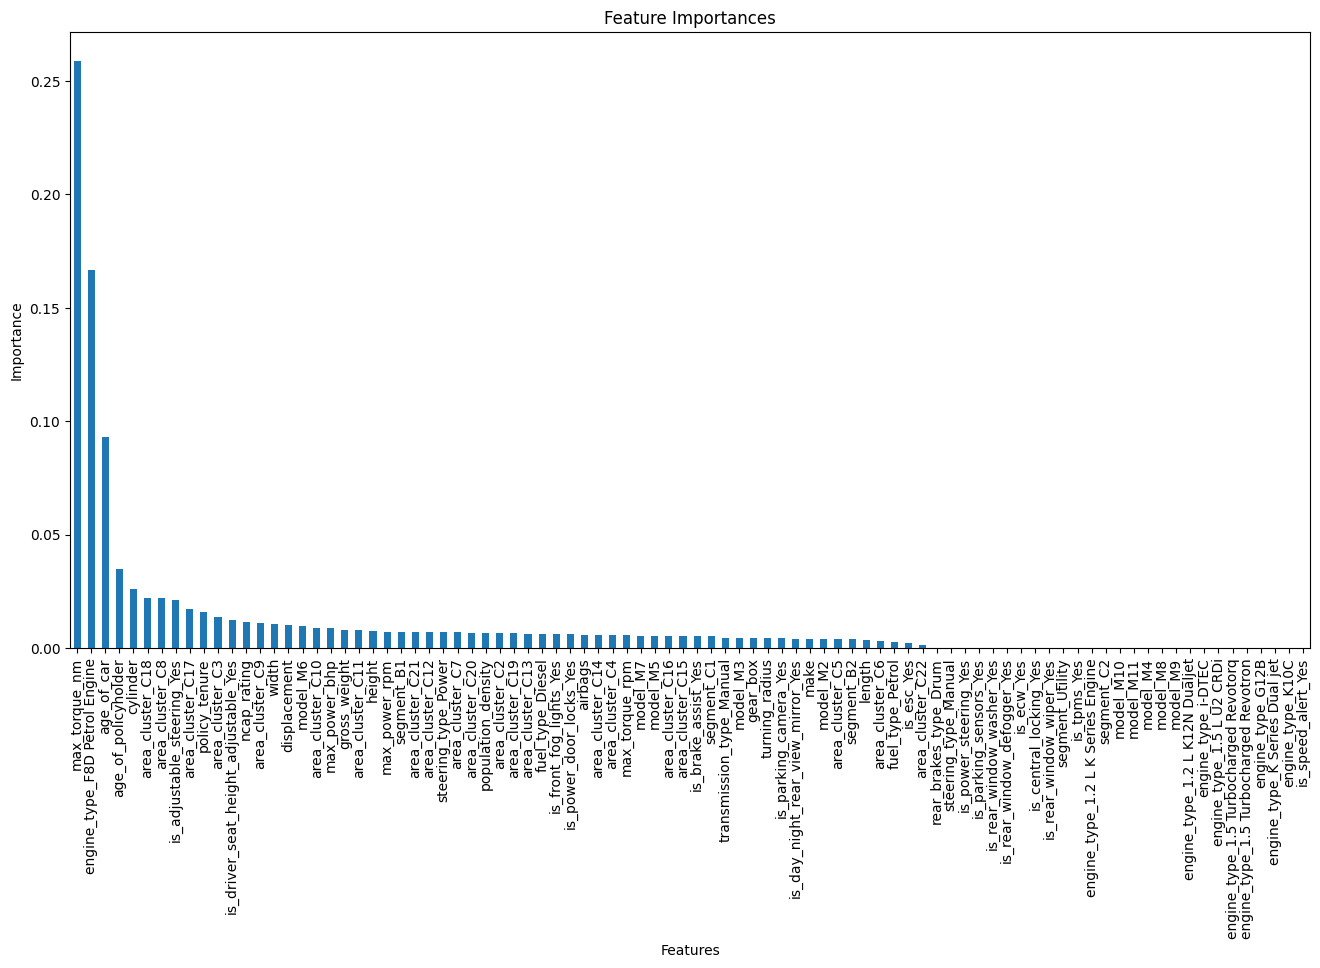

In [71]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
# Plot the feature importances
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(16, 8))
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()



In [72]:
def evaluate_threshold(threshold):

    # Select features based on the threshold
    features_to_keep = feature_importances[feature_importances >= threshold].index.tolist()
    X_reduced = X_train_resampled[features_to_keep]

    # Perform cross-validation
    f1_scores = cross_val_score(model, X_reduced, y_train_resampled, cv=5,scoring='f1')
    return f1_scores.mean()

# Different thresholds to evaluate
thresholds = [0.001, 0.003,0.01,0.03,0.1,0.2,0.25]

# Evaluate model performance for each threshold
results = {threshold: evaluate_threshold(threshold) for threshold in thresholds}


In [73]:
# Print results
for threshold, f1_scores in results.items():
    print(f'Threshold: {threshold}, f1 CV Score: {f1_scores}')

Threshold: 0.001, f1 CV Score: 0.91819849558167
Threshold: 0.003, f1 CV Score: 0.9188851023950757
Threshold: 0.01, f1 CV Score: 0.9178788249993615
Threshold: 0.03, f1 CV Score: 0.9129211335983785
Threshold: 0.1, f1 CV Score: 0.45539157891222076
Threshold: 0.2, f1 CV Score: 0.4504896631730122
Threshold: 0.25, f1 CV Score: 0.4504896631730122


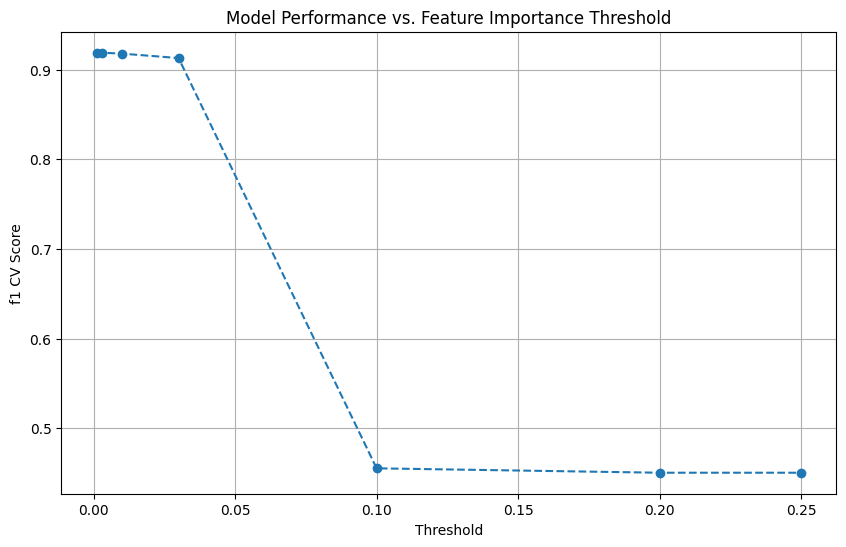

In [74]:
# Plot threshold vs. cross-validation score
plt.figure(figsize=(10, 6))
plt.plot(list(results.keys()), list(results.values()), marker='o', linestyle='--')
plt.xlabel('Threshold')
plt.ylabel('f1 CV Score')
plt.title('Model Performance vs. Feature Importance Threshold')
plt.grid(True)
plt.show()


In [75]:
#  I have determined that a threshold of 0.003 for feature importance is suitable based on previouss analysis.

# Choosing the threshold for feature importance

importance_threshold = 0.003

# Select features based on the threshold
selected_features = feature_importances[feature_importances >= importance_threshold].index.tolist()
features_to_drop = feature_importances[feature_importances < importance_threshold].index.tolist()

print(f'Number of selected features: {len(selected_features)}')
print(f'Selected features: {selected_features}')
print(f'Features to drop: {features_to_drop}')
print(f'Number of features to drop: {len(features_to_drop)}')

# Transform your dataset with the selected features
X_selected_xg = X_train_resampled[selected_features]
X_test_scaled_xg = X_test_scaled[selected_features]

Number of selected features: 58
Selected features: ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'make', 'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'max_torque_nm', 'max_torque_rpm', 'max_power_bhp', 'max_power_rpm', 'area_cluster_C10', 'area_cluster_C11', 'area_cluster_C12', 'area_cluster_C13', 'area_cluster_C14', 'area_cluster_C15', 'area_cluster_C16', 'area_cluster_C17', 'area_cluster_C18', 'area_cluster_C19', 'area_cluster_C2', 'area_cluster_C20', 'area_cluster_C21', 'area_cluster_C3', 'area_cluster_C4', 'area_cluster_C5', 'area_cluster_C6', 'area_cluster_C7', 'area_cluster_C8', 'area_cluster_C9', 'segment_B1', 'segment_B2', 'segment_C1', 'model_M2', 'model_M3', 'model_M5', 'model_M6', 'model_M7', 'fuel_type_Diesel', 'engine_type_F8D Petrol Engine', 'is_adjustable_steering_Yes', 'is_parking_camera_Yes', 'transmission_type_Manual', 'steering_type_Power', 'is_front_fog

In [76]:
def evaluate_model(X, y, model):
    f1_scores = cross_val_score(model, X, y, cv=5,scoring='f1')
    return f1_scores.mean()



# Evaluate PCA
pca_scores = evaluate_model(X_reduced, y_train_resampled, XGBClassifier(random_state=42))

# Evaluate feature importance (Random Forest) approach
fi_rf_scores = evaluate_model(X_selected_rf, y_train_resampled, XGBClassifier(random_state=42))

# Evaluate feature importance (Random Forest) approach
fi_xg_scores = evaluate_model(X_selected_xg, y_train_resampled, XGBClassifier(random_state=42))


# print(f"Mean cross-validation accuracy for Anova Ch-Square approach: {feature_scores}")


print(f"Mean cross-validation f1_scores for PCA approach: {pca_scores}")

print(f"Mean cross-validation f1_scores for feature importance random forestapproach: {fi_rf_scores}")


print(f"Mean cross-validation f1_scores for feature importance xgboost approach: {fi_xg_scores}")

# Determine which approach performs better
best_approach = max( pca_scores, fi_rf_scores, fi_xg_scores)
if best_approach == pca_scores:
    print("PCA approach performs better. Training final model with PCA-transformed features.")
    X_final = X_reduced
elif best_approach == fi_rf_scores:
    print("Feature importance (Random Forest) approach performs better. Training final model with selected features.")
    X_final = X_selected_rf
else:
    print("Feature importance (Xg Boost) approach performs better. Training final model with selected features.")
    X_final = X_selected_xg


Mean cross-validation f1_scores for PCA approach: 0.7887700156323518
Mean cross-validation f1_scores for feature importance random forestapproach: 0.9168853190363896
Mean cross-validation f1_scores for feature importance xgboost approach: 0.9188851023950757
Feature importance (Xg Boost) approach performs better. Training final model with selected features.


#### Storing the Selected features data to train later

In [77]:
X_final.to_csv("/content/drive/MyDrive/Datasets/Output/preprocessed_X_train.csv",index=False)

In [78]:
y_train_resampled.to_csv("/content/drive/MyDrive/Datasets/Output/preprocessed_y_train.csv",header=True)

In [79]:
X_test_scaled_xg.to_csv("/content/drive/MyDrive/Datasets/Output/preprocessed_X_test.csv",index=False)

In [80]:
y_test.to_csv("/content/drive/MyDrive/Datasets/Output/y_test.csv",header=True)

### Train and Test Data to Train DIfferent Models after Feature Importance technniques

In [81]:
X_train = pd.read_csv("/content/drive/MyDrive/Datasets/Output/preprocessed_X_train.csv")
X_test = pd.read_csv("/content/drive/MyDrive/Datasets/Output/preprocessed_X_test.csv")
y_train = pd.read_csv("/content/drive/MyDrive/Datasets/Output/preprocessed_y_train.csv")
y_test = pd.read_csv("/content/drive/MyDrive/Datasets/Output/y_test.csv")
print(f"The shape of the X_train data is {X_train.shape}")
print(f"The shape of the X_test data is {X_test.shape}")
print(f"The shape of the y_train data is {y_train.shape}")
print(f"The shape of the y_test data is {y_test.shape}")

The shape of the X_train data is (76780, 58)
The shape of the X_test data is (17578, 58)
The shape of the y_train data is (76780, 2)
The shape of the y_test data is (17578, 2)


In [82]:
X_train.head(2)

policy_tenure  age_of_car  age_of_policyholder  population_density  \
0       0.645419   -0.888724            -0.299087           -0.916704   
1      -1.370795   -0.345335             0.565051           -0.782555   

       make   airbags  displacement  cylinder  gear_box  turning_radius  \
0 -0.672958 -0.622256     -1.379669 -1.299446 -0.571475       -1.111124   
1 -0.672958 -0.622256     -1.379669 -1.299446 -0.571475       -1.111124   

     length     width    height  gross_weight  ncap_rating  max_torque_nm  \
0 -1.305251 -1.406068 -0.985521     -0.943972    -1.268858      -1.019934   
1 -1.305251 -1.406068 -0.985521     -0.943972    -1.268858      -1.019934   

   max_torque_rpm  max_power_bhp  max_power_rpm  area_cluster_C10  \
0       -0.044068      -1.397967       0.757503         -0.239787   
1       -0.044068      -1.397967       0.757503         -0.239787   

   area_cluster_C11  area_cluster_C12  area_cluster_C13  area_cluster_C14  \
0         -0.145651         -0.167862         -0.249361         -0.258555   
1         -0.145651         -0.167862         -0.249361         -0.258555   

   area_cluster_C15  area_cluster_C16  area_cluster_C17  area_cluster_C18  \
0         -0.115073         -0.083058         -0.092775         -0.066393   
1         -0.115073         -0.083058         -0.092775         -0.066393   

   area_cluster_C19  area_cluster_C2  area_cluster_C20  area_cluster_C21  \
0         -0.129259        -0.378228          -0.04337         -0.079873   
1         -0.129259        -0.378228          -0.04337         -0.079873   

   area_cluster_C3  area_cluster_C4  area_cluster_C5  area_cluster_C6  \
0         2.944241        -0.105562        -0.366811        -0.122974   
1        -0.339646        -0.105562        -0.366811        -0.122974   

   area_cluster_C7  area_cluster_C8  area_cluster_C9  segment_B1  segment_B2  \
0        -0.194971        -0.552018        -0.221916   -0.277525   -0.674702   
1         5.128963        -0.552018        -0.221916   -0.277525   -0.674702   

   segment_C1  model_M2  model_M3  model_M5  model_M6  model_M7  \
0   -0.254071 -0.135084 -0.205832 -0.166552 -0.554386 -0.231194   
1   -0.254071 -0.135084 -0.205832 -0.166552 -0.554386 -0.231194   

   fuel_type_Diesel  engine_type_F8D Petrol Engine  \
0         -0.660047                       1.715708   
1         -0.660047                       1.715708   

   is_adjustable_steering_Yes  is_parking_camera_Yes  \
0                   -1.243331              -0.802935   
1                   -1.243331              -0.802935   

   transmission_type_Manual  steering_type_Power  is_front_fog_lights_Yes  \
0                  0.732624             0.866309                -1.175662   
1                  0.732624             0.866309                -1.175662   

   is_brake_assist_Yes  is_power_door_locks_Yes  \
0            -1.105395                -1.626059   
1            -1.105395                -1.626059   

   is_driver_seat_height_adjustable_Yes  is_day_night_rear_view_mirror_Yes  
0                             -1.190795                          -0.784368  
1                             -1.190795                          -0.784368

In [83]:
X_test.head(2)

policy_tenure  age_of_car  age_of_policyholder  population_density  \
0       1.479994    0.016925            -0.456203            0.593916   
1       1.287692   -0.888724            -0.534761           -0.916704   

       make   airbags  displacement  cylinder  gear_box  turning_radius  \
0  1.083649  1.557321      1.239543  0.769558  1.749857        1.519312   
1  1.083649  1.557321      1.239543  0.769558  1.749857        1.519312   

     length     width    height  gross_weight  ncap_rating  max_torque_nm  \
0  1.441155  1.049166  1.021206      1.572537     0.891174       1.576827   
1  1.441155  1.049166  1.021206      1.572537     0.891174       1.576827   

   max_torque_rpm  max_power_bhp  max_power_rpm  area_cluster_C10  \
0       -1.075378       1.242583      -1.422349         -0.239787   
1       -1.075378       1.242583      -1.422349         -0.239787   

   area_cluster_C11  area_cluster_C12  area_cluster_C13  area_cluster_C14  \
0         -0.145651         -0.167862         -0.249361         -0.258555   
1         -0.145651         -0.167862         -0.249361         -0.258555   

   area_cluster_C15  area_cluster_C16  area_cluster_C17  area_cluster_C18  \
0         -0.115073         -0.083058         -0.092775         -0.066393   
1         -0.115073         -0.083058         -0.092775         -0.066393   

   area_cluster_C19  area_cluster_C2  area_cluster_C20  area_cluster_C21  \
0         -0.129259         2.643910          -0.04337         -0.079873   
1         -0.129259        -0.378228          -0.04337         -0.079873   

   area_cluster_C3  area_cluster_C4  area_cluster_C5  area_cluster_C6  \
0        -0.339646        -0.105562        -0.366811        -0.122974   
1         2.944241        -0.105562        -0.366811        -0.122974   

   area_cluster_C7  area_cluster_C8  area_cluster_C9  segment_B1  segment_B2  \
0        -0.194971        -0.552018        -0.221916   -0.277525   -0.674702   
1        -0.194971        -0.552018        -0.221916   -0.277525   -0.674702   

   segment_C1  model_M2  model_M3  model_M5  model_M6  model_M7  \
0   -0.254071 -0.135084 -0.205832 -0.166552 -0.554386 -0.231194   
1   -0.254071 -0.135084 -0.205832 -0.166552 -0.554386 -0.231194   

   fuel_type_Diesel  engine_type_F8D Petrol Engine  \
0          1.515043                       -0.58285   
1          1.515043                       -0.58285   

   is_adjustable_steering_Yes  is_parking_camera_Yes  \
0                    0.804291               1.245431   
1                    0.804291               1.245431   

   transmission_type_Manual  steering_type_Power  is_front_fog_lights_Yes  \
0                 -1.364957             0.866309                 0.850585   
1                 -1.364957             0.866309                 0.850585   

   is_brake_assist_Yes  is_power_door_locks_Yes  \
0             0.904654                 0.614984   
1             0.904654                 0.614984   

   is_driver_seat_height_adjustable_Yes  is_day_night_rear_view_mirror_Yes  
0                              0.839775                          -0.784368  
1                              0.839775                          -0.784368

In [84]:
y_train["is_claim"].value_counts()

is_claim
0    38390
1    38390
Name: count, dtype: int64

In [85]:
y_test["is_claim"].value_counts()

is_claim
0    16454
1     1124
Name: count, dtype: int64

In [86]:
y_test = y_test["is_claim"]
y_train = y_train["is_claim"]

In [87]:
model = []
train_f1_scores = []
test_f1_scores = []
train_precision_scores = []
test_precision_scores = []
train_recall_scores = []
test_recall_scores = []
train_roc_auc_scores = []
test_roc_auc_scores = []

#### Logistic Regression

In [88]:
lr = LogisticRegression(random_state=42)

param_grid = {

    'C': [10**-4,10**-2,10**0,10**2,10**4],
}

grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

grid_search_lr.fit(X_train, y_train)

print("Best parameters for Logistic Regression: ", grid_search_lr.best_params_)

best_lr = grid_search_lr.best_estimator_


y_train_pred_lr = best_lr.predict(X_train)
y_train_proba_lr = best_lr.predict_proba(X_train)[:, 1]
y_test_pred_lr = best_lr.predict(X_test)
y_test_proba_lr = best_lr.predict_proba(X_test)[:, 1]

train_f1 = f1_score(y_train, y_train_pred_lr)
train_precision = precision_score(y_train, y_train_pred_lr)
train_recall = recall_score(y_train, y_train_pred_lr)
train_roc_auc = roc_auc_score(y_train, y_train_proba_lr)


test_f1 = f1_score(y_test, y_test_pred_lr)
test_precision = precision_score(y_test, y_test_pred_lr)
test_recall = recall_score(y_test, y_test_pred_lr)
test_roc_auc = roc_auc_score(y_test, y_test_proba_lr)

# Append scores to lists

model.append("Logistic Regression")
train_f1_scores.append(train_f1)
test_f1_scores.append(test_f1)
train_precision_scores.append(train_precision)
test_precision_scores.append(test_precision)
train_recall_scores.append(train_recall)
test_recall_scores.append(test_recall)
train_roc_auc_scores.append(train_roc_auc)
test_roc_auc_scores.append(test_roc_auc)

print("\nTrain Metrics:")
print(f"F1 Score: {train_f1}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"ROC-AUC Score: {train_roc_auc}")


print("\nTest Metrics:")
print(f"F1 Score: {test_f1}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"ROC-AUC Score: {test_roc_auc}")


print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_test_pred_lr))

Best parameters for Logistic Regression:  {'C': 100}

Train Metrics:
F1 Score: 0.603065700877372
Precision: 0.5907410183380802
Recall: 0.6159156030216202
ROC-AUC Score: 0.6315598964060127

Test Metrics:
F1 Score: 0.1440962183416214
Precision: 0.08281270769639772
Recall: 0.5542704626334519
ROC-AUC Score: 0.5941553006397216

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.58      0.72     16454
           1       0.08      0.55      0.14      1124

    accuracy                           0.58     17578
   macro avg       0.52      0.57      0.43     17578
weighted avg       0.89      0.58      0.68     17578



### Decision Tree Classifier

In [89]:
dt = DecisionTreeClassifier(random_state=42)
#6 min
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

grid_search_dt.fit(X_train, y_train)

print("Best parameters for Decision Tree Classifier: ", grid_search_dt.best_params_)

best_dt = grid_search_dt.best_estimator_


y_train_pred_dt = best_dt.predict(X_train)
y_train_proba_dt = best_dt.predict_proba(X_train)[:, 1]
y_test_pred_dt = best_dt.predict(X_test)
y_test_proba_dt = best_dt.predict_proba(X_test)[:, 1]

train_f1 = f1_score(y_train, y_train_pred_dt)
train_precision = precision_score(y_train, y_train_pred_dt)
train_recall = recall_score(y_train, y_train_pred_dt)
train_roc_auc = roc_auc_score(y_train, y_train_proba_dt)


test_f1 = f1_score(y_test, y_test_pred_dt)
test_precision = precision_score(y_test, y_test_pred_dt)
test_recall = recall_score(y_test, y_test_pred_dt)
test_roc_auc = roc_auc_score(y_test, y_test_proba_dt)

# Append scores to lists

model.append("Decision Tree Classifier")
train_f1_scores.append(train_f1)
test_f1_scores.append(test_f1)
train_precision_scores.append(train_precision)
test_precision_scores.append(test_precision)
train_recall_scores.append(train_recall)
test_recall_scores.append(test_recall)
train_roc_auc_scores.append(train_roc_auc)
test_roc_auc_scores.append(test_roc_auc)

print("\nTrain Metrics:")
print(f"F1 Score: {train_f1}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"ROC-AUC Score: {train_roc_auc}")


print("\nTest Metrics:")
print(f"F1 Score: {test_f1}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"ROC-AUC Score: {test_roc_auc}")


print("\nDecision Tree Classifier Clasification Report:")
print(classification_report(y_test, y_test_pred_dt))

Best parameters for Decision Tree Classifier:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}

Train Metrics:
F1 Score: 0.9862945427361076
Precision: 0.9932377103309824
Recall: 0.9794477728575149
ROC-AUC Score: 0.9995666451190776

Test Metrics:
F1 Score: 0.0845602114005285
Precision: 0.07344262295081967
Recall: 0.099644128113879
ROC-AUC Score: 0.5168553050086361

Decision Tree Classifier Clasification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93     16454
           1       0.07      0.10      0.08      1124

    accuracy                           0.86     17578
   macro avg       0.51      0.51      0.50     17578
weighted avg       0.88      0.86      0.87     17578



### XG Boost CLassifier

In [90]:
xgb = XGBClassifier(random_state=42)
# 17min
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Use RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=50, cv=5, scoring='f1', n_jobs=-1, random_state=42)

random_search_xgb.fit(X_train, y_train)

print("Best parameters for XG Boost Classifier: ", random_search_xgb.best_params_)

best_xgb = random_search_xgb.best_estimator_

# Predict and evaluate
y_train_pred_xgb = best_xgb.predict(X_train)
y_train_proba_xgb = best_xgb.predict_proba(X_train)[:, 1]
y_test_pred_xgb = best_xgb.predict(X_test)
y_test_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

train_f1 = f1_score(y_train, y_train_pred_xgb)
train_precision = precision_score(y_train, y_train_pred_xgb)
train_recall = recall_score(y_train, y_train_pred_xgb)
train_roc_auc = roc_auc_score(y_train, y_train_proba_xgb)

test_f1 = f1_score(y_test, y_test_pred_xgb)
test_precision = precision_score(y_test, y_test_pred_xgb)
test_recall = recall_score(y_test, y_test_pred_xgb)
test_roc_auc = roc_auc_score(y_test, y_test_proba_xgb)

# Append scores to lists
model.append("XG Boost Classifier")
train_f1_scores.append(train_f1)
test_f1_scores.append(test_f1)
train_precision_scores.append(train_precision)
test_precision_scores.append(test_precision)
train_recall_scores.append(train_recall)
test_recall_scores.append(test_recall)
train_roc_auc_scores.append(train_roc_auc)
test_roc_auc_scores.append(test_roc_auc)

print("\nTrain Metrics:")
print(f"F1 Score: {train_f1}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"ROC-AUC Score: {train_roc_auc}")

print("\nTest Metrics:")
print(f"F1 Score: {test_f1}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"ROC-AUC Score: {test_roc_auc}")

print("\nXG Boost Classifier Classification Report:")
print(classification_report(y_test, y_test_pred_xgb))


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for XG Boost Classifier:  {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.2, 'colsample_bytree': 1.0}

Train Metrics:
F1 Score: 0.9785910047796211
Precision: 0.9950725652279275
Recall: 0.9626465225319093
ROC-AUC Score: 0.998839098472573

Test Metrics:
F1 Score: 0.058936579115951314
Precision: 0.10526315789473684
Recall: 0.04092526690391459
ROC-AUC Score: 0.5934833367001372

XG Boost Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     16454
           1       0.11      0.04      0.06      1124

    accuracy                           0.92     17578
   macro avg       0.52      0.51      0.51     17578
weighted avg       0.88      0.92      0.90     17578



### Ada Boost Classifier

In [91]:
adb = AdaBoostClassifier(random_state=42)
# 9 mins

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Use RandomizedSearchCV
random_search_adb = RandomizedSearchCV(estimator=adb, param_distributions=param_grid, n_iter=50, cv=5, scoring='f1', n_jobs=-1, random_state=42)

random_search_adb.fit(X_train, y_train)

print("Best parameters for Ada Boost Classifier: ", random_search_adb.best_params_)

best_adb = random_search_adb.best_estimator_

# Predict and evaluate
y_train_pred_adb = best_adb.predict(X_train)
y_train_proba_adb = best_adb.predict_proba(X_train)[:, 1]
y_test_pred_adb = best_adb.predict(X_test)
y_test_proba_adb = best_adb.predict_proba(X_test)[:, 1]

train_f1 = f1_score(y_train, y_train_pred_adb)
train_precision = precision_score(y_train, y_train_pred_adb)
train_recall = recall_score(y_train, y_train_pred_adb)
train_roc_auc = roc_auc_score(y_train, y_train_proba_adb)

test_f1 = f1_score(y_test, y_test_pred_adb)
test_precision = precision_score(y_test, y_test_pred_adb)
test_recall = recall_score(y_test, y_test_pred_adb)
test_roc_auc = roc_auc_score(y_test, y_test_proba_adb)

# Append scores to lists
model.append("Ada Boost Classifier")
train_f1_scores.append(train_f1)
test_f1_scores.append(test_f1)
train_precision_scores.append(train_precision)
test_precision_scores.append(test_precision)
train_recall_scores.append(train_recall)
test_recall_scores.append(test_recall)
train_roc_auc_scores.append(train_roc_auc)
test_roc_auc_scores.append(test_roc_auc)

print("\nTrain Metrics:")
print(f"F1 Score: {train_f1}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"ROC-AUC Score: {train_roc_auc}")

print("\nTest Metrics:")
print(f"F1 Score: {test_f1}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"ROC-AUC Score: {test_roc_auc}")

print("\nAda Boost Classifier Classification Report:")
print(classification_report(y_test, y_test_pred_adb))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=50. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Ada Boost Classifier:  {'n_estimators': 200, 'learning_rate': 1.0}

Train Metrics:
F1 Score: 0.7896362833926114
Precision: 0.7870006209894432
Recall: 0.7922896587653034
ROC-AUC Score: 0.8831580787412282

Test Metrics:
F1 Score: 0.14823815309842042
Precision: 0.09596224436287362
Recall: 0.32562277580071175
ROC-AUC Score: 0.6187822991478021

Ada Boost Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86     16454
           1       0.10      0.33      0.15      1124

    accuracy                           0.76     17578
   macro avg       0.52      0.56      0.50     17578
weighted avg       0.89      0.76      0.82     17578



### Random Forest Classifer

In [92]:
rf = RandomForestClassifier(random_state=42,warm_start=True)

# 30 min

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]

}

# Use RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=20, cv=5, scoring='f1', random_state=42)

random_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest Classifier: ", random_search_rf.best_params_)

best_rf = random_search_rf.best_estimator_

# Predict and evaluate
y_train_pred_rf = best_rf.predict(X_train)
y_train_proba_rf = best_rf.predict_proba(X_train)[:, 1]
y_test_pred_rf = best_rf.predict(X_test)
y_test_proba_rf = best_rf.predict_proba(X_test)[:, 1]

train_f1 = f1_score(y_train, y_train_pred_rf)
train_precision = precision_score(y_train, y_train_pred_rf)
train_recall = recall_score(y_train, y_train_pred_rf)
train_roc_auc = roc_auc_score(y_train, y_train_proba_rf)

test_f1 = f1_score(y_test, y_test_pred_rf)
test_precision = precision_score(y_test, y_test_pred_rf)
test_recall = recall_score(y_test, y_test_pred_rf)
test_roc_auc = roc_auc_score(y_test, y_test_proba_rf)

# Append scores to lists
model.append("Random Forest Classifier")
train_f1_scores.append(train_f1)
test_f1_scores.append(test_f1)
train_precision_scores.append(train_precision)
test_precision_scores.append(test_precision)
train_recall_scores.append(train_recall)
test_recall_scores.append(test_recall)
train_roc_auc_scores.append(train_roc_auc)
test_roc_auc_scores.append(test_roc_auc)

print("\nTrain Metrics:")
print(f"F1 Score: {train_f1}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"ROC-AUC Score: {train_roc_auc}")

print("\nTest Metrics:")
print(f"F1 Score: {test_f1}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"ROC-AUC Score: {test_roc_auc}")

print("\nRandom Forest Classifier Classification Report:")
print(classification_report(y_test, y_test_pred_rf))


Best parameters for Random Forest Classifier:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}

Train Metrics:
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
ROC-AUC Score: 1.0

Test Metrics:
F1 Score: 0.11271574498062698
Precision: 0.09329446064139942
Recall: 0.1423487544483986
ROC-AUC Score: 0.5931808109916701

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92     16454
           1       0.09      0.14      0.11      1124

    accuracy                           0.86     17578
   macro avg       0.52      0.52      0.52     17578
weighted avg       0.89      0.86      0.87     17578



### Gradient Boosting Classifier

In [93]:
gbm = GradientBoostingClassifier(random_state=42)
#time 45min
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}
# Use RandomizedSearchCV
random_search_gbm = RandomizedSearchCV(estimator=gbm, param_distributions=param_grid, n_iter=20, cv=5, scoring='f1', n_jobs=-1, random_state=42)

random_search_gbm.fit(X_train, y_train)

print("Best parameters for Gradient Boosting Classifier: ", random_search_gbm.best_params_)

best_gbm = random_search_gbm.best_estimator_

# Predict and evaluate
y_train_pred_gbm = best_gbm.predict(X_train)
y_train_proba_gbm = best_gbm.predict_proba(X_train)[:, 1]
y_test_pred_gbm = best_gbm.predict(X_test)
y_test_proba_gbm = best_gbm.predict_proba(X_test)[:, 1]

train_f1 = f1_score(y_train, y_train_pred_gbm)
train_precision = precision_score(y_train, y_train_pred_gbm)
train_recall = recall_score(y_train, y_train_pred_gbm)
train_roc_auc = roc_auc_score(y_train, y_train_proba_gbm)

test_f1 = f1_score(y_test, y_test_pred_gbm)
test_precision = precision_score(y_test, y_test_pred_gbm)
test_recall = recall_score(y_test, y_test_pred_gbm)
test_roc_auc = roc_auc_score(y_test, y_test_proba_gbm)

# Append scores to lists
model.append("Gradient Boosting Classifier")
train_f1_scores.append(train_f1)
test_f1_scores.append(test_f1)
train_precision_scores.append(train_precision)
test_precision_scores.append(test_precision)
train_recall_scores.append(train_recall)
test_recall_scores.append(test_recall)
train_roc_auc_scores.append(train_roc_auc)
test_roc_auc_scores.append(test_roc_auc)

print("\nTrain Metrics:")
print(f"F1 Score: {train_f1}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"ROC-AUC Score: {train_roc_auc}")

print("\nTest Metrics:")
print(f"F1 Score: {test_f1}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"ROC-AUC Score: {test_roc_auc}")

print("\nGradient Boosting Classifier Classification Report:")
print(classification_report(y_test, y_test_pred_gbm))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Gradient Boosting Classifier:  {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}

Train Metrics:
F1 Score: 0.9301405915481433
Precision: 0.9760180865981741
Recall: 0.8883823912477208
ROC-AUC Score: 0.9770345311933752

Test Metrics:
F1 Score: 0.07078507078507078
Precision: 0.12790697674418605
Recall: 0.04893238434163701
ROC-AUC Score: 0.6347286211921773

Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     16454
           1       0.13      0.05      0.07      1124

    accuracy                           0.92     17578
   macro avg       0.53      0.51      0.51     17578
weighted avg       0.89      0.92      0.90     17578



In [94]:
models_data = {
    "Model Name": model,
    "Train F1 Score": train_f1_scores,
    "Train Precision": train_precision_scores,
    "Train Recall": train_recall_scores,
    "Train ROC-AUC Score": train_roc_auc_scores,
    "Test F1 Score": test_f1_scores,
    "Test Precision": test_precision_scores,
    "Test Recall": test_recall_scores,
    "Test ROC-AUC Score": test_roc_auc_scores
}

model_results = pd.DataFrame(models_data)
model_results

Model Name  Train F1 Score  Train Precision  \
0           Logistic Regression        0.603066         0.590741   
1      Decision Tree Classifier        0.986295         0.993238   
2           XG Boost Classifier        0.978591         0.995073   
3          Ada Boost Classifier        0.789636         0.787001   
4      Random Forest Classifier        1.000000         1.000000   
5  Gradient Boosting Classifier        0.930141         0.976018   

   Train Recall  Train ROC-AUC Score  Test F1 Score  Test Precision  \
0      0.615916             0.631560       0.144096        0.082813   
1      0.979448             0.999567       0.084560        0.073443   
2      0.962647             0.998839       0.058937        0.105263   
3      0.792290             0.883158       0.148238        0.095962   
4      1.000000             1.000000       0.112716        0.093294   
5      0.888382             0.977035       0.070785        0.127907   

   Test Recall  Test ROC-AUC Score  
0     0.554270            0.594155  
1     0.099644            0.516855  
2     0.040925            0.593483  
3     0.325623            0.618782  
4     0.142349            0.593181  
5     0.048932            0.634729

### ROC Plots

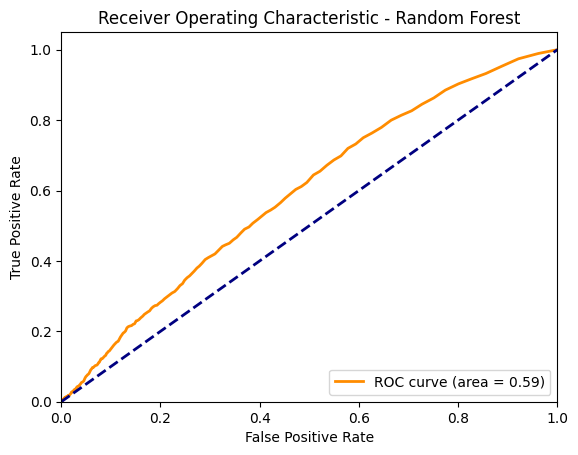

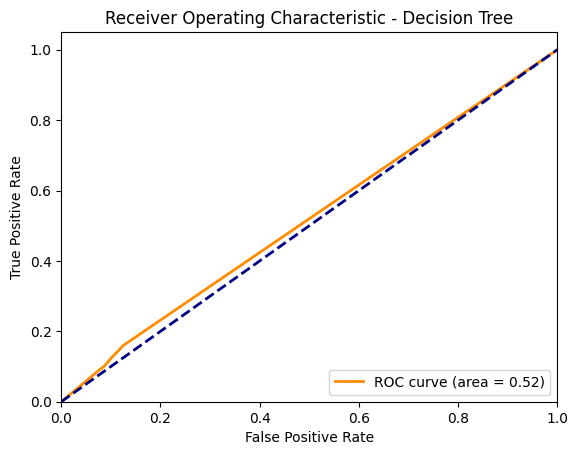

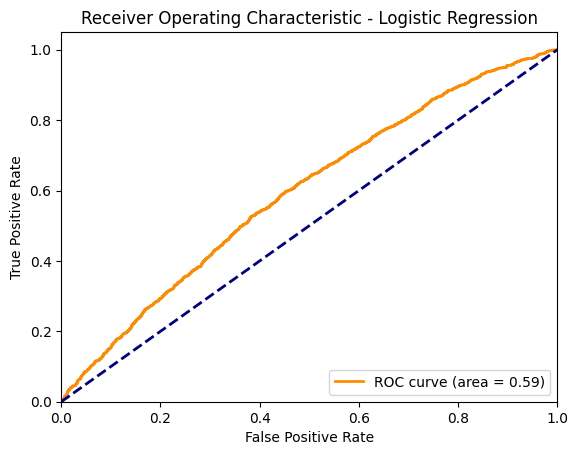

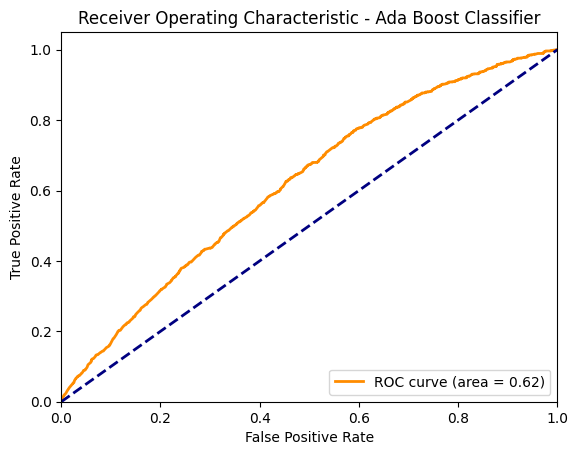

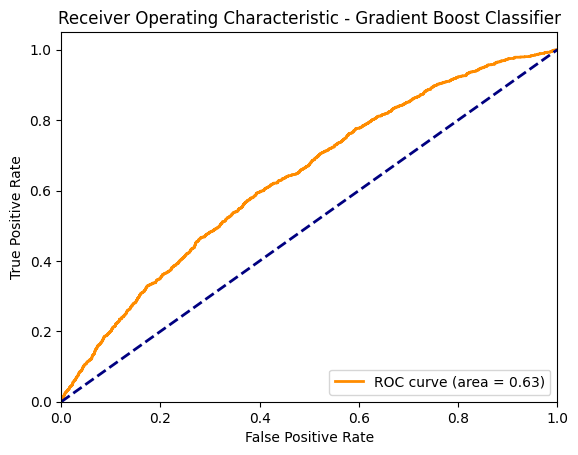

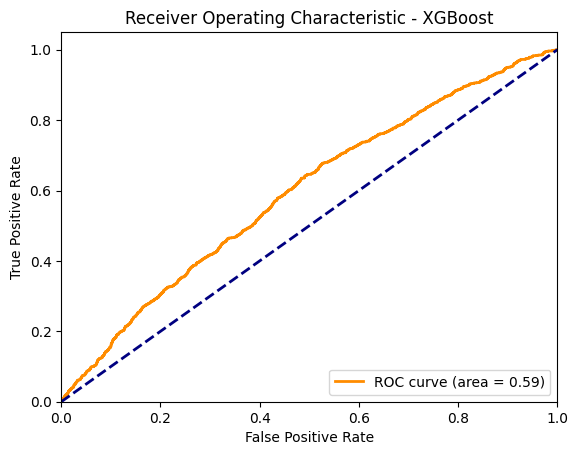

In [95]:
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Random Forest ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plot_roc_curve(fpr_rf, tpr_rf, roc_auc_rf, "Random Forest")


# Decision Tree ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plot_roc_curve(fpr_dt, tpr_dt, roc_auc_dt, "Decision Tree")

# Logistic Regression ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_test_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plot_roc_curve(fpr_lr, tpr_lr, roc_auc_lr, "Logistic Regression")

# Ada Boost ROC Curve
fpr_adb, tpr_adb, _ = roc_curve(y_test, y_test_proba_adb)
roc_auc_adb = auc(fpr_adb, tpr_adb)
plot_roc_curve(fpr_adb, tpr_adb, roc_auc_adb, "Ada Boost Classifier")


# Gradient Boost ROC Curve
fpr_gbm, tpr_gbm, _ = roc_curve(y_test, y_test_proba_gbm)
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)
plot_roc_curve(fpr_gbm, tpr_gbm, roc_auc_gbm, "Gradient Boost Classifier")

# XGBoost ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_test_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plot_roc_curve(fpr_xgb, tpr_xgb, roc_auc_xgb, "XGBoost")


### Precision Recall Curve Plots

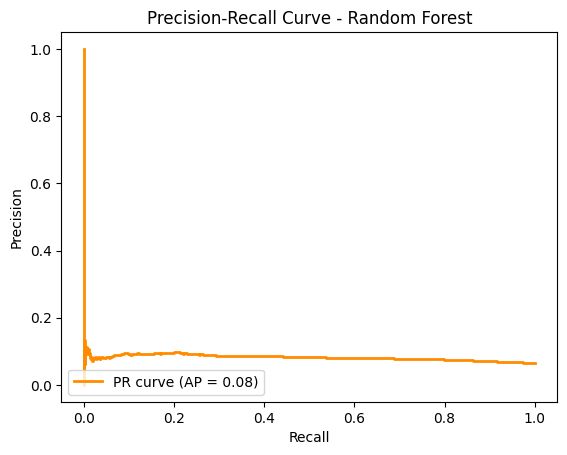

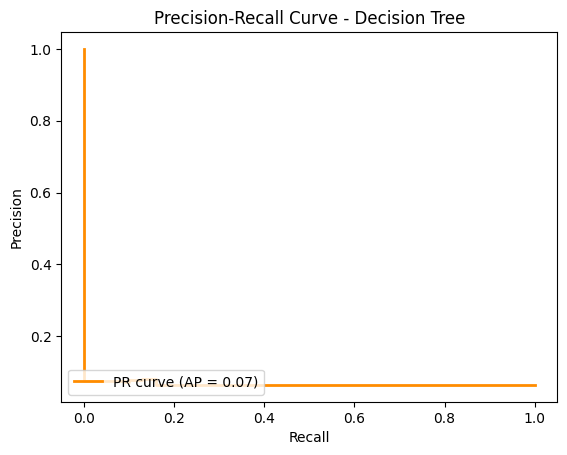

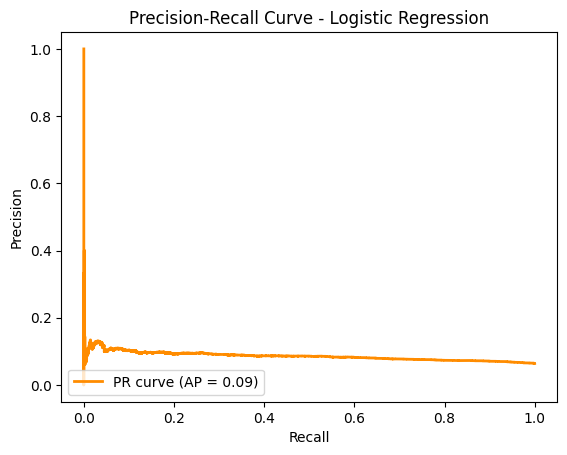

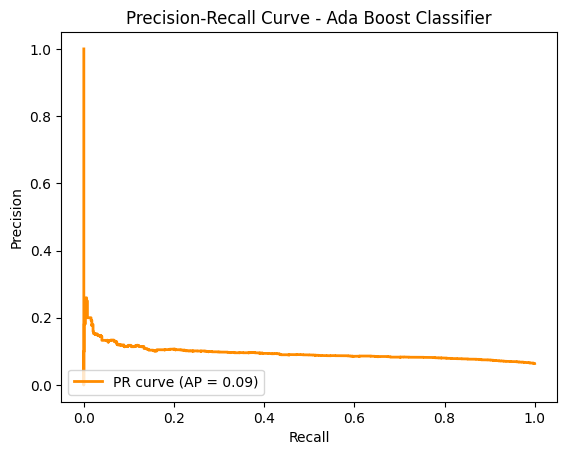

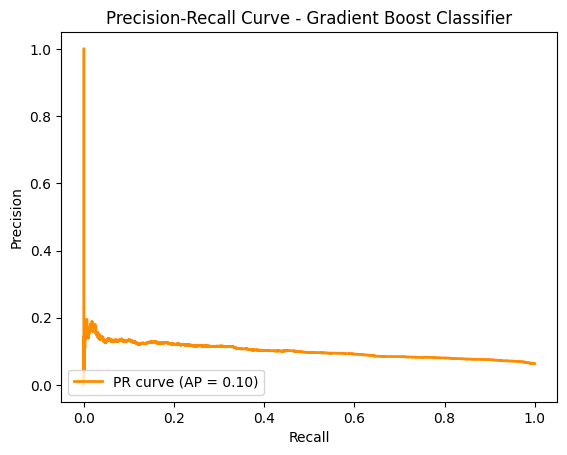

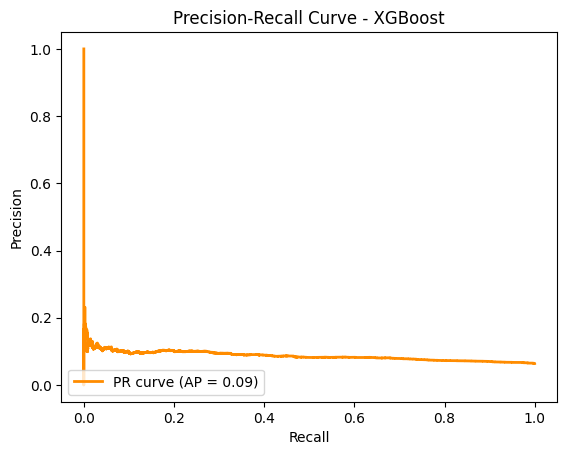

In [96]:

def plot_precision_recall_curve(precision, recall, average_precision, model_name):
    plt.figure()
    plt.step(recall, precision, where='post', color='darkorange', lw=2, label=f'PR curve (AP = {average_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc="lower left")
    plt.show()

# Random Forest Precision-Recall Curve
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_test_proba_rf)
average_precision_rf = average_precision_score(y_test, y_test_proba_rf)
plot_precision_recall_curve(precision_rf, recall_rf, average_precision_rf, "Random Forest")

# Decision Tree Precision-Recall Curve
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_test_proba_dt)
average_precision_dt = average_precision_score(y_test, y_test_proba_dt)
plot_precision_recall_curve(precision_dt, recall_dt, average_precision_dt, "Decision Tree")

# Logistic Regression Precision-Recall Curve
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_test_proba_lr)
average_precision_lr = average_precision_score(y_test, y_test_proba_lr)
plot_precision_recall_curve(precision_lr, recall_lr, average_precision_lr, "Logistic Regression")

# Ada Boost Precision-Recall Curve
precision_adb, recall_adb, _ = precision_recall_curve(y_test, y_test_proba_adb)
average_precision_adb = average_precision_score(y_test, y_test_proba_adb)
plot_precision_recall_curve(precision_adb, recall_adb, average_precision_adb, "Ada Boost Classifier")

# Gradient Boost Precision-Recall Curve
precision_gbm, recall_gbm, _ = precision_recall_curve(y_test, y_test_proba_gbm)
average_precision_gbm = average_precision_score(y_test, y_test_proba_gbm)
plot_precision_recall_curve(precision_gbm, recall_gbm, average_precision_gbm, "Gradient Boost Classifier")

# XGBoost Precision-Recall Curve
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_test_proba_xgb)
average_precision_xgb = average_precision_score(y_test, y_test_proba_xgb)
plot_precision_recall_curve(precision_xgb, recall_xgb, average_precision_xgb, "XGBoost")


### Confusion Matrix Plots

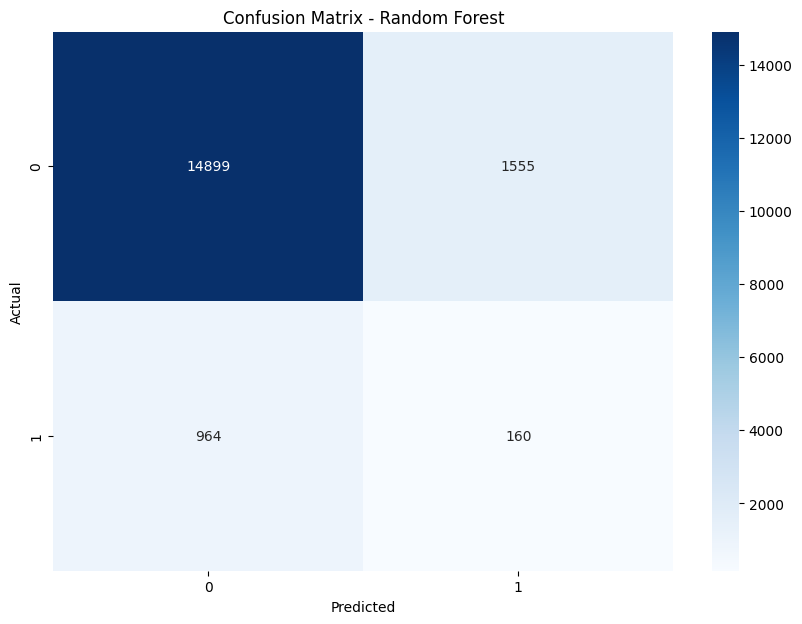

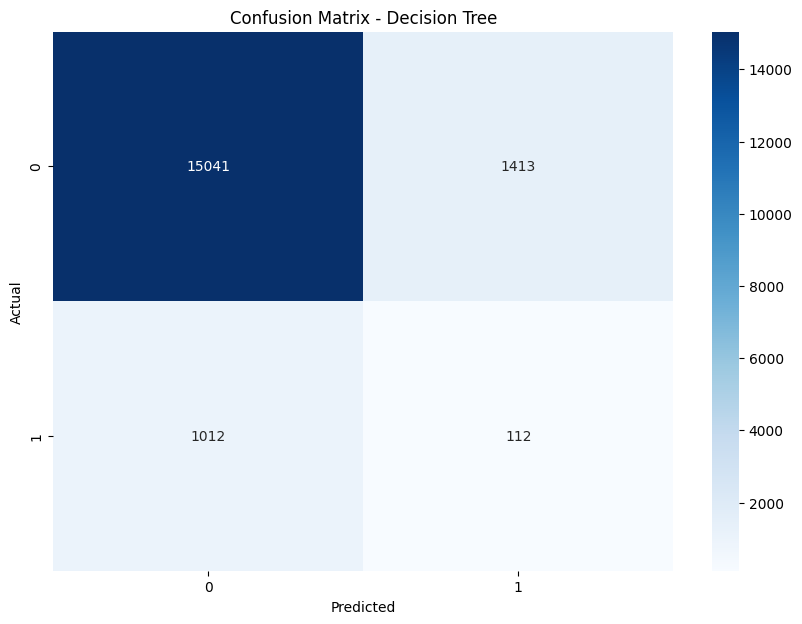

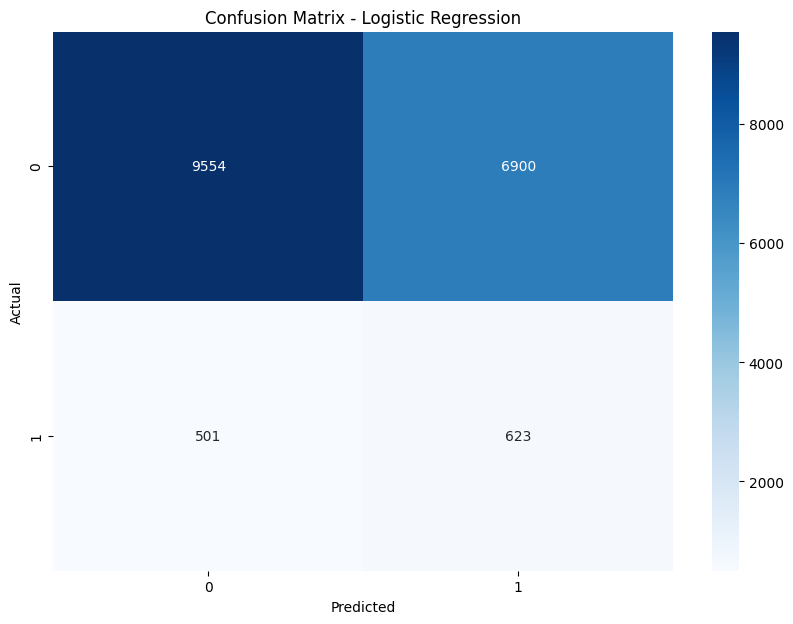

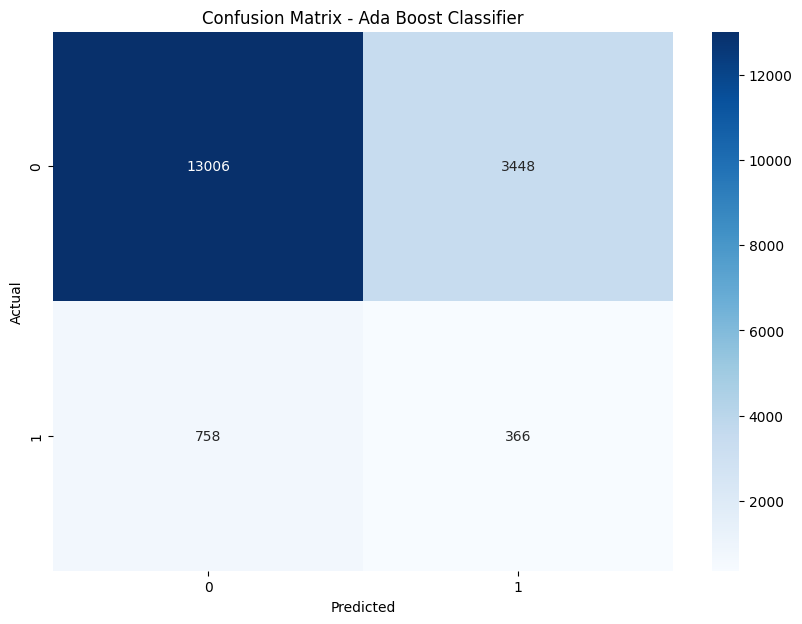

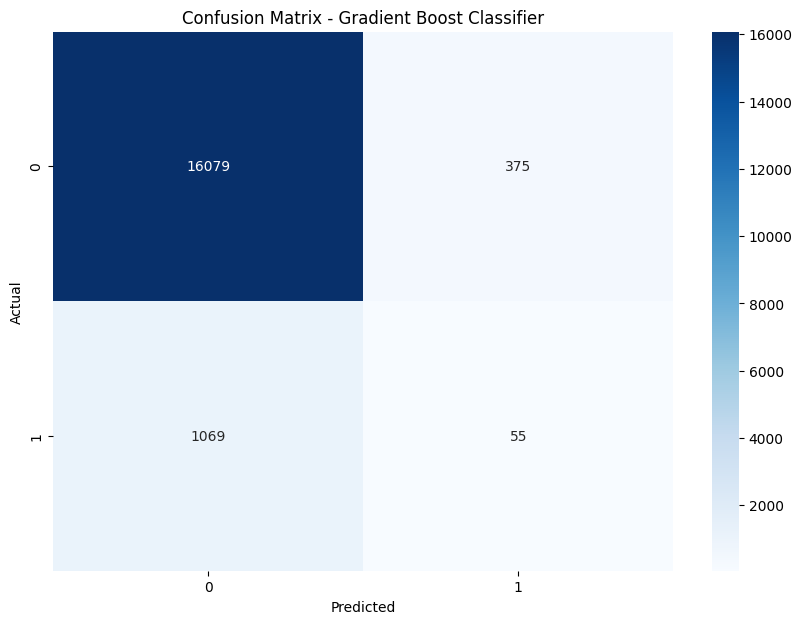

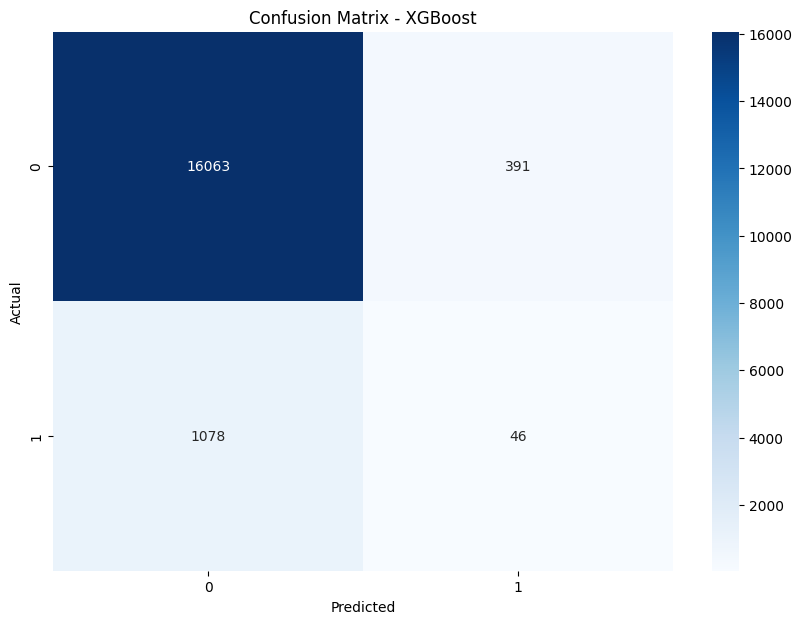

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

plot_confusion_matrix(y_test, y_test_pred_rf, "Random Forest")

plot_confusion_matrix(y_test, y_test_pred_dt, "Decision Tree")

plot_confusion_matrix(y_test, y_test_pred_lr, "Logistic Regression")

plot_confusion_matrix(y_test, y_test_pred_adb, "Ada Boost Classifier")

plot_confusion_matrix(y_test, y_test_pred_gbm, "Gradient Boost Classifier")

plot_confusion_matrix(y_test, y_test_pred_xgb, "XGBoost")


## Results and Conclusion



### AdaBoost Classifier:
- Achieved the highest Test F1 Score (0.148) and Test ROC-AUC Score (0.619).
- Shows a balanced trade-off between precision (0.096) and recall (0.326).

### Gradient Boosting Classifier:
- Has the highest Precision (0.128) and the highest ROC-AUC Score (0.635).
- Slightly lower F1 Score compared to AdaBoost but shows good overall performance.

### Confusion Matrix:
- Based on the confusion matrix, Gradient Boosting Classifier performs better.

## Conclusion:
Based on the metrics, both the AdaBoost Classifier and Gradient Boosting Classifier demonstrate strong performance. The choice between them can depend on the specific application needs, with AdaBoost providing a good balance and Gradient Boosting offering slightly better precision and ROC-AUC.


In [98]:
# #18 min
# param_grid = {
#     'n_estimators': [100, 200, 300, 400],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'max_depth': [3, 5, 7, 9],
#     'min_child_weight': [1, 3, 5],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.2],
#     'reg_alpha': [0, 0.1, 0.5],
#     'reg_lambda': [0, 0.1, 0.5],
#     'scale_pos_weight': [1, 3, 5]
# }
# # Use RandomizedSearchCV
# random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=50, cv=5, scoring='f1', n_jobs=-1, random_state=42)

# random_search_xgb.fit(X_train, y_train)

# print("Best parameters for XG Boost Classifier: ", random_search_xgb.best_params_)

# best_xgb = random_search_xgb.best_estimator_

# # Predict and evaluate
# y_train_pred_xgb = best_xgb.predict(X_train)
# y_train_proba_xgb = best_xgb.predict_proba(X_train)[:, 1]
# y_test_pred_xgb = best_xgb.predict(X_test)
# y_test_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# train_f1 = f1_score(y_train, y_train_pred_xgb)
# train_precision = precision_score(y_train, y_train_pred_xgb)
# train_recall = recall_score(y_train, y_train_pred_xgb)
# train_roc_auc = roc_auc_score(y_train, y_train_proba_xgb)

# test_f1 = f1_score(y_test, y_test_pred_xgb)
# test_precision = precision_score(y_test, y_test_pred_xgb)
# test_recall = recall_score(y_test, y_test_pred_xgb)
# test_roc_auc = roc_auc_score(y_test, y_test_proba_xgb)

# # Append scores to lists
# model.append("XG Boost Classifier")
# train_f1_scores.append(train_f1)
# test_f1_scores.append(test_f1)
# train_precision_scores.append(train_precision)
# test_precision_scores.append(test_precision)
# train_recall_scores.append(train_recall)
# test_recall_scores.append(test_recall)
# train_roc_auc_scores.append(train_roc_auc)
# test_roc_auc_scores.append(test_roc_auc)

# print("\nTrain Metrics:")
# print(f"F1 Score: {train_f1}")
# print(f"Precision: {train_precision}")
# print(f"Recall: {train_recall}")
# print(f"ROC-AUC Score: {train_roc_auc}")

# print("\nTest Metrics:")
# print(f"F1 Score: {test_f1}")
# print(f"Precision: {test_precision}")
# print(f"Recall: {test_recall}")
# print(f"ROC-AUC Score: {test_roc_auc}")

# print("\nXG Boost Classifier Classification Report:")
# print(classification_report(y_test, y_test_pred_xgb))

In [99]:
# models_data = {
#     "Model Name": model,
#     "Train F1 Score": train_f1_scores,
#     "Train Precision": train_precision_scores,
#     "Train Recall": train_recall_scores,
#     "Train ROC-AUC Score": train_roc_auc_scores,
#     "Test F1 Score": test_f1_scores,
#     "Test Precision": test_precision_scores,
#     "Test Recall": test_recall_scores,
#     "Test ROC-AUC Score": test_roc_auc_scores
# }

# model_results = pd.DataFrame(models_data)
# model_results

In [100]:
# def plot_roc_curve(fpr, tpr, roc_auc, model_name):
#     plt.figure()
#     plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title(f'Receiver Operating Characteristic - {model_name}')
#     plt.legend(loc="lower right")
#     plt.show()
# # XGBoost ROC Curve
# fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_test_proba_xgb)
# roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
# plot_roc_curve(fpr_xgb, tpr_xgb, roc_auc_xgb, "XGBoost")


In [101]:

# def plot_precision_recall_curve(precision, recall, average_precision, model_name):
#     plt.figure()
#     plt.step(recall, precision, where='post', color='darkorange', lw=2, label=f'PR curve (AP = {average_precision:.2f})')
#     plt.xlabel('Recall')
#     plt.ylabel('Precision')
#     plt.title(f'Precision-Recall Curve - {model_name}')
#     plt.legend(loc="lower left")
#     plt.show()
# # XGBoost Precision-Recall Curve
# precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_test_proba_xgb)
# average_precision_xgb = average_precision_score(y_test, y_test_proba_xgb)
# plot_precision_recall_curve(precision_xgb, recall_xgb, average_precision_xgb, "XGBoost")


### Support Vector Classifier

In [102]:
# svc = SVC(probability=True, random_state=42)

# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto']
# }


# grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# grid_search_svc.fit(X_train, y_train)

# print("Best parameters for Support Vector Classifier: ", grid_search_svc.best_params_)

# best_lr = grid_search_svc.best_estimator_


# y_train_pred_svc = best_lr.predict(X_train)
# y_train_proba_svc = best_lr.predict_proba(X_train)[:, 1]
# y_test_pred_svc = best_lr.predict(X_test)
# y_test_proba_svc = best_lr.predict_proba(X_test)[:, 1]

# train_f1 = f1_score(y_train, y_train_pred_svc)
# train_precision = precision_score(y_train, y_train_pred_svc)
# train_recall = recall_score(y_train, y_train_pred_svc)
# train_roc_auc = roc_auc_score(y_train, y_train_proba_svc)


# test_f1 = f1_score(y_test, y_test_pred_svc)
# test_precision = precision_score(y_test, y_test_pred_svc)
# test_recall = recall_score(y_test, y_test_pred_svc)
# test_roc_auc = roc_auc_score(y_test, y_test_proba_svc)

# # Append scores to lists

# model.append("Support Vector Classifier")
# train_f1_scores.append(train_f1)
# test_f1_scores.append(test_f1)
# train_precision_scores.append(train_precision)
# test_precision_scores.append(test_precision)
# train_recall_scores.append(train_recall)
# test_recall_scores.append(test_recall)
# train_roc_auc_scores.append(train_roc_auc)
# test_roc_auc_scores.append(test_roc_auc)

# print("\nTrain Metrics:")
# print(f"F1 Score: {train_f1}")
# print(f"Precision: {train_precision}")
# print(f"Recall: {train_recall}")
# print(f"ROC-AUC Score: {train_roc_auc}")


# print("\nTest Metrics:")
# print(f"F1 Score: {test_f1}")
# print(f"Precision: {test_precision}")
# print(f"Recall: {test_recall}")
# print(f"ROC-AUC Score: {test_roc_auc}")


# print("\nSupport Vector Classifier Classification Report:")
# print(classification_report(y_test, y_test_pred_svc))